In [21]:
#Import libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [22]:
#Read data 
df_all = pd.read_excel("数据预处理前-20250322.xlsx")
df_all = df_all.drop('催化剂',axis=1)
df_all

EN.        I.E.      I.R.         M.P.      T.C.   Density  C.Tem.  \
0    0.002339    6.970113 -0.005551  1224.018035  0.000899  0.058782     500   
1    0.002339    6.970113 -0.005551  1224.018035  0.003021  0.058782     500   
2   -0.007236  137.377622 -0.015372 -1251.534421  0.016375  0.105441     500   
3   -0.007236  137.377622 -0.015372 -1251.534421  0.016375  0.105441     500   
4   -0.007236  137.377622 -0.015372 -1251.534421  0.016375  0.105441     500   
..        ...         ...       ...          ...       ...       ...     ...   
236 -0.011600    0.000000  0.000000     0.000000  0.000000  0.000000       0   
237  0.000012    0.000000  0.000000     0.000000  0.000000  0.000000       0   
238 -0.001269    0.000000  0.000000     0.000000  0.000000  0.000000       0   
239 -0.010353    0.000000  0.000000     0.000000  0.000000  0.000000       0   
240  0.008333    0.000000  0.000000     0.000000  0.000000  0.000000       0   

     C.Tim.      S.A.      P.V.       P.D.  SO2  NH3   NO    O2   H2O   GHSV   \
0         4  98.21337  0.220956  10.751276   50  500  500  0.05  0.05  128000   
1         4  98.21337  0.220956  10.751276   50  500  500  0.05  0.05  128000   
2         6  44.24000  0.214500  19.390000   50  600  600  0.03  0.05   40000   
3         6  44.24000  0.214500  19.390000   50  600  600  0.03  0.05   40000   
4         6  44.24000  0.214500  19.390000   50  600  600  0.03  0.05   40000   
..      ...       ...       ...        ...  ...  ...  ...   ...   ...     ...   
236       0   0.00000  0.000000   0.000000    0    0    0  0.00  0.00       0   
237       0   0.00000  0.000000   0.000000    0    0    0  0.00  0.00       0   
238       0   0.00000  0.000000   0.000000    0    0    0  0.00  0.00       0   
239       0   0.00000  0.000000   0.000000    0    0    0  0.00  0.00       0   
240       0   0.00000  0.000000   0.000000    0    0    0  0.00  0.00       0   

     P.Tim.  P.Tem.  SO2 tolerance  
0       2.0     300       0.812325  
1       8.0     300       0.767154  
2       2.0     250       0.988492  
3       6.0     250       0.931052  
4      12.0     250       0.900931  
..      ...     ...            ...  
236     0.0       0       0.000000  
237     0.0       0       0.000000  
238     0.0       0       0.000000  
239     0.0       0       0.000000  
240     0.0       0       0.000000  

[241 rows x 20 columns]

In [23]:
df_all.describe()

EN.          I.E.        I.R.           M.P.        T.C.  \
count  241.000000    241.000000  241.000000     241.000000  241.000000   
mean     0.003372  -5124.755193   -0.006428  -27634.592623   -0.011059   
std      0.120447  11798.965384    0.038406   70276.408165    0.093280   
min     -0.571285 -51592.957760   -0.161758 -506380.863428   -0.604104   
25%     -0.019888  -2308.124517   -0.017923  -29369.377686   -0.000454   
50%      0.004524    -63.789109   -0.005551   -3374.023749    0.003598   
75%      0.074604      6.288029    0.006260     782.740402    0.009885   
max      0.176136   2971.903192    0.082525    3208.024222    0.017735   

          Density      C.Tem.      C.Tim.        S.A.        P.V.        P.D.  \
count  241.000000  241.000000  241.000000  241.000000  241.000000  241.000000   
mean    -0.798456  456.639004    4.265560   93.497995    0.204842    9.212666   
std      2.400118  108.481519    1.430332   59.145897    0.116822    5.872049   
min    -17.184534    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     -0.649632  450.000000    3.000000   56.200000    0.115000    4.930000   
50%      0.000000  500.000000    4.000000   79.600000    0.200000    8.300000   
75%      0.058782  500.000000    5.000000  128.600000    0.270000   10.751280   
max      0.116598  550.000000    6.000000  294.560000    0.600000   26.000000   

               SO2          NH3           NO          O2         H2O  \
count   241.000000   241.000000   241.000000  241.000000  241.000000   
mean    203.360996   567.510373   571.576763    0.042033    0.033195   
std     197.252773   243.733172   243.137485    0.021535    0.035311   
min       0.000000     0.000000     0.000000    0.000000    0.000000   
25%     100.000000   500.000000   500.000000    0.030000    0.000000   
50%     100.000000   500.000000   500.000000    0.050000    0.030000   
75%     200.000000   600.000000   600.000000    0.050000    0.050000   
max    1000.000000  1000.000000  1000.000000    0.150000    0.100000   

               GHSV       P.Tim.      P.Tem.  SO2 tolerance  
count     241.000000  241.000000  241.000000     241.000000  
mean    54626.556017    5.497925  242.904564       0.783564  
std     51058.866764    5.465898   81.496851       0.322530  
min         0.000000    0.000000    0.000000       0.000000  
25%     30000.000000    2.000000  200.000000       0.671328  
50%     40000.000000    5.000000  250.000000       0.850473  
75%     60000.000000    8.000000  300.000000       0.943842  
max    250000.000000   40.000000  400.000000       2.882550

In [24]:
df = df_all.fillna(0)
df


EN.        I.E.      I.R.         M.P.      T.C.   Density  C.Tem.  \
0    0.002339    6.970113 -0.005551  1224.018035  0.000899  0.058782     500   
1    0.002339    6.970113 -0.005551  1224.018035  0.003021  0.058782     500   
2   -0.007236  137.377622 -0.015372 -1251.534421  0.016375  0.105441     500   
3   -0.007236  137.377622 -0.015372 -1251.534421  0.016375  0.105441     500   
4   -0.007236  137.377622 -0.015372 -1251.534421  0.016375  0.105441     500   
..        ...         ...       ...          ...       ...       ...     ...   
236 -0.011600    0.000000  0.000000     0.000000  0.000000  0.000000       0   
237  0.000012    0.000000  0.000000     0.000000  0.000000  0.000000       0   
238 -0.001269    0.000000  0.000000     0.000000  0.000000  0.000000       0   
239 -0.010353    0.000000  0.000000     0.000000  0.000000  0.000000       0   
240  0.008333    0.000000  0.000000     0.000000  0.000000  0.000000       0   

     C.Tim.      S.A.      P.V.       P.D.  SO2  NH3   NO    O2   H2O   GHSV   \
0         4  98.21337  0.220956  10.751276   50  500  500  0.05  0.05  128000   
1         4  98.21337  0.220956  10.751276   50  500  500  0.05  0.05  128000   
2         6  44.24000  0.214500  19.390000   50  600  600  0.03  0.05   40000   
3         6  44.24000  0.214500  19.390000   50  600  600  0.03  0.05   40000   
4         6  44.24000  0.214500  19.390000   50  600  600  0.03  0.05   40000   
..      ...       ...       ...        ...  ...  ...  ...   ...   ...     ...   
236       0   0.00000  0.000000   0.000000    0    0    0  0.00  0.00       0   
237       0   0.00000  0.000000   0.000000    0    0    0  0.00  0.00       0   
238       0   0.00000  0.000000   0.000000    0    0    0  0.00  0.00       0   
239       0   0.00000  0.000000   0.000000    0    0    0  0.00  0.00       0   
240       0   0.00000  0.000000   0.000000    0    0    0  0.00  0.00       0   

     P.Tim.  P.Tem.  SO2 tolerance  
0       2.0     300       0.812325  
1       8.0     300       0.767154  
2       2.0     250       0.988492  
3       6.0     250       0.931052  
4      12.0     250       0.900931  
..      ...     ...            ...  
236     0.0       0       0.000000  
237     0.0       0       0.000000  
238     0.0       0       0.000000  
239     0.0       0       0.000000  
240     0.0       0       0.000000  

[241 rows x 20 columns]

In [25]:
df.columns

Index(['EN.', 'I.E.', 'I.R.', 'M.P.', 'T.C.', 'Density', 'C.Tem.', 'C.Tim.',
       'S.A.', 'P.V.', 'P.D.', 'SO2', 'NH3', 'NO', 'O2', 'H2O', 'GHSV ',
       'P.Tim.', 'P.Tem.', 'SO2 tolerance'],
      dtype='object')

In [26]:
font = {'font.family':'arial', 'font.size':15}
plt.rcParams.update(font)

0.0033716835893984856 0.1201968993017485


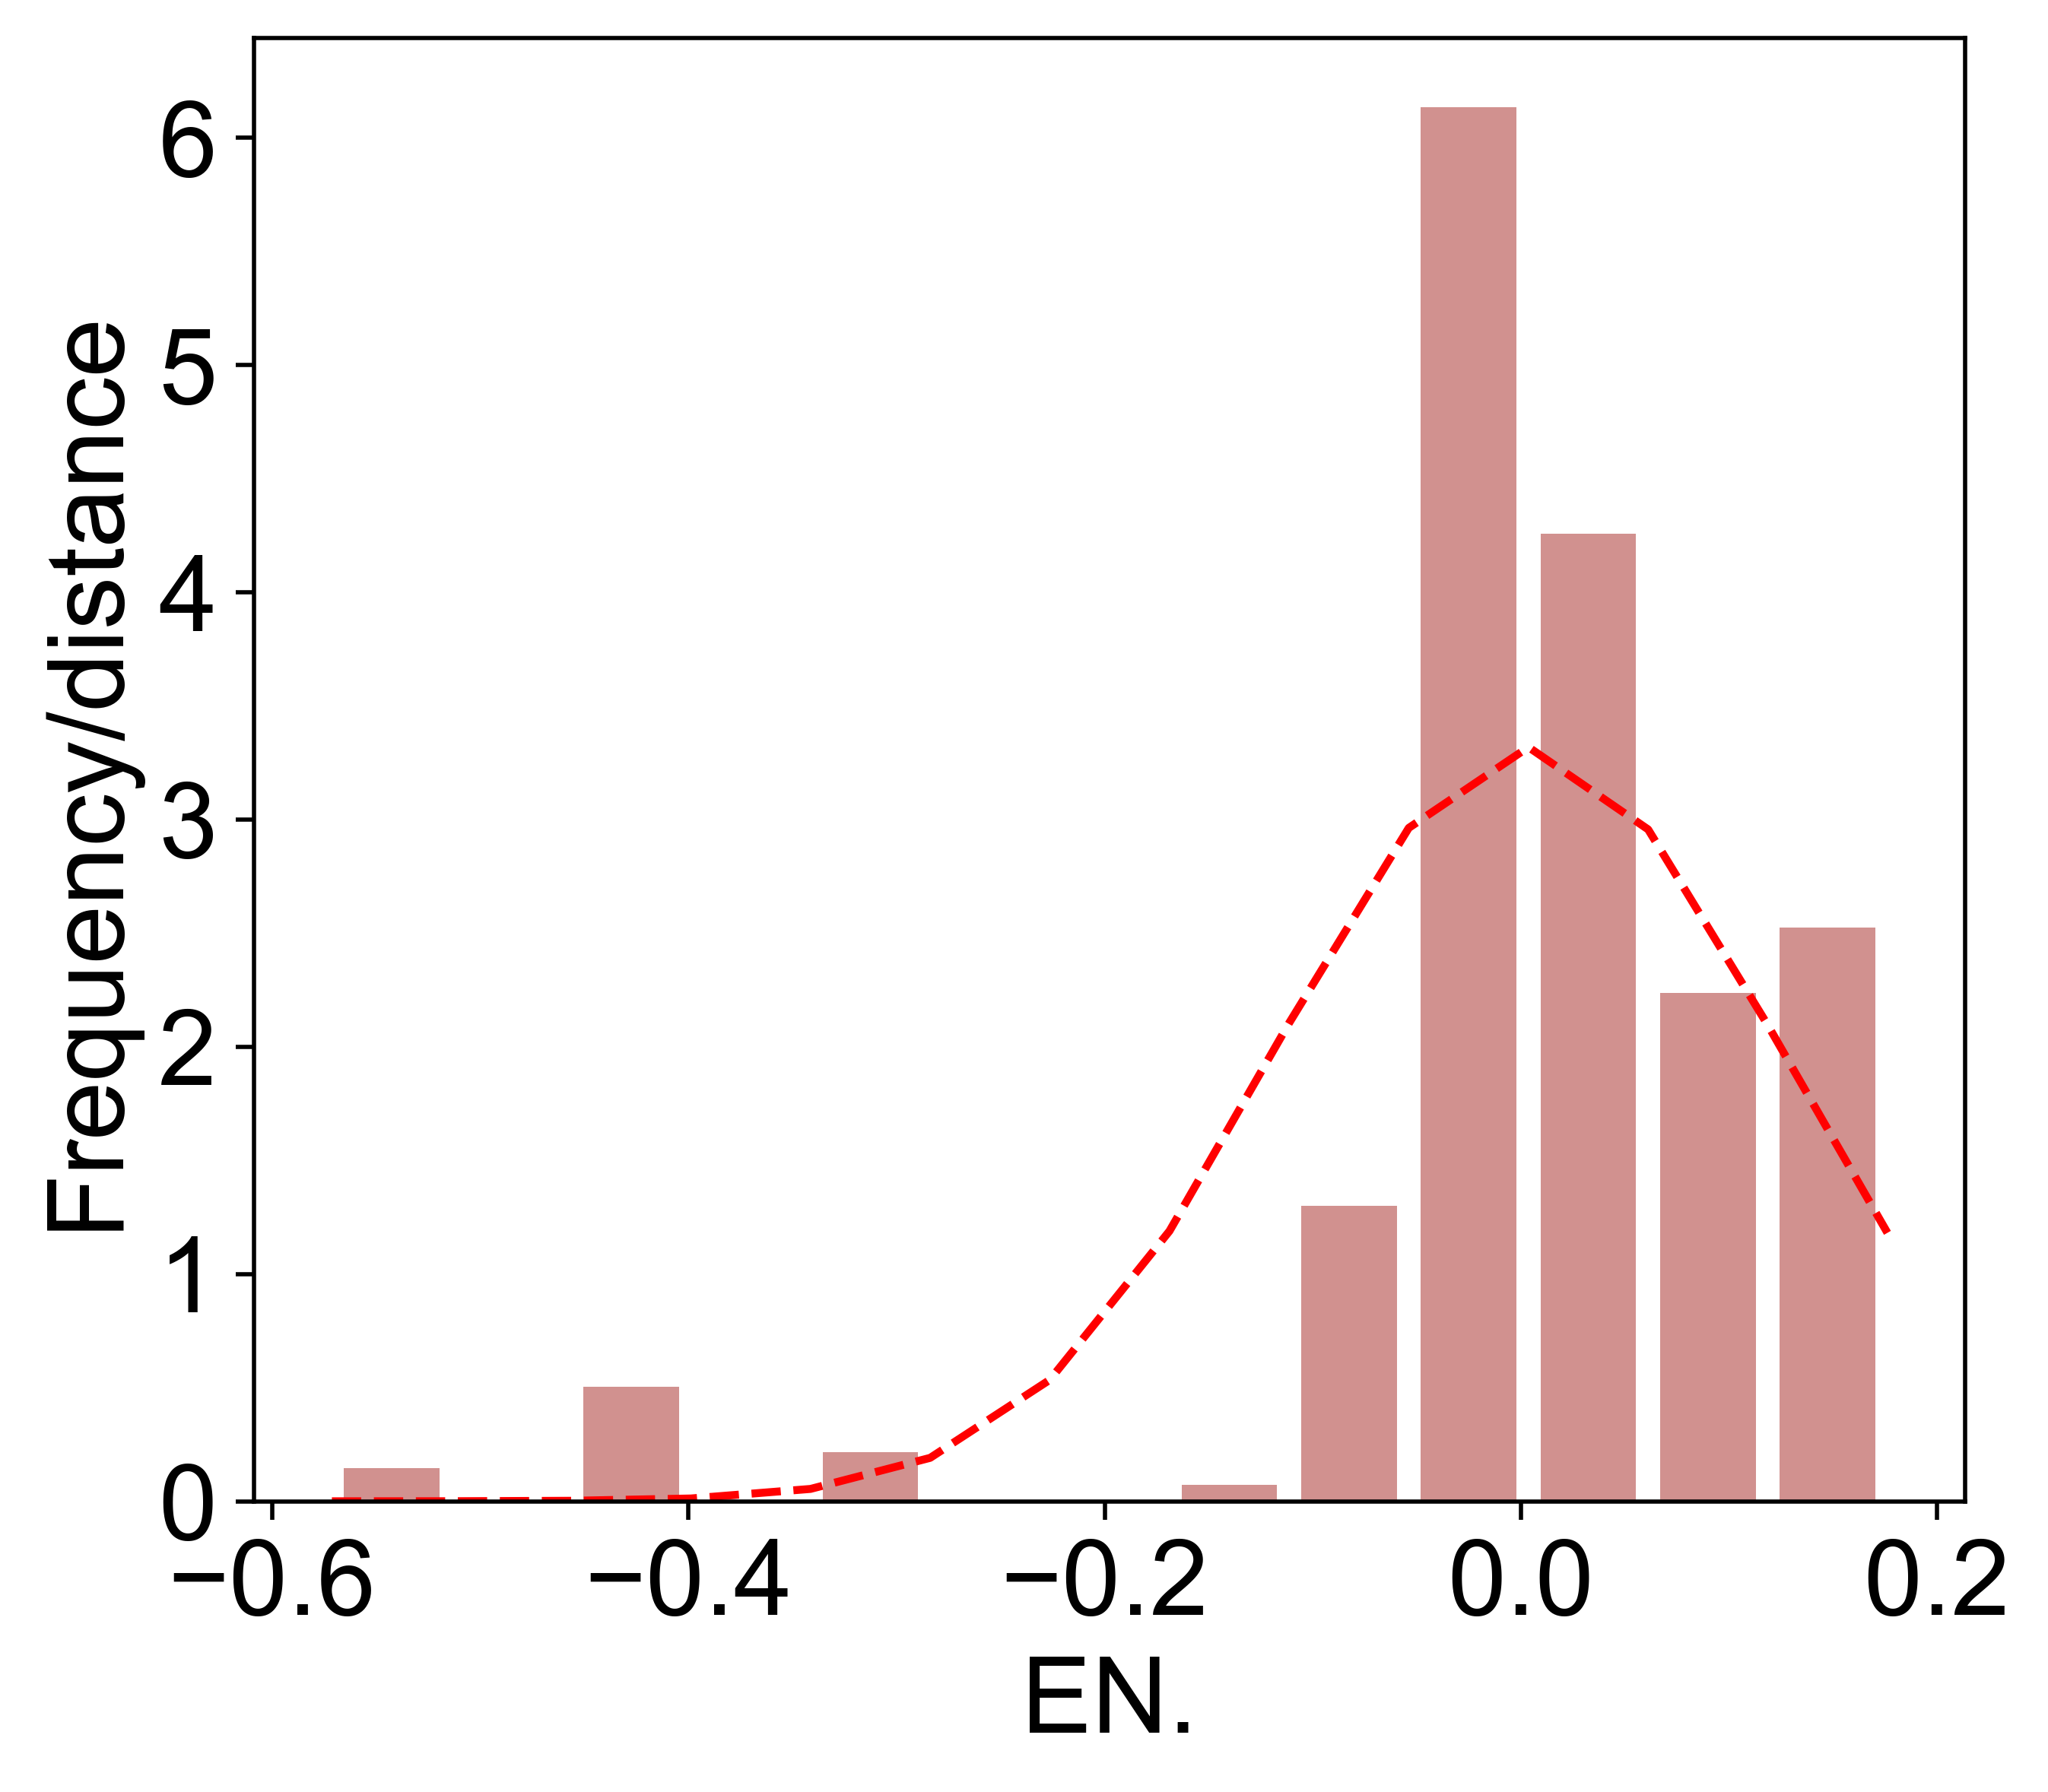

In [27]:
import matplotlib.mlab as mlab
from scipy.stats import norm
#plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
#plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#plt.figure(figsize=(8,6)) #定义图像大小
#ax = plt.subplot(111) #设置刻度字体大小
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20) #设置坐标轴标签字体大小
#ax.set_xlabel(fontsize=20)
#ax.set_ylabel(fontsize=20) #设置轴标题字体大小
#plt.rcParams.update({'font.size':15}) 设置图例字体大小
#plt.legend(loc='upper right') 定义图表所处位置，这里表示右上
#plt.grid(True) 是否要显示网格线



mu = np.mean(df['EN.']) #平均值
sigma = np.std(df['EN.']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['EN.'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，normed=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("EN.",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分图'
plt.savefig(save_path + "EN.png",transparent=False,bbox_inches='tight')

plt.show()


-5124.755193249507 11774.460756150473


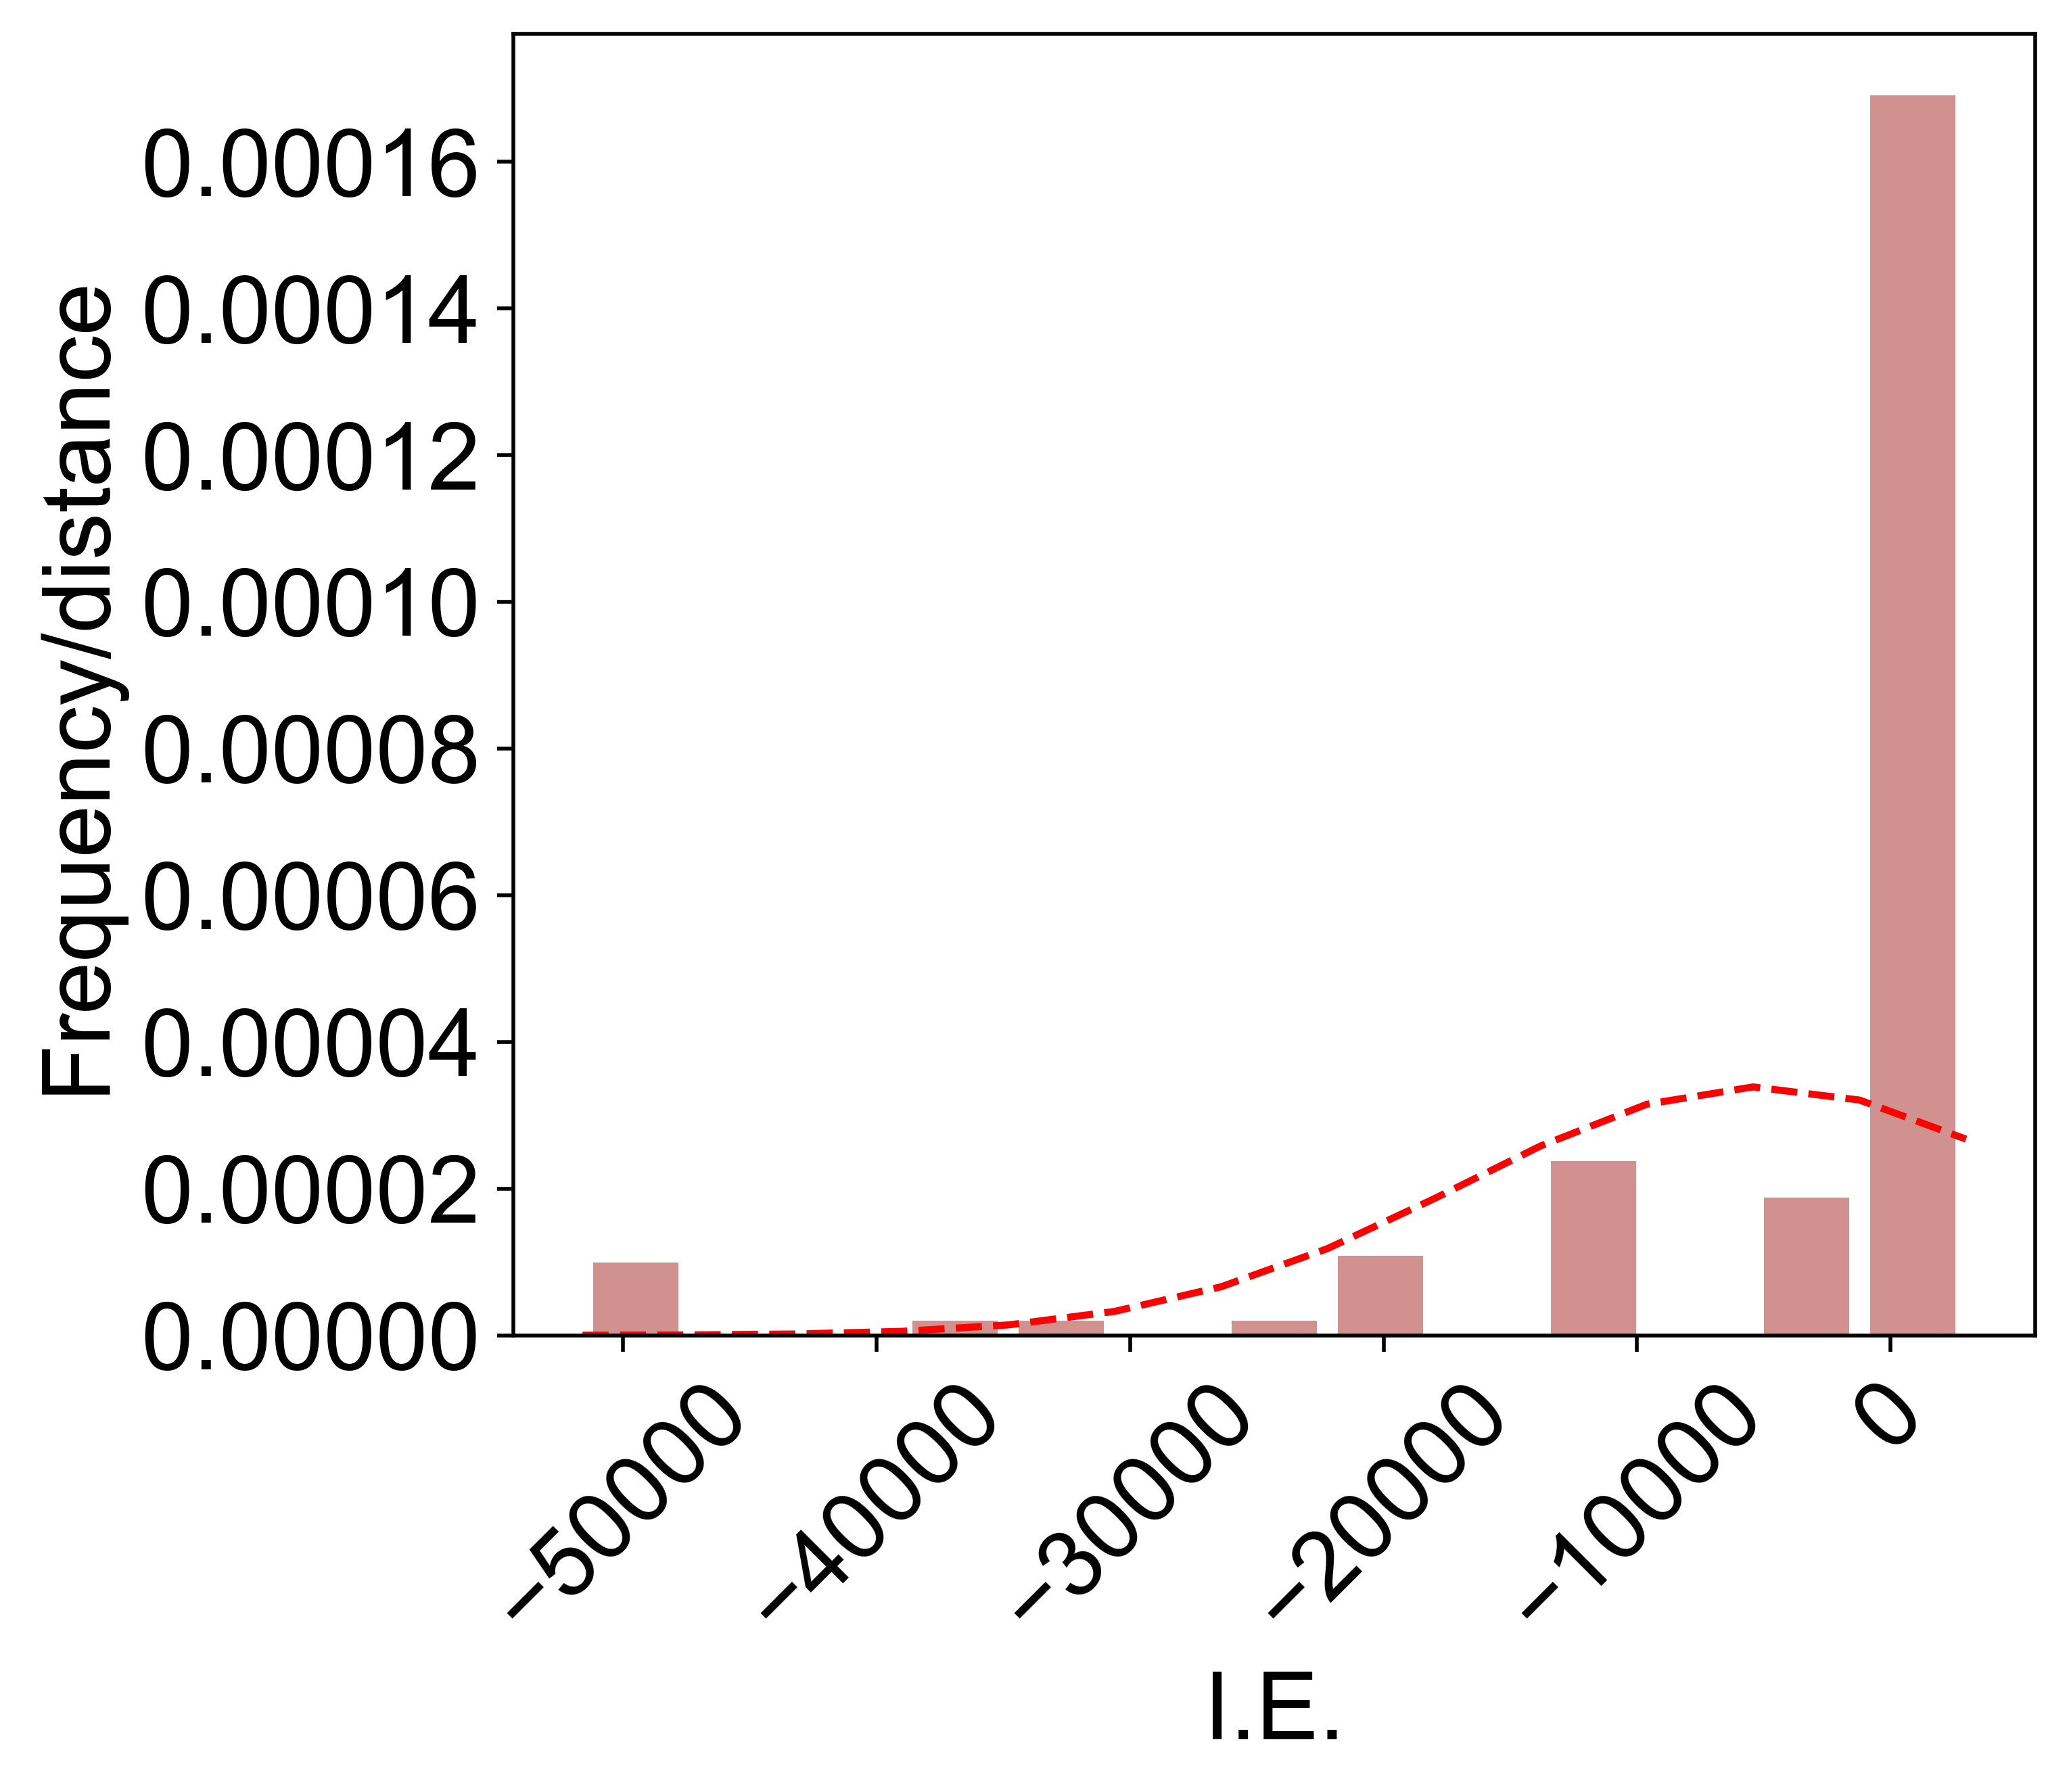

In [30]:
mu = np.mean(df['I.E.']) #平均值
sigma = np.std(df['I.E.']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['I.E.'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("I.E.",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial', rotation=45)
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "I.E..png",transparent=False,bbox_inches='tight')

plt.show()

-0.006427849442850626 0.038326144579269035


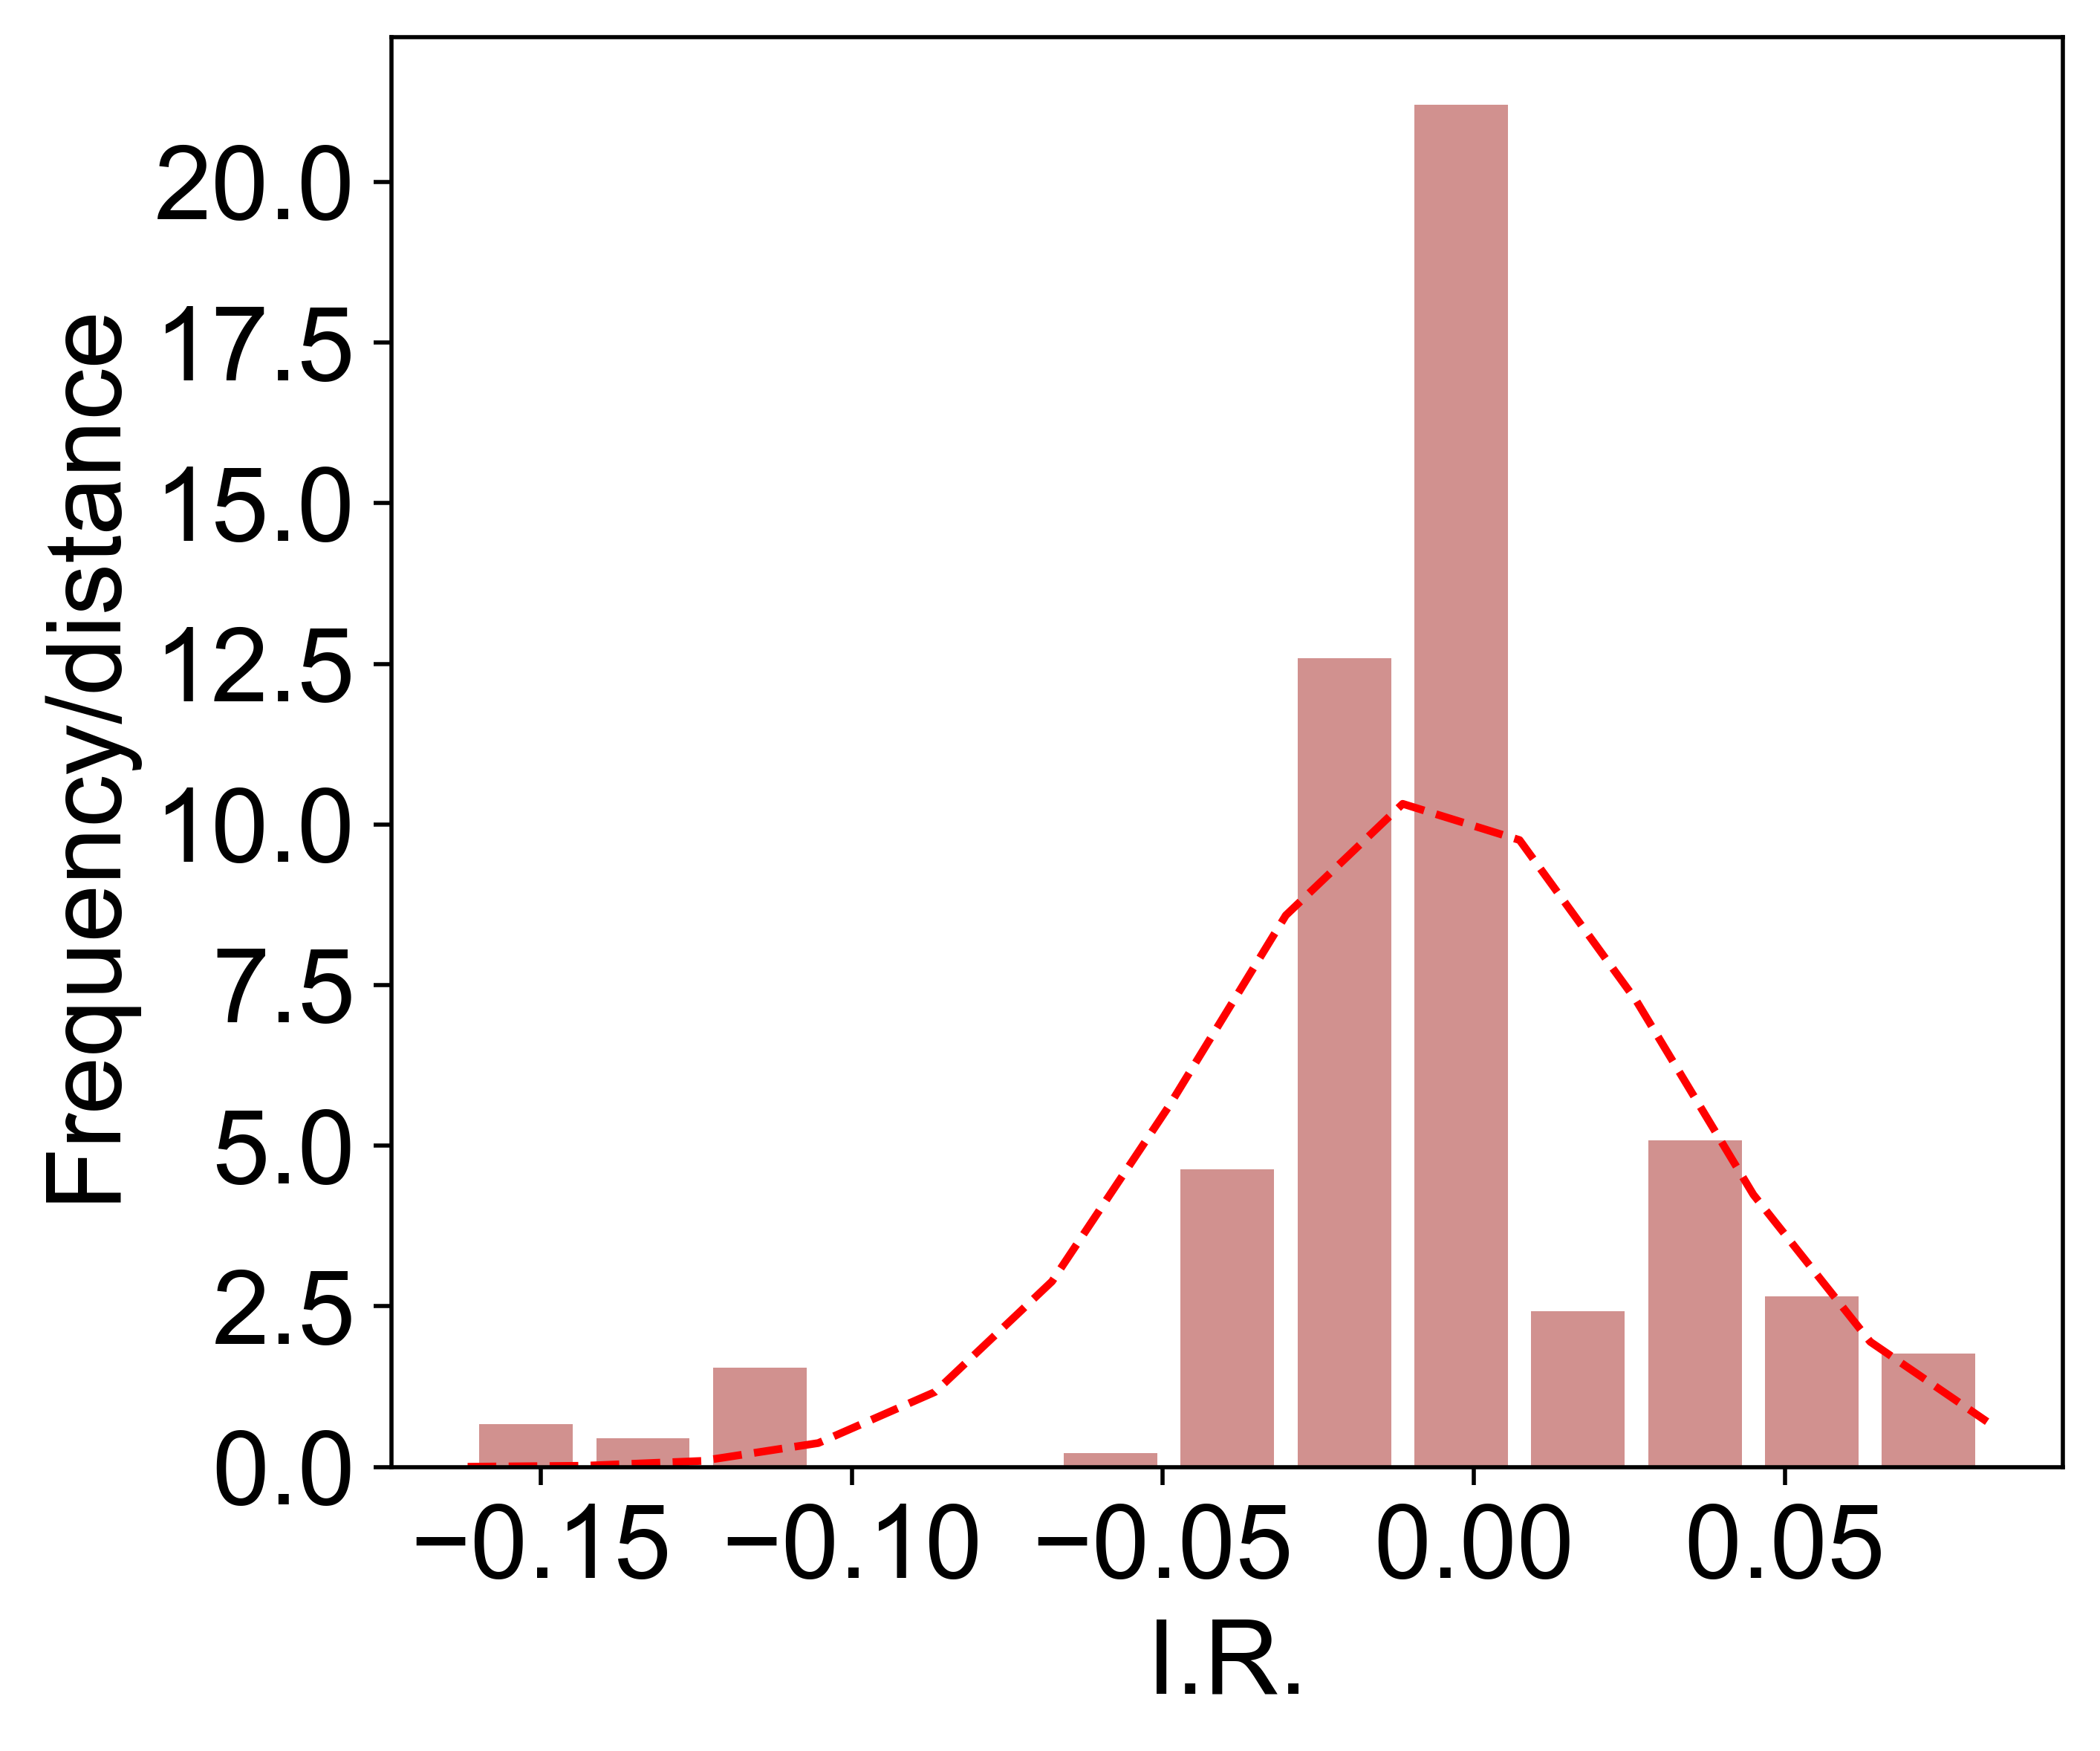

In [33]:
mu = np.mean(df['I.R.']) #平均值
sigma = np.std(df['I.R.']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['I.R.'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("I.R.",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "I.R..png",transparent=False,bbox_inches='tight')

plt.show()

-27634.59262252269 70130.45492748597


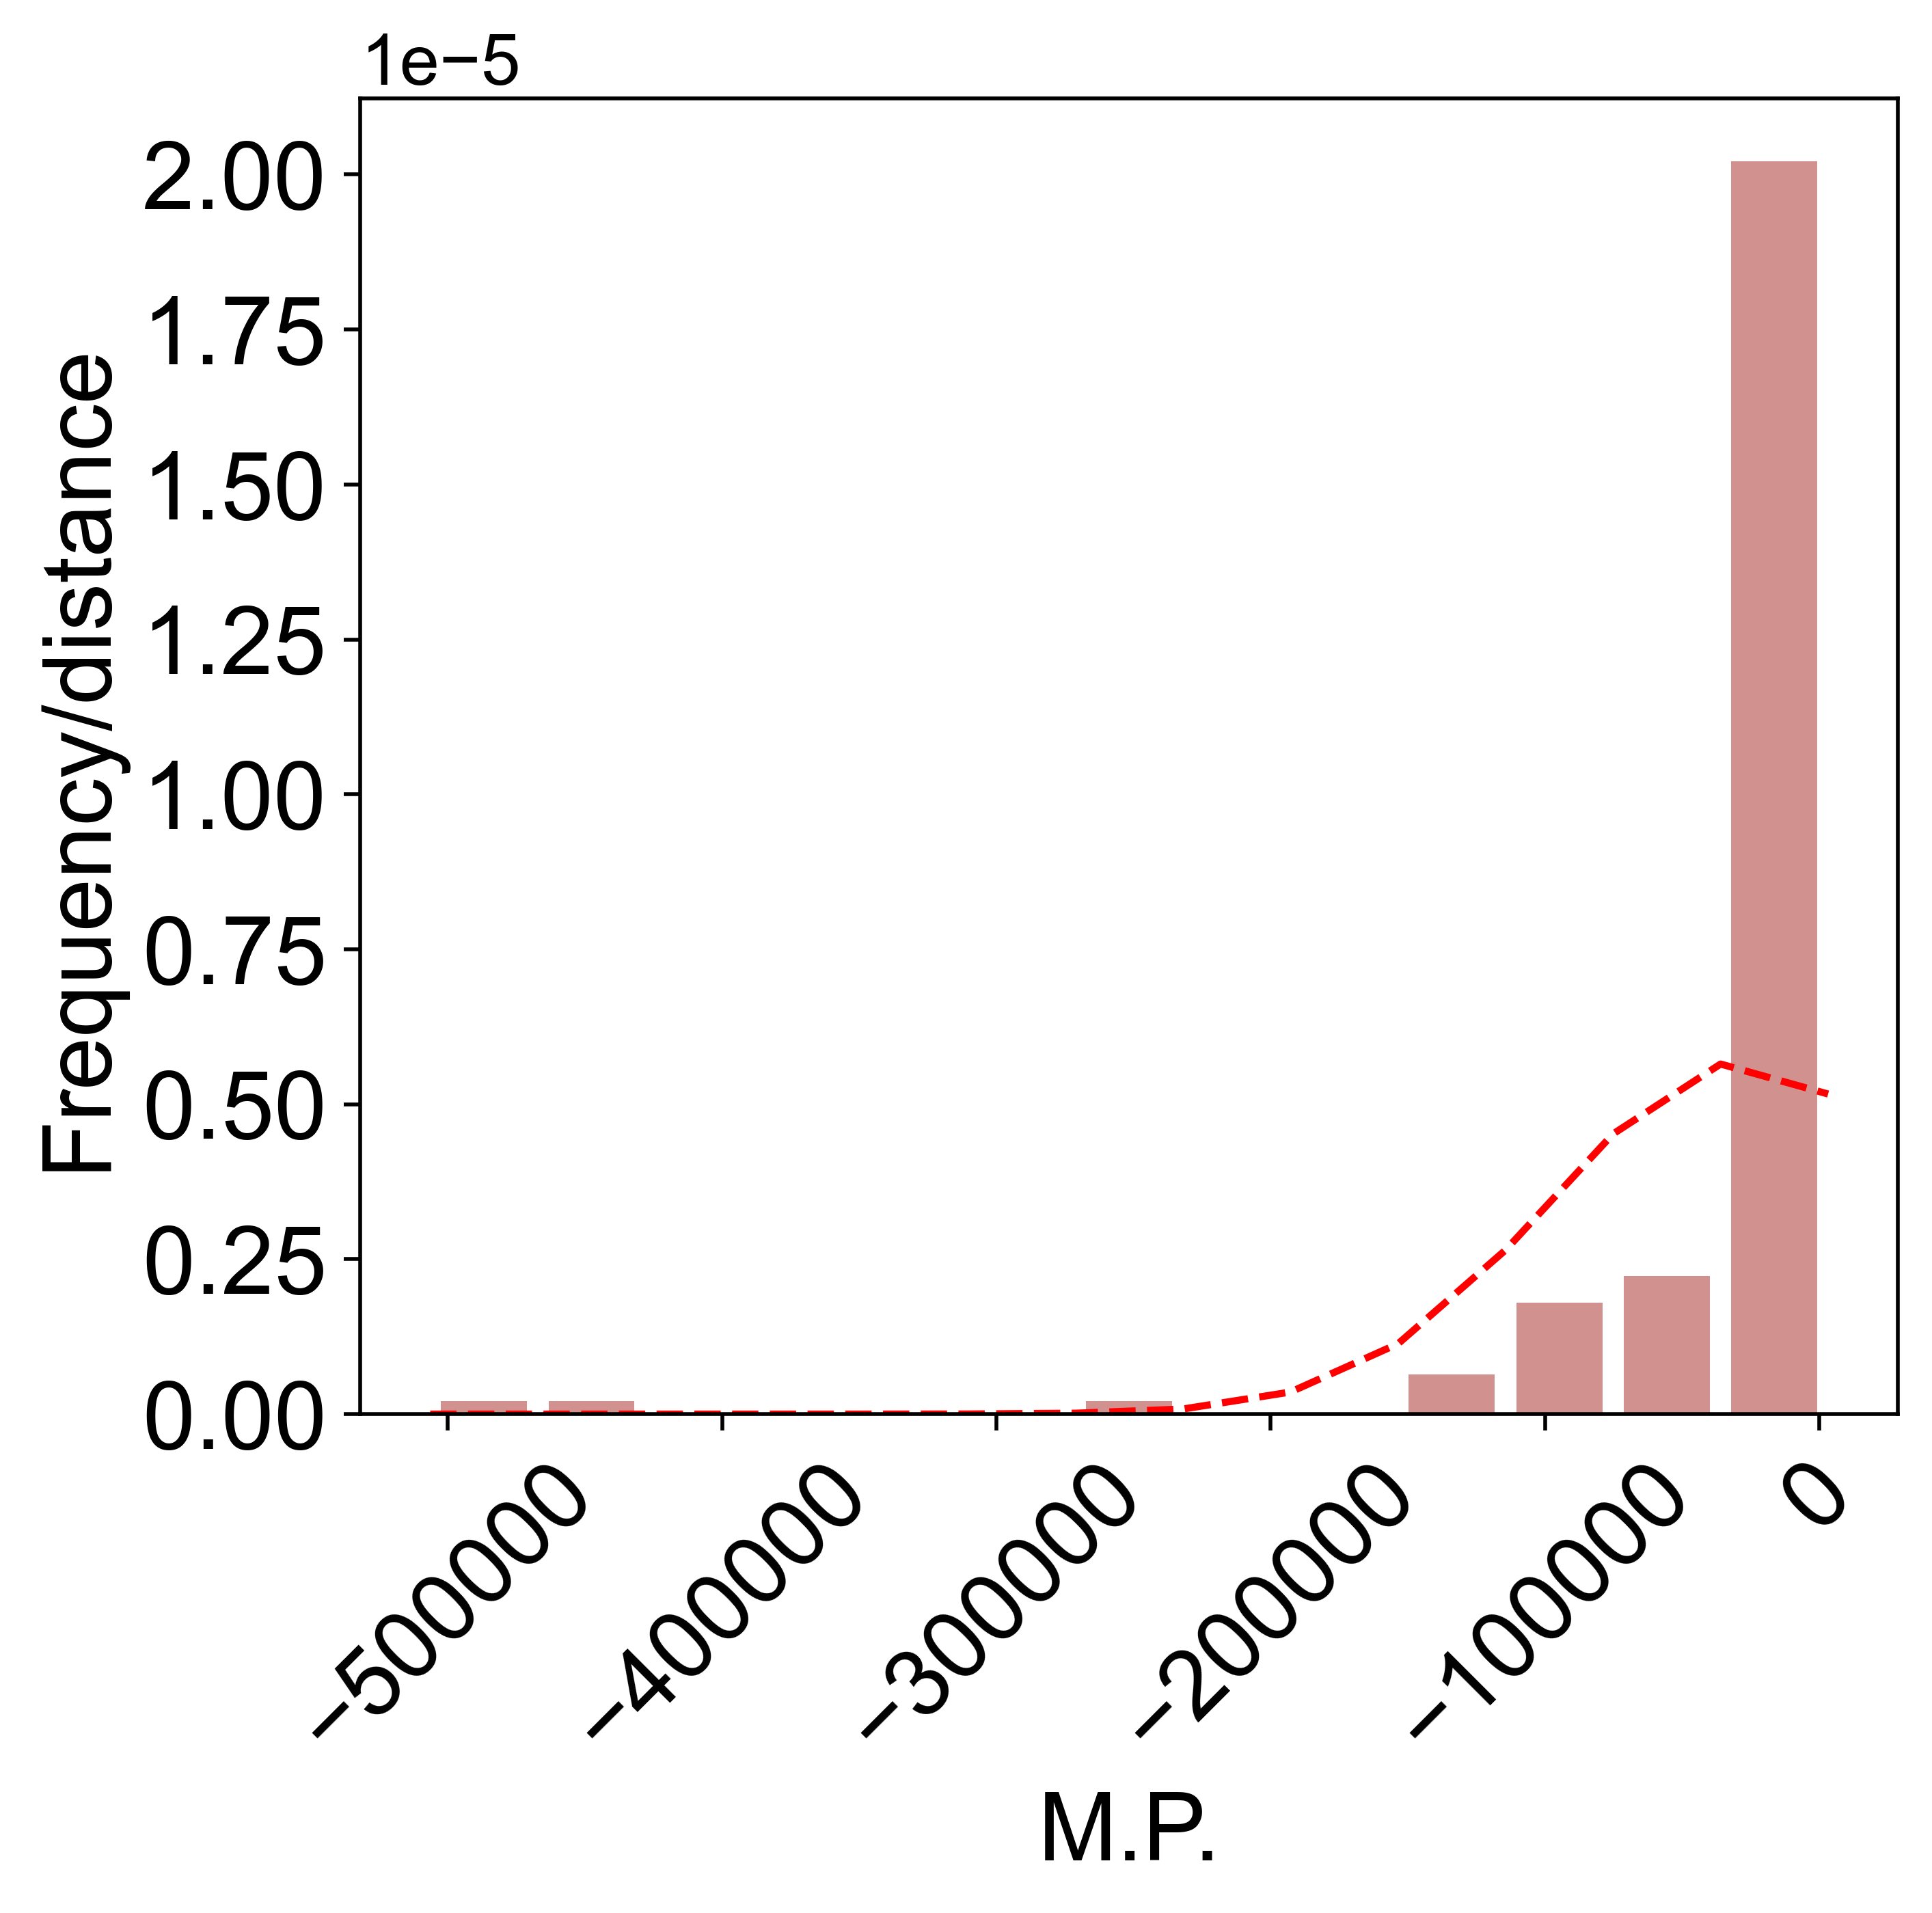

In [36]:
mu = np.mean(df['M.P.']) #平均值
sigma = np.std(df['M.P.']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['M.P.'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("M.P.",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial', rotation=45)
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "M.P..png",transparent=False,bbox_inches='tight')

plt.show()

-0.011058592033866865 0.09308585259284481


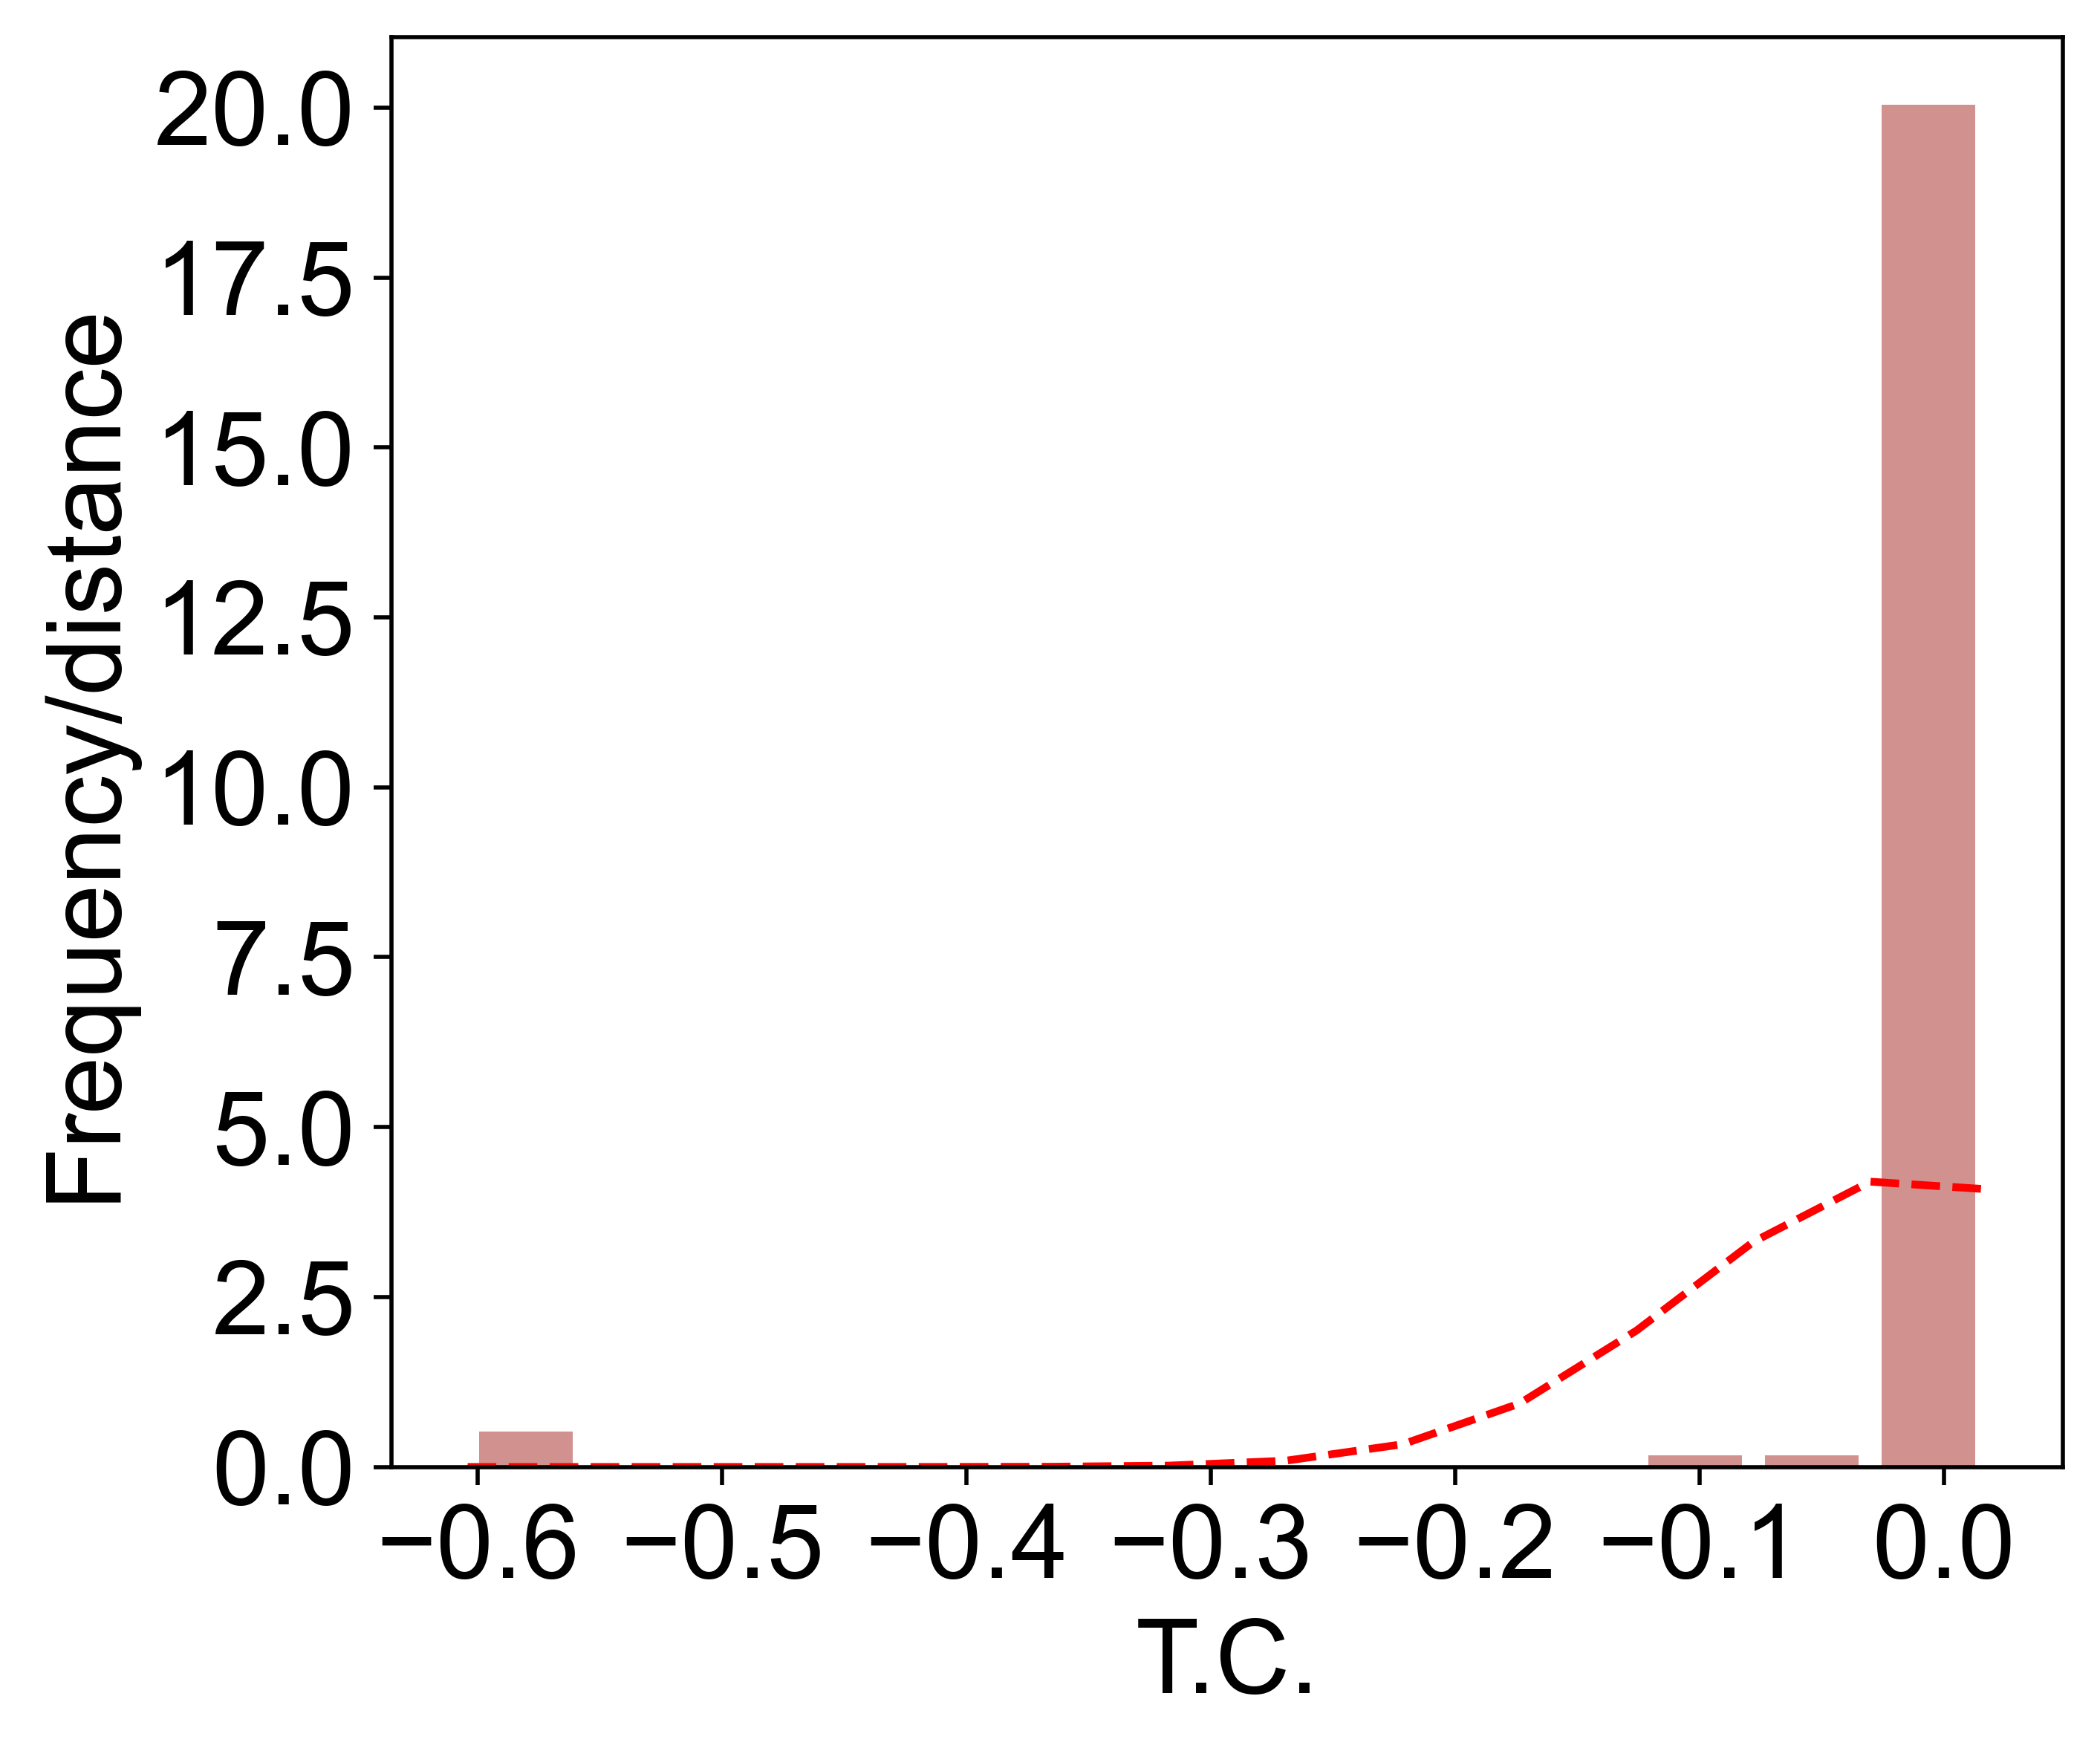

In [41]:
mu = np.mean(df['T.C.']) #平均值
sigma = np.std(df['T.C.']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['T.C.'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("T.C.",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "T.C..png",transparent=False,bbox_inches='tight')

plt.show()

-0.7984561474004899 2.3951337607096717


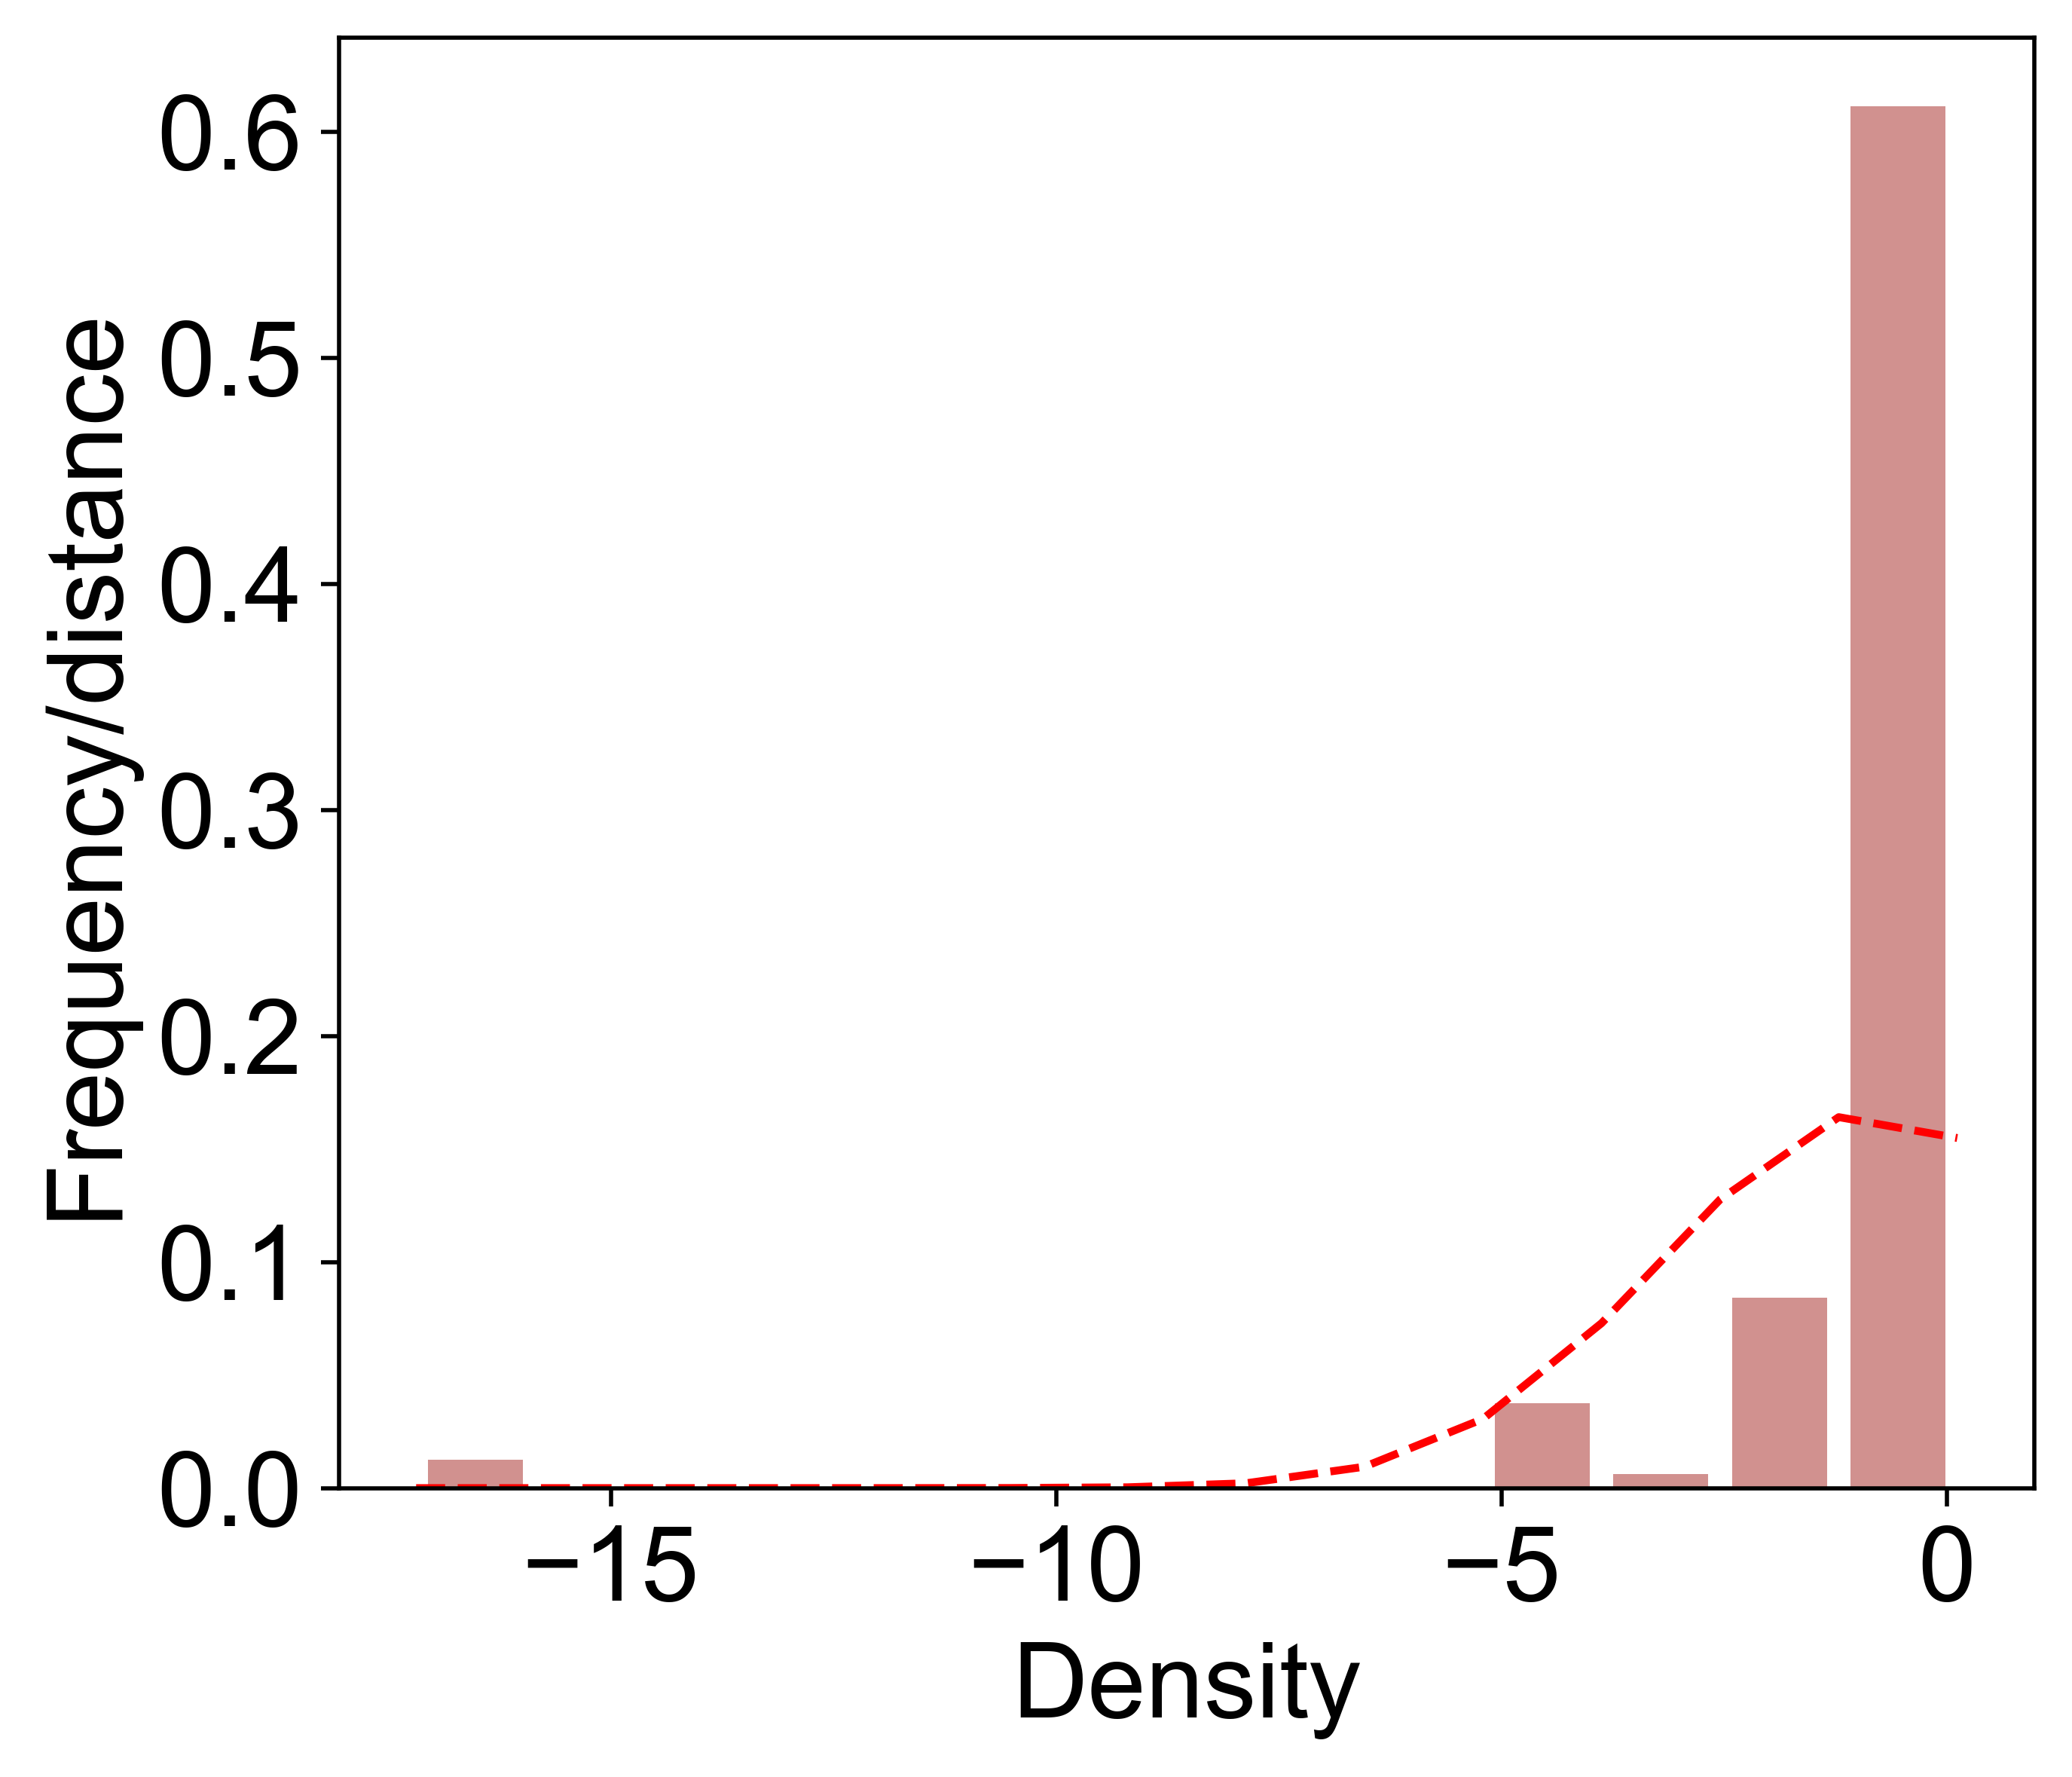

In [40]:
mu = np.mean(df['Density']) #平均值
sigma = np.std(df['Density']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['Density'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("Density",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "Density.png",transparent=False,bbox_inches='tight')

plt.show()

456.63900414937757 108.2562196877527


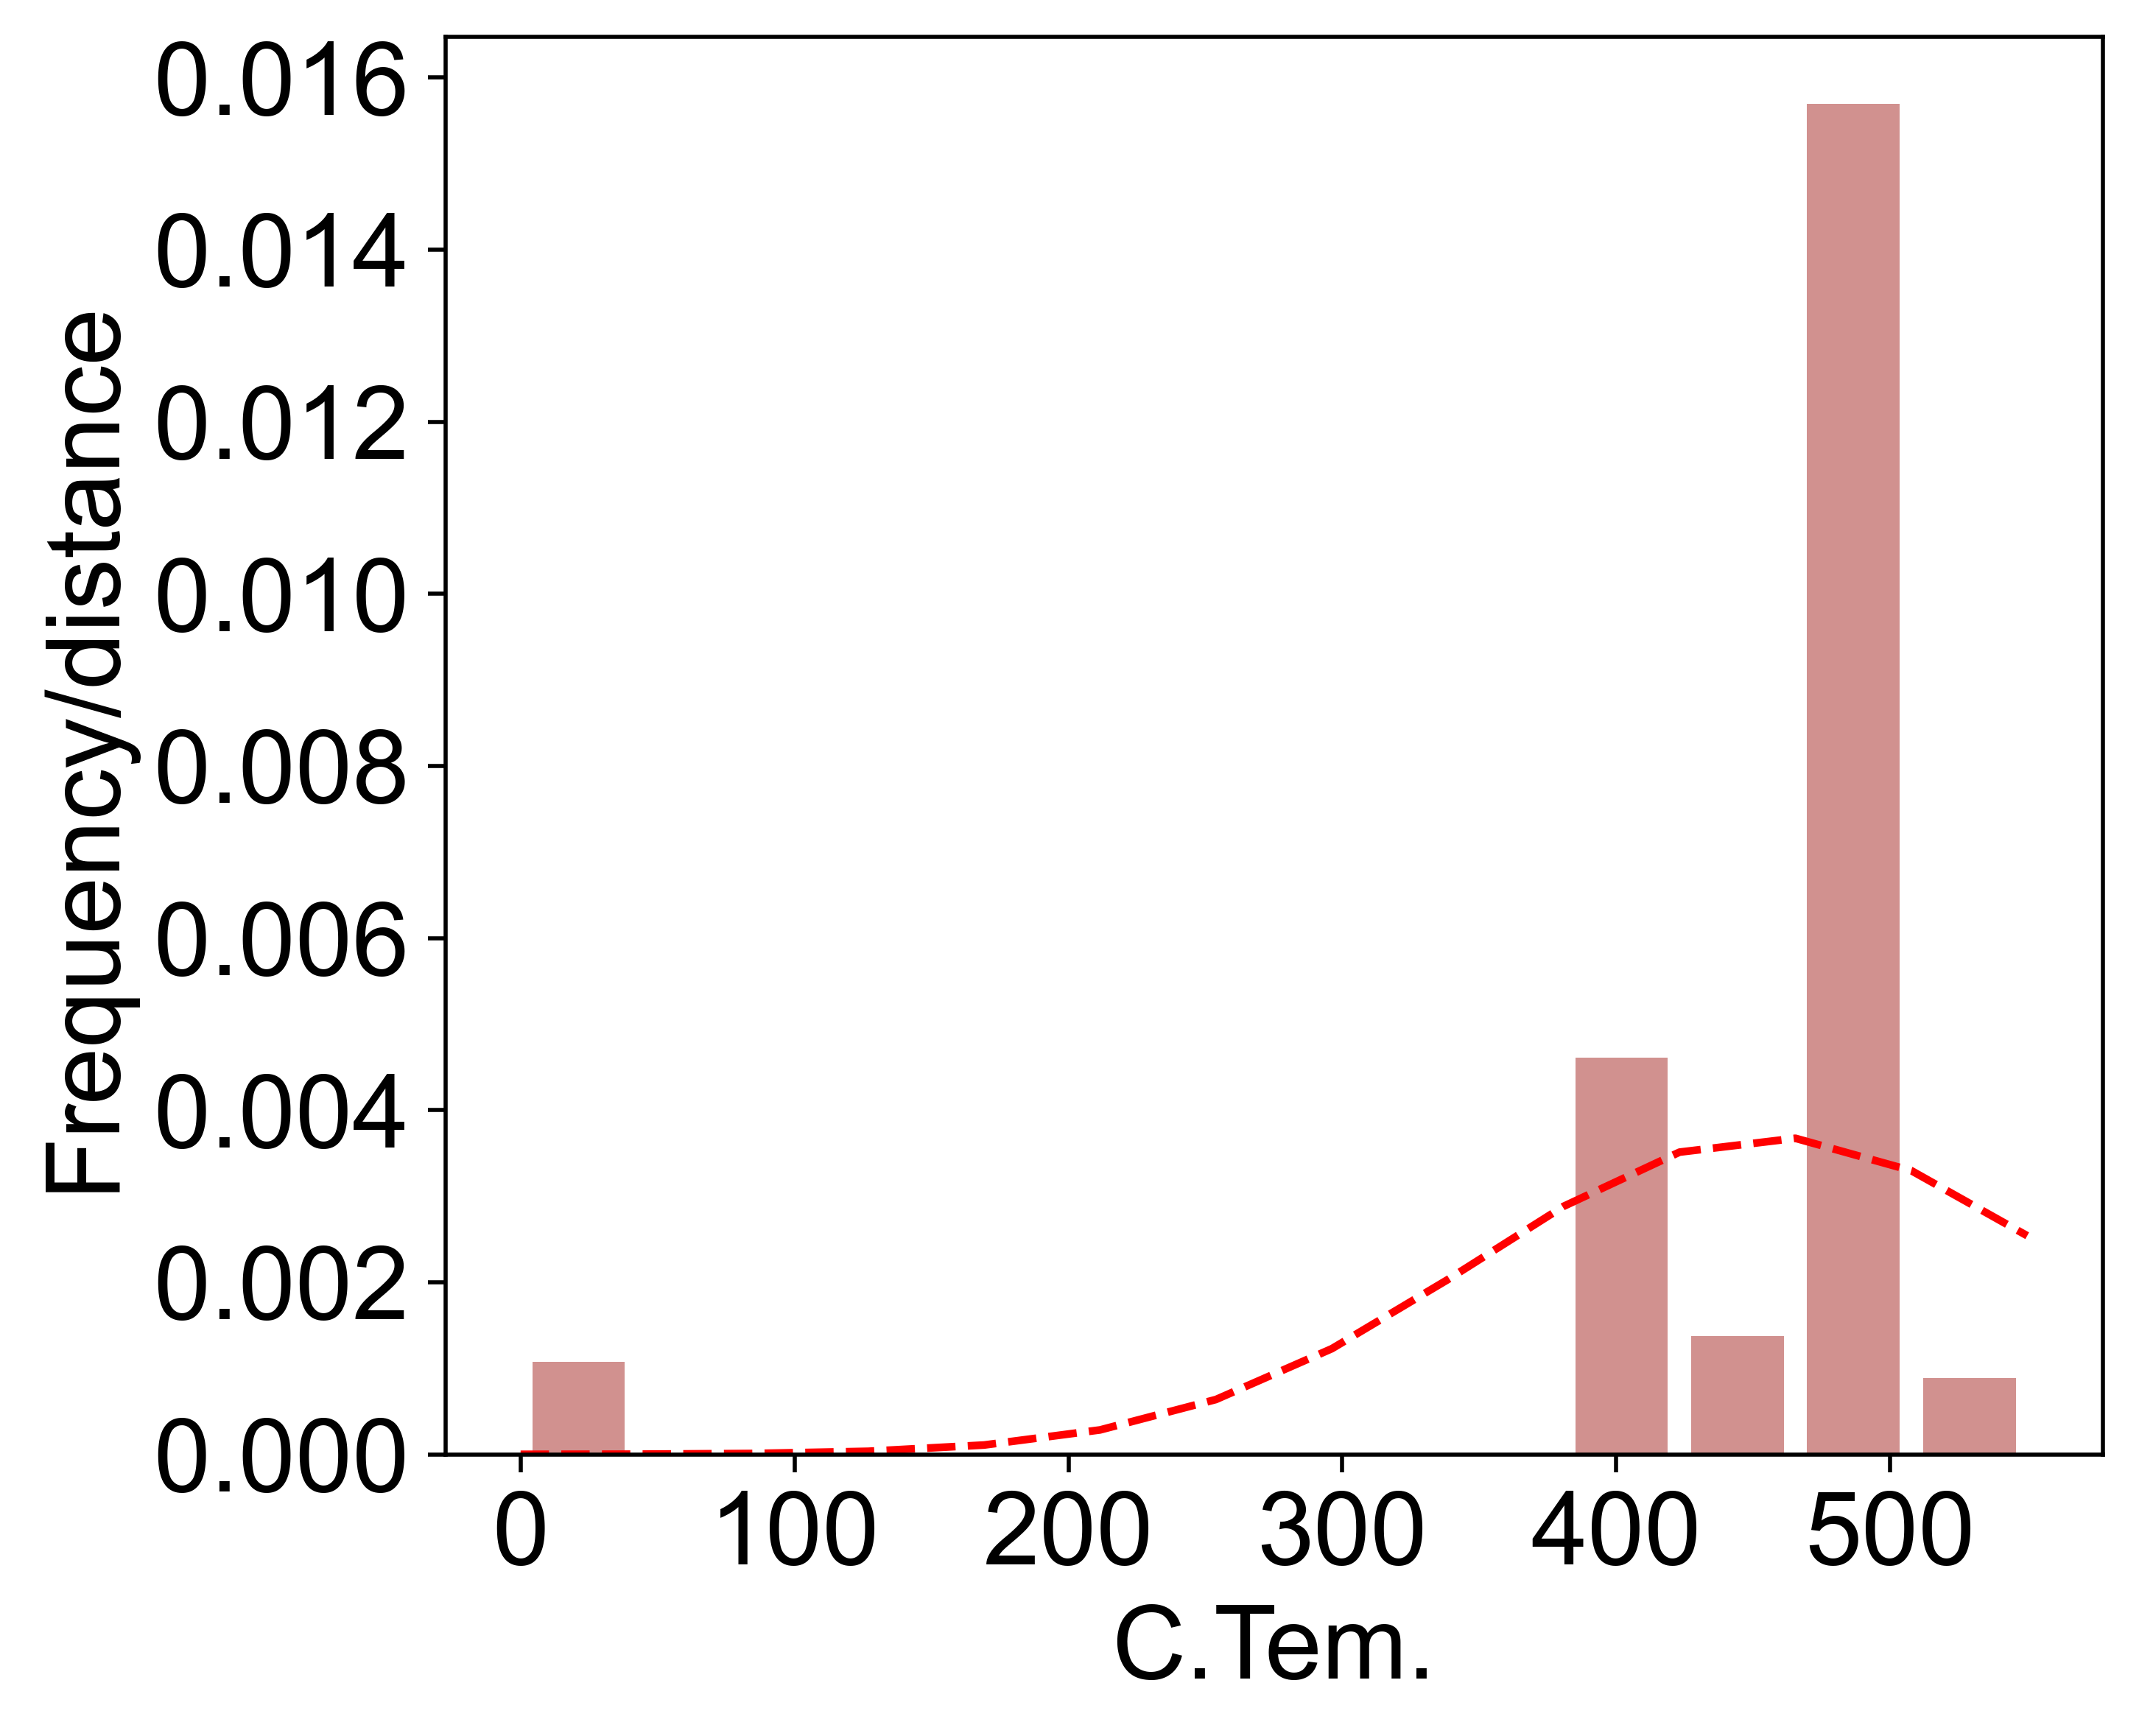

In [42]:
mu = np.mean(df['C.Tem.']) #平均值
sigma = np.std(df['C.Tem.']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['C.Tem.'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("C.Tem.",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "C.Tem..png",transparent=False,bbox_inches='tight')

plt.show()

4.265560165975104 1.4273617676239836


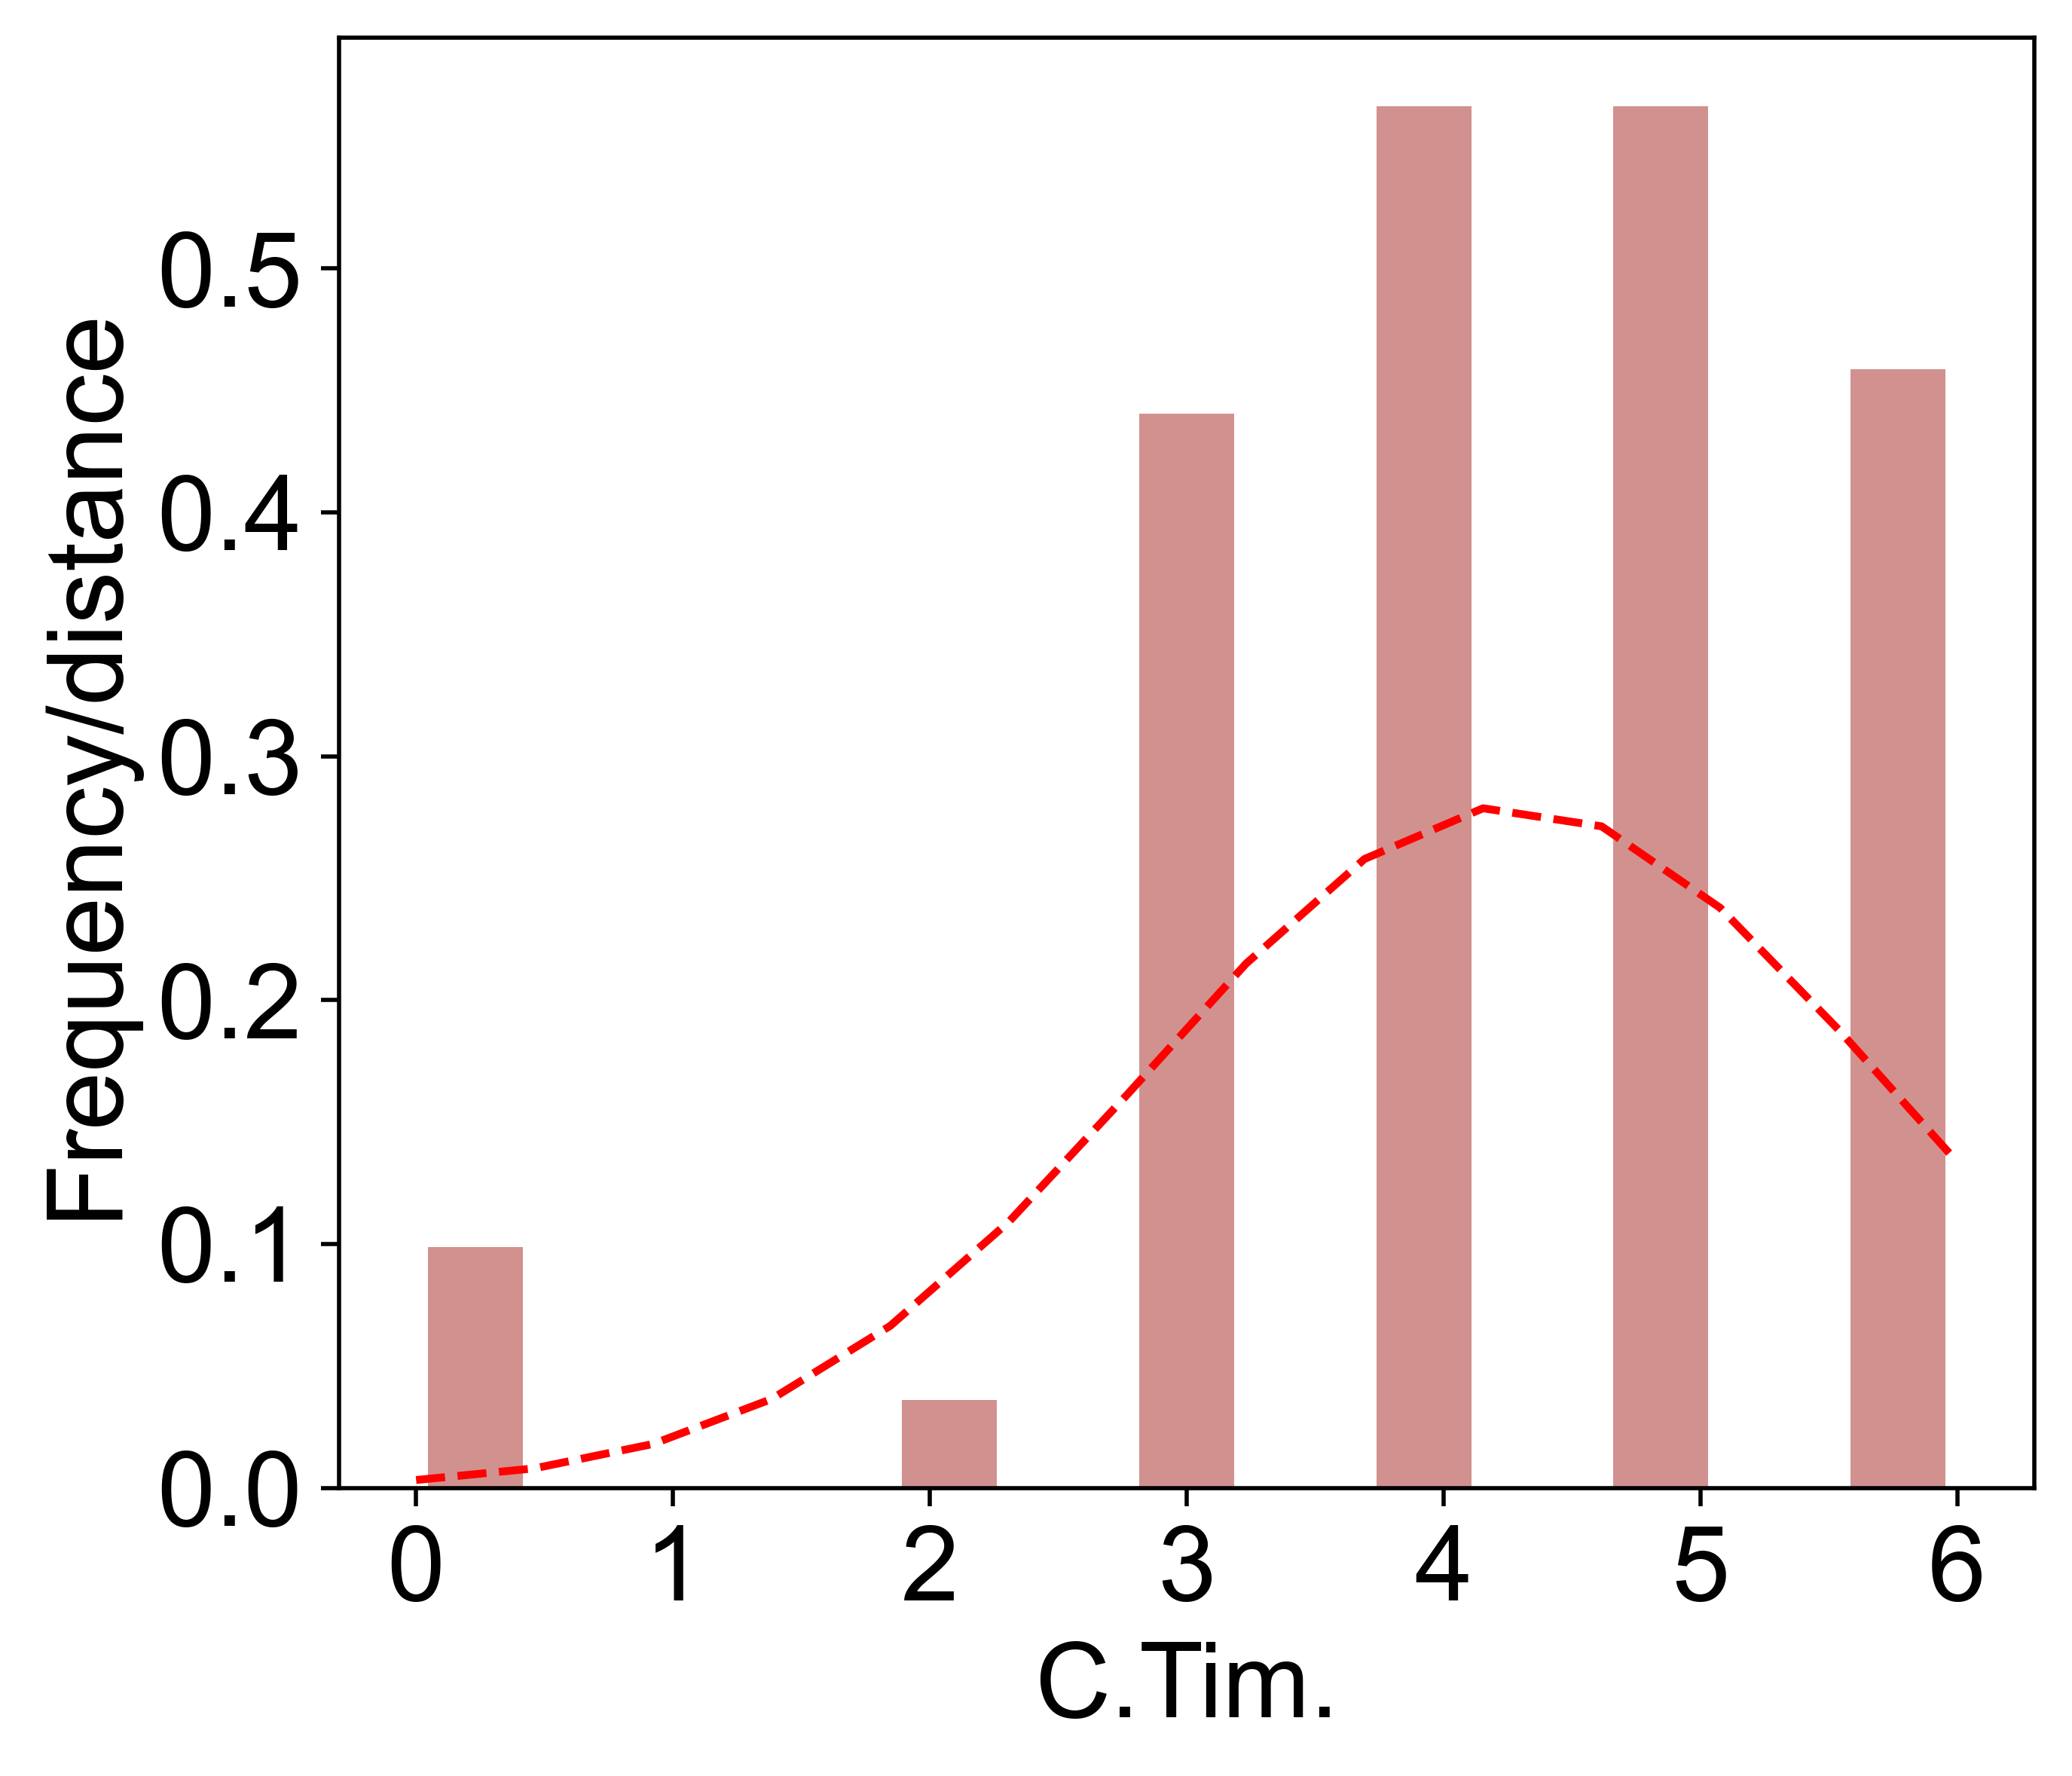

In [43]:
mu = np.mean(df['C.Tim.']) #平均值
sigma = np.std(df['C.Tim.']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['C.Tim.'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("C.Tim.",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "C.Tim..png",transparent=False,bbox_inches='tight')

plt.show()

93.49799476817608 59.02305997192317


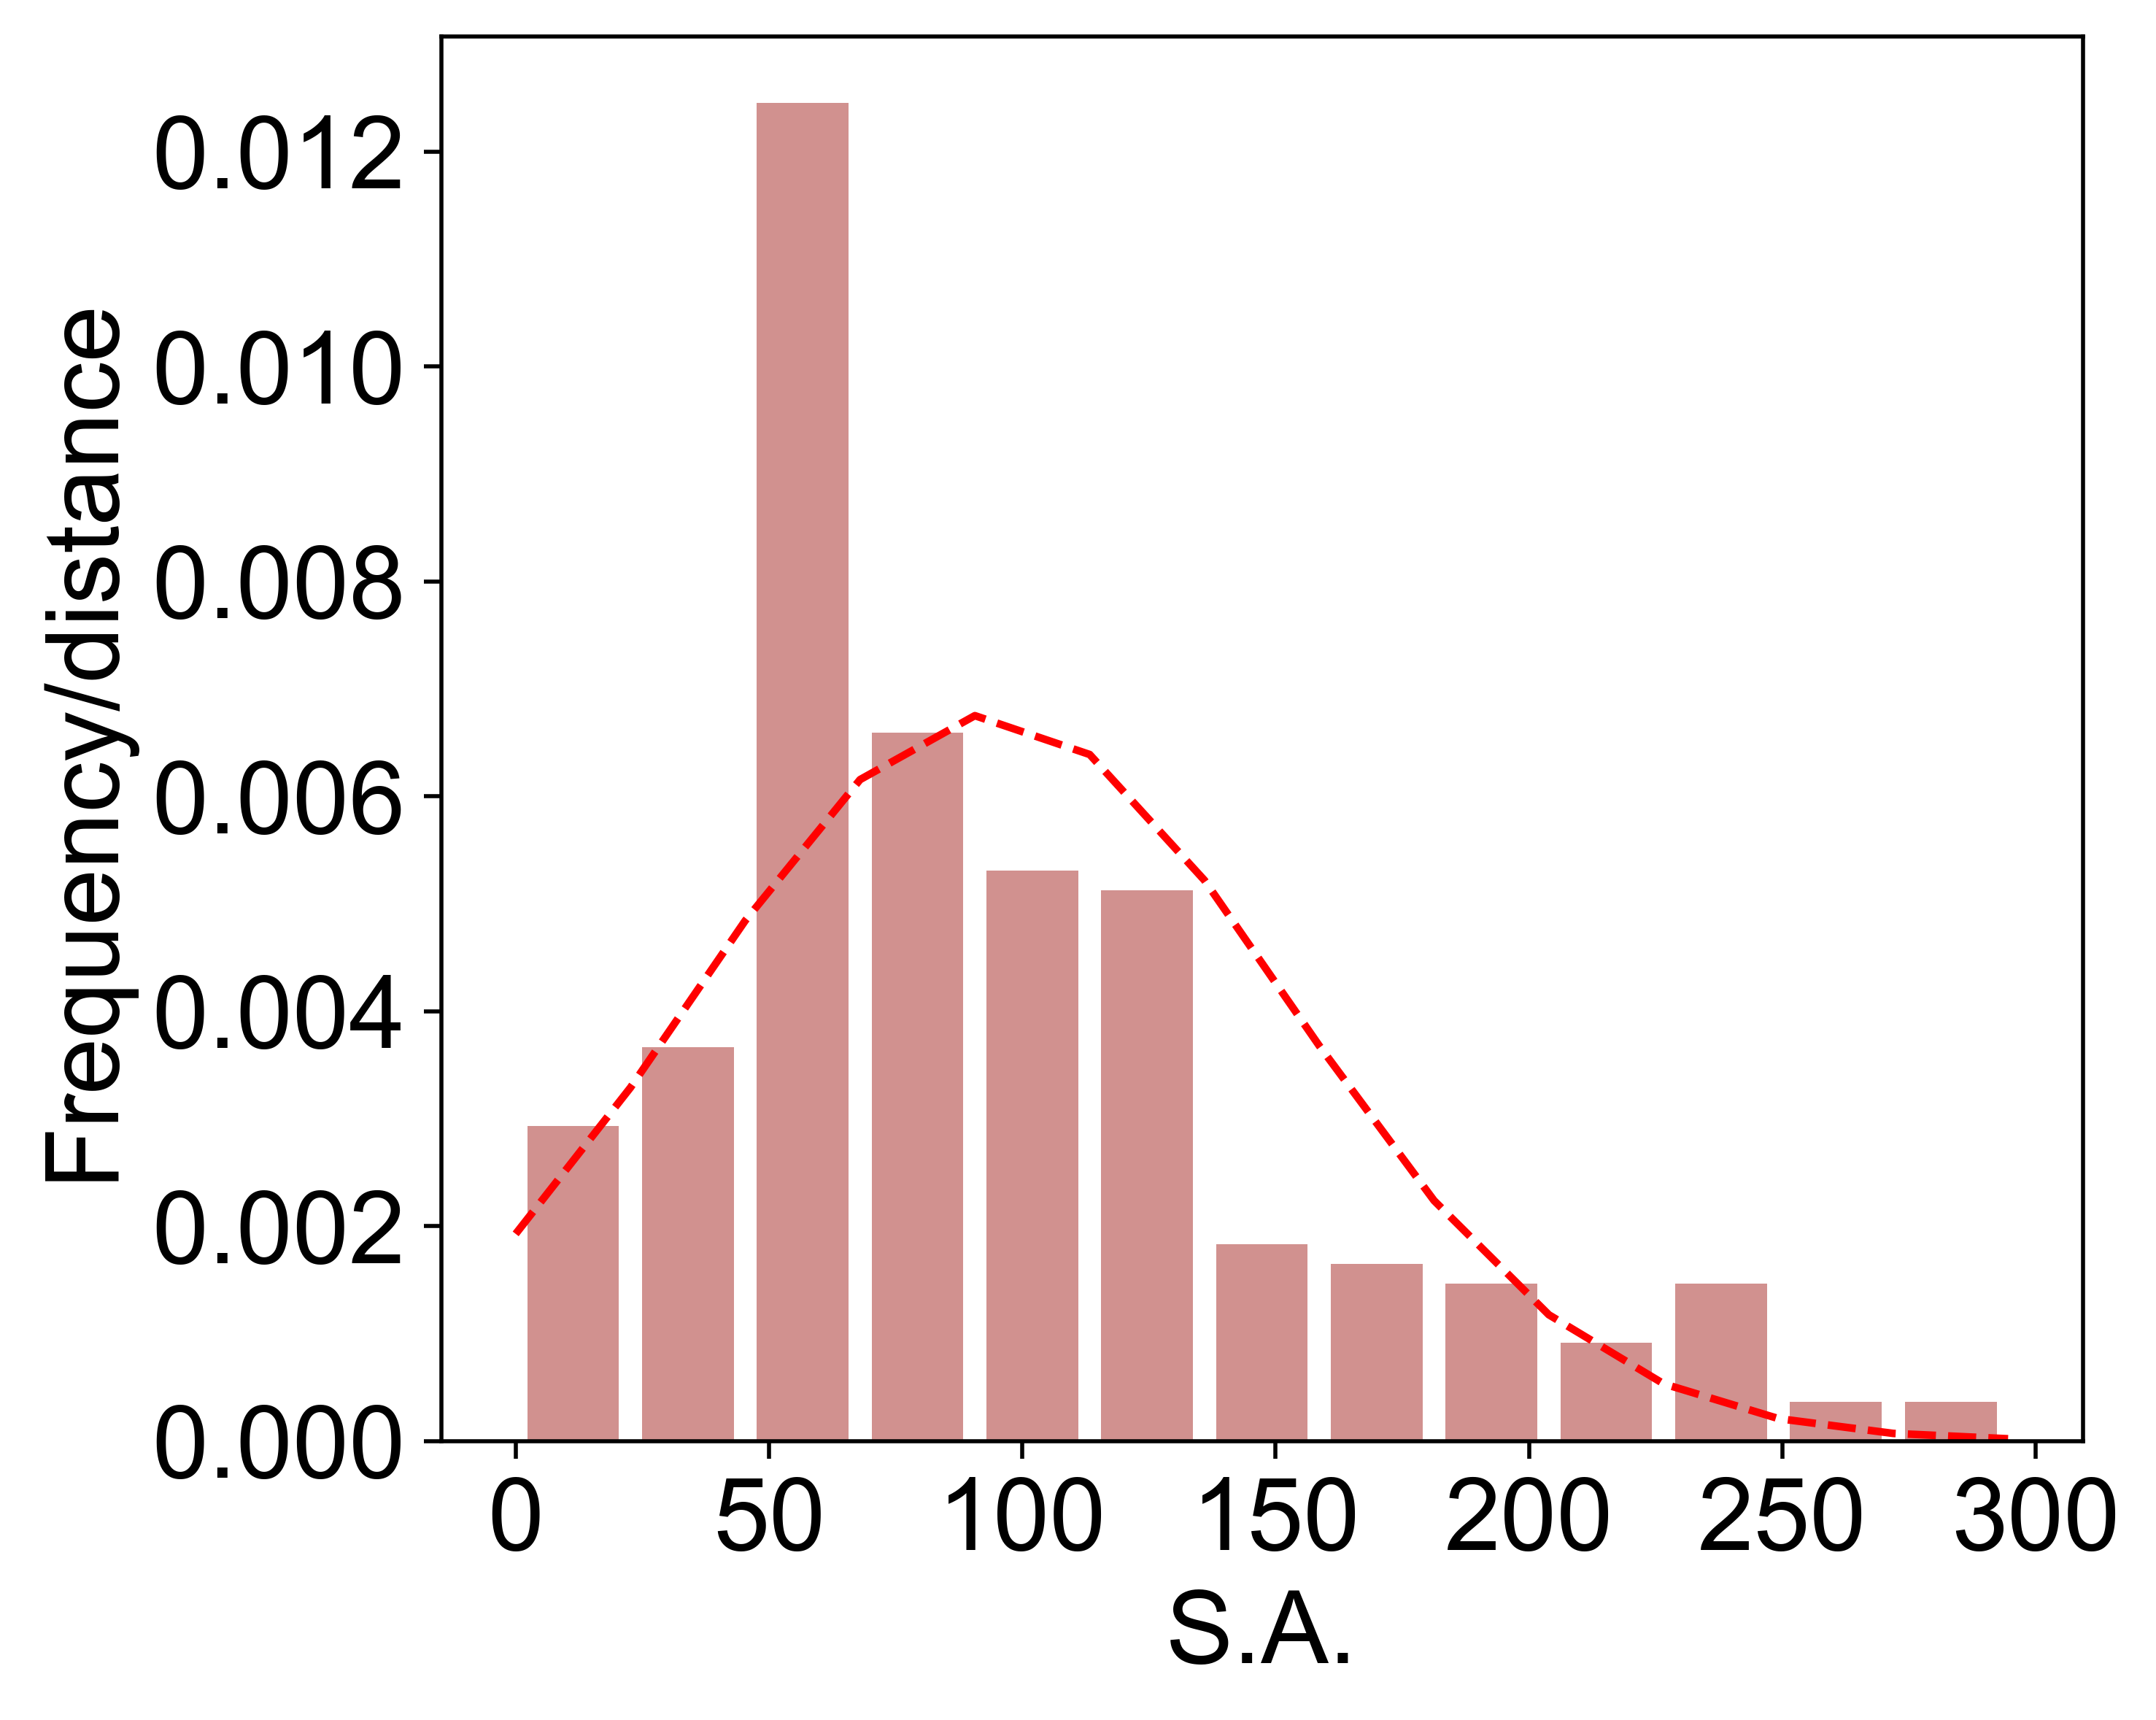

In [44]:
mu = np.mean(df['S.A.']) #平均值
sigma = np.std(df['S.A.']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['S.A.'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("S.A.",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "S.A..png",transparent=False,bbox_inches='tight')

plt.show()

0.20484156675011145 0.11657919437035222


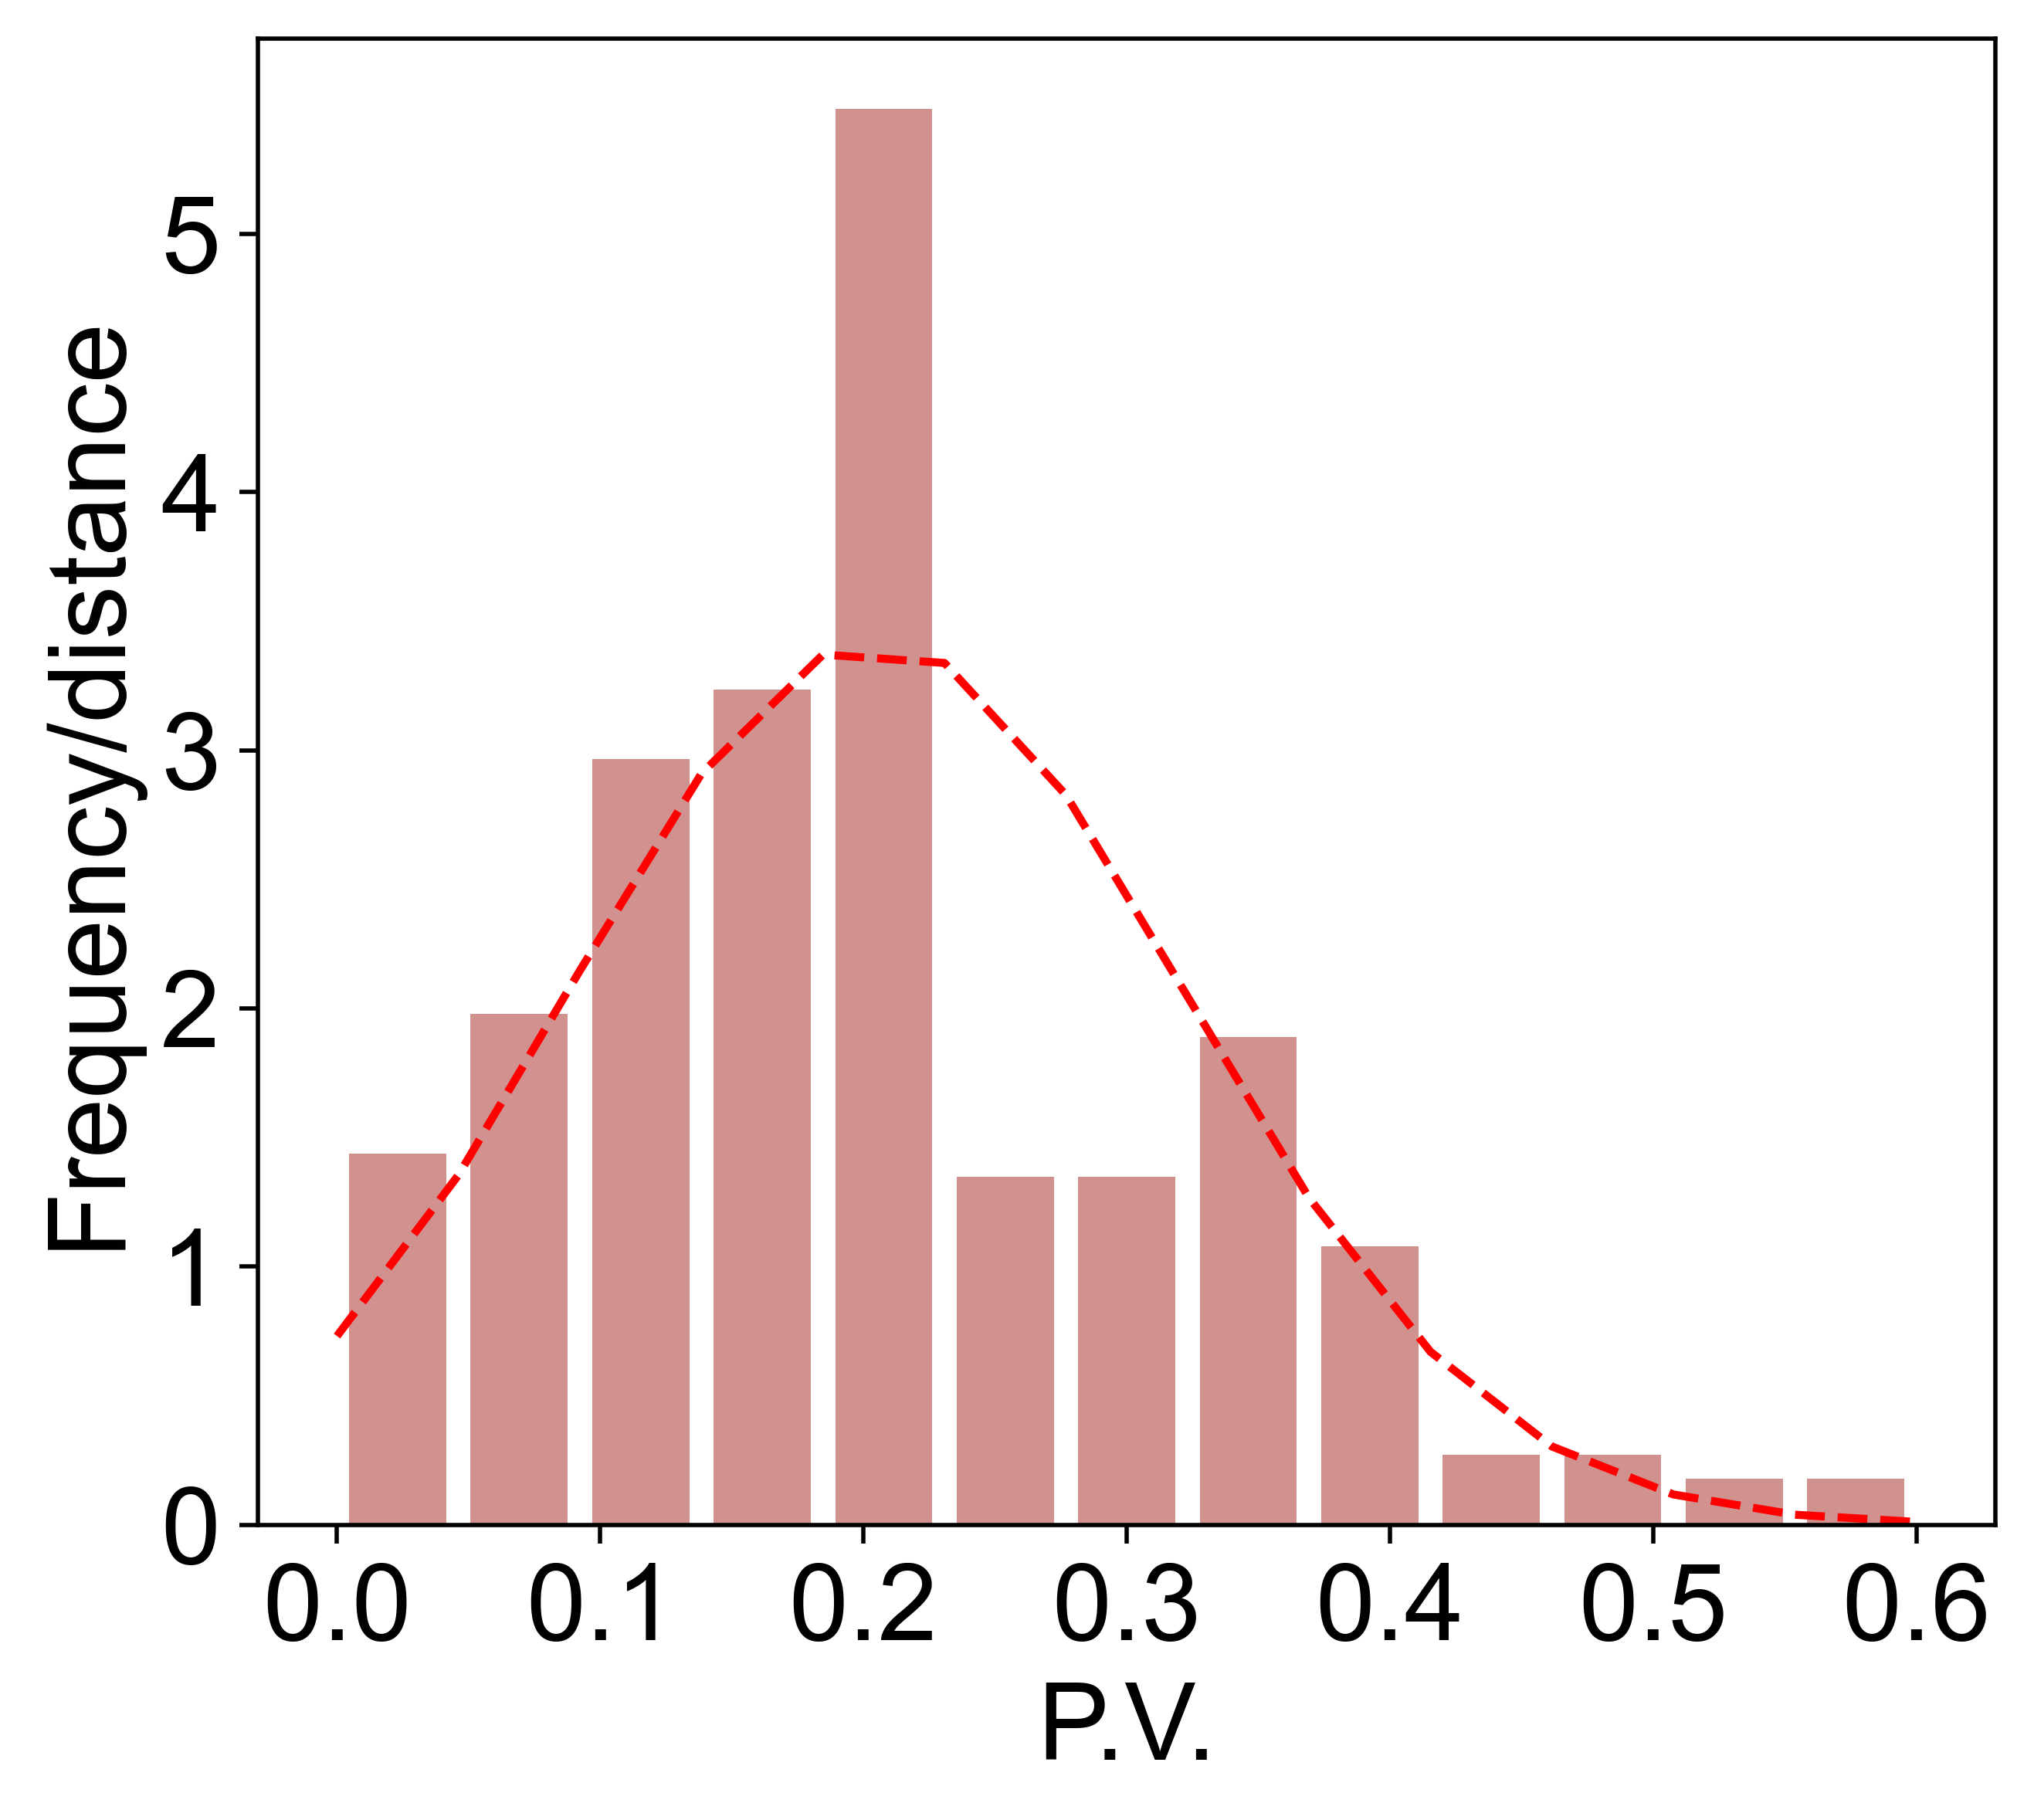

In [45]:
mu = np.mean(df['P.V.']) #平均值
sigma = np.std(df['P.V.']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['P.V.'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("P.V.",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "P.V..png",transparent=False,bbox_inches='tight')

plt.show()

9.212665603843632 5.859853739545633


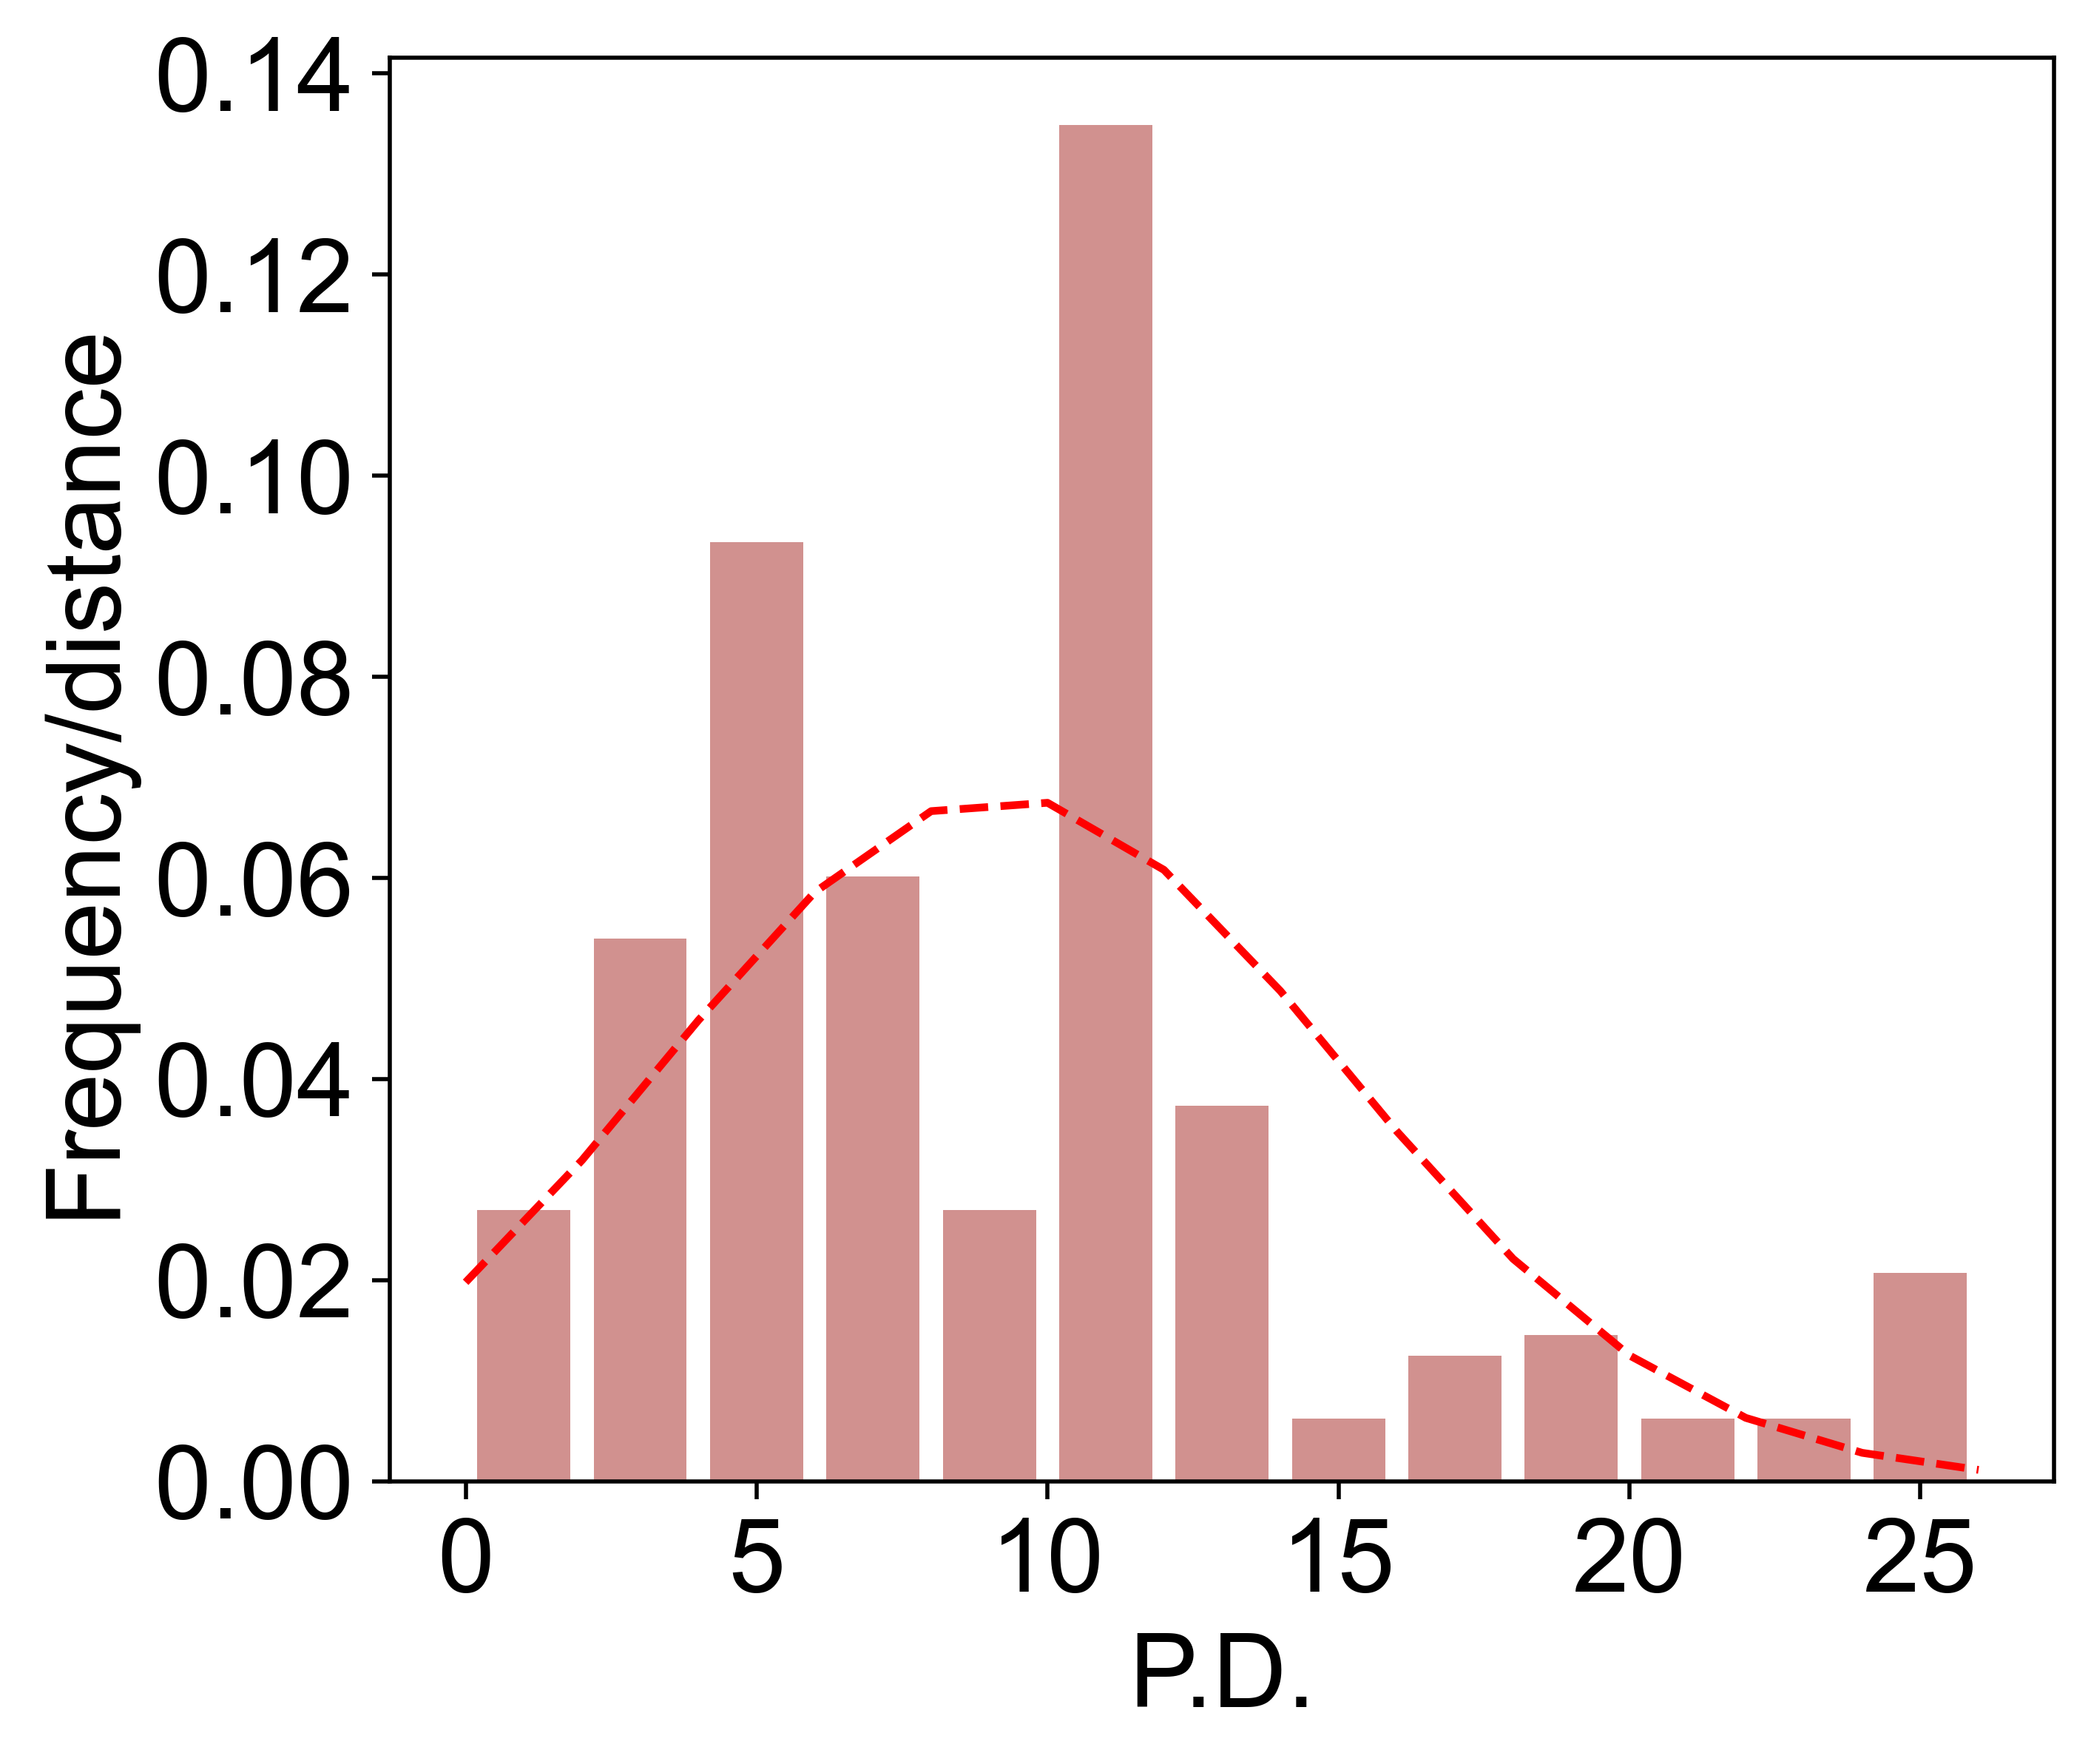

In [46]:
mu = np.mean(df['P.D.']) #平均值
sigma = np.std(df['P.D.']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['P.D.'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("P.D.",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "P.D..png",transparent=False,bbox_inches='tight')

plt.show()

203.3609958506224 196.84310994027308


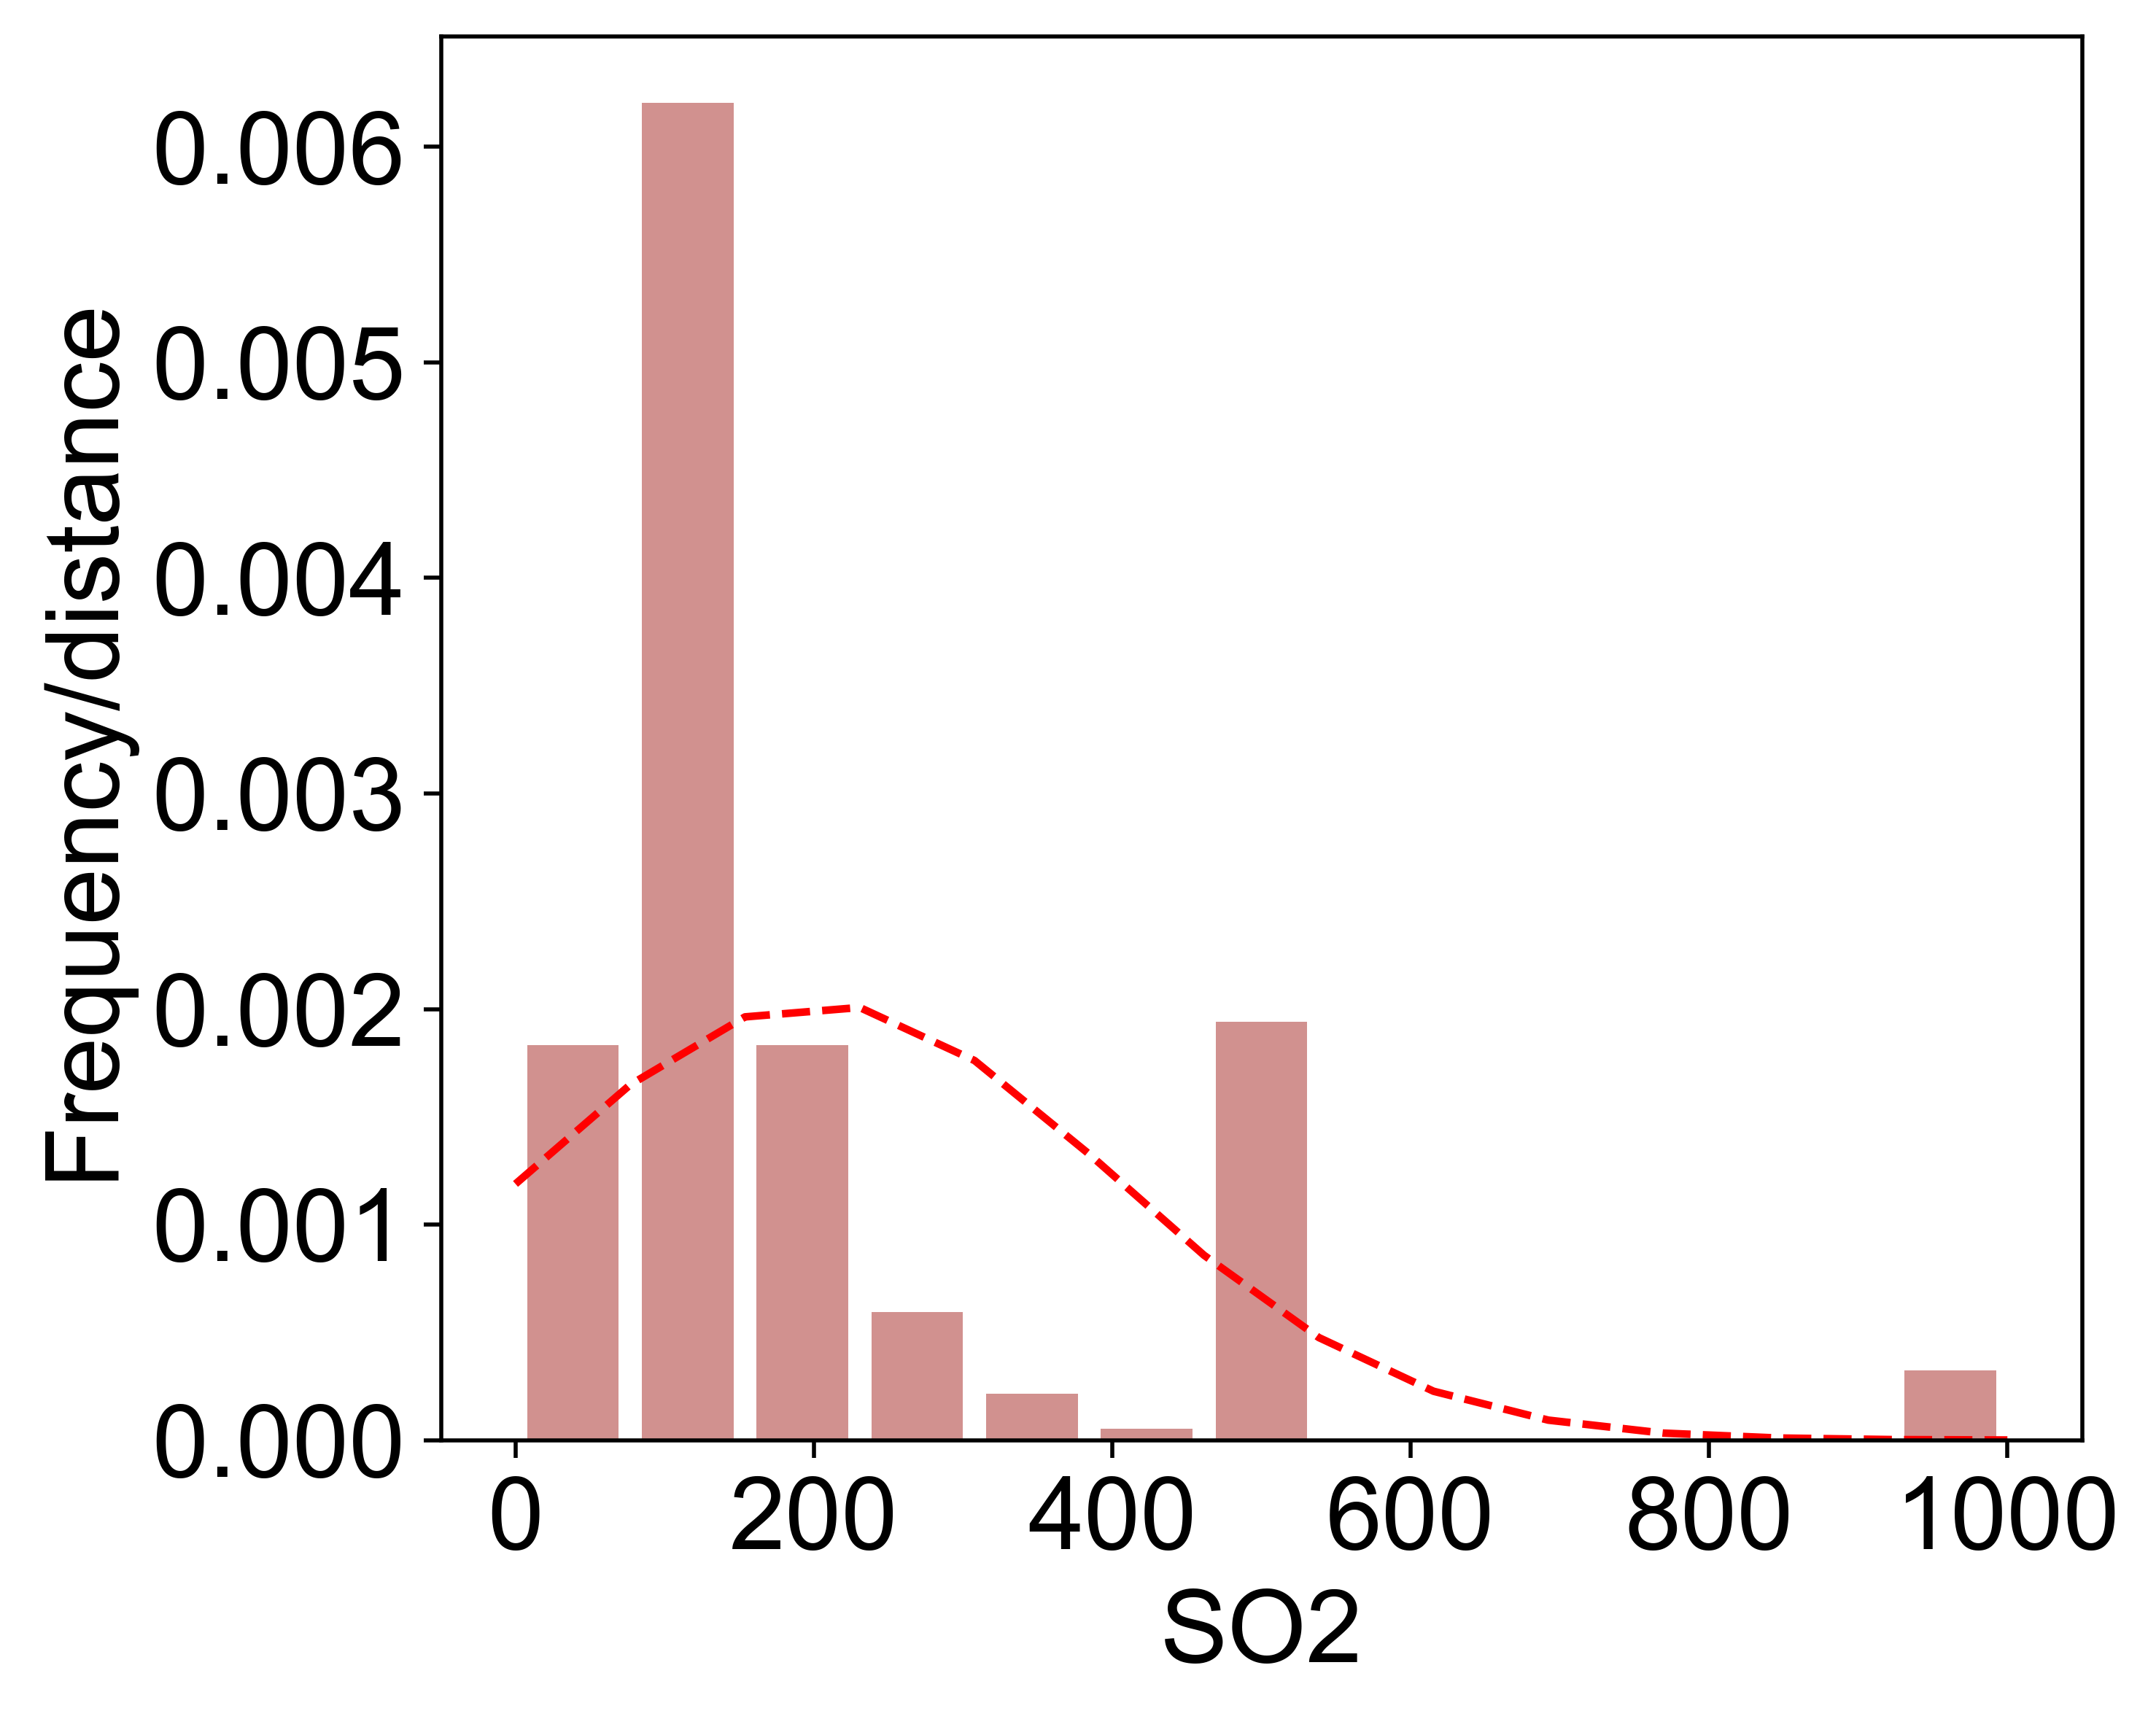

In [47]:
mu = np.mean(df['SO2']) #平均值
sigma = np.std(df['SO2']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['SO2'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("SO2",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "SO2.png",transparent=False,bbox_inches='tight')

plt.show()

567.5103734439834 243.22697614694573


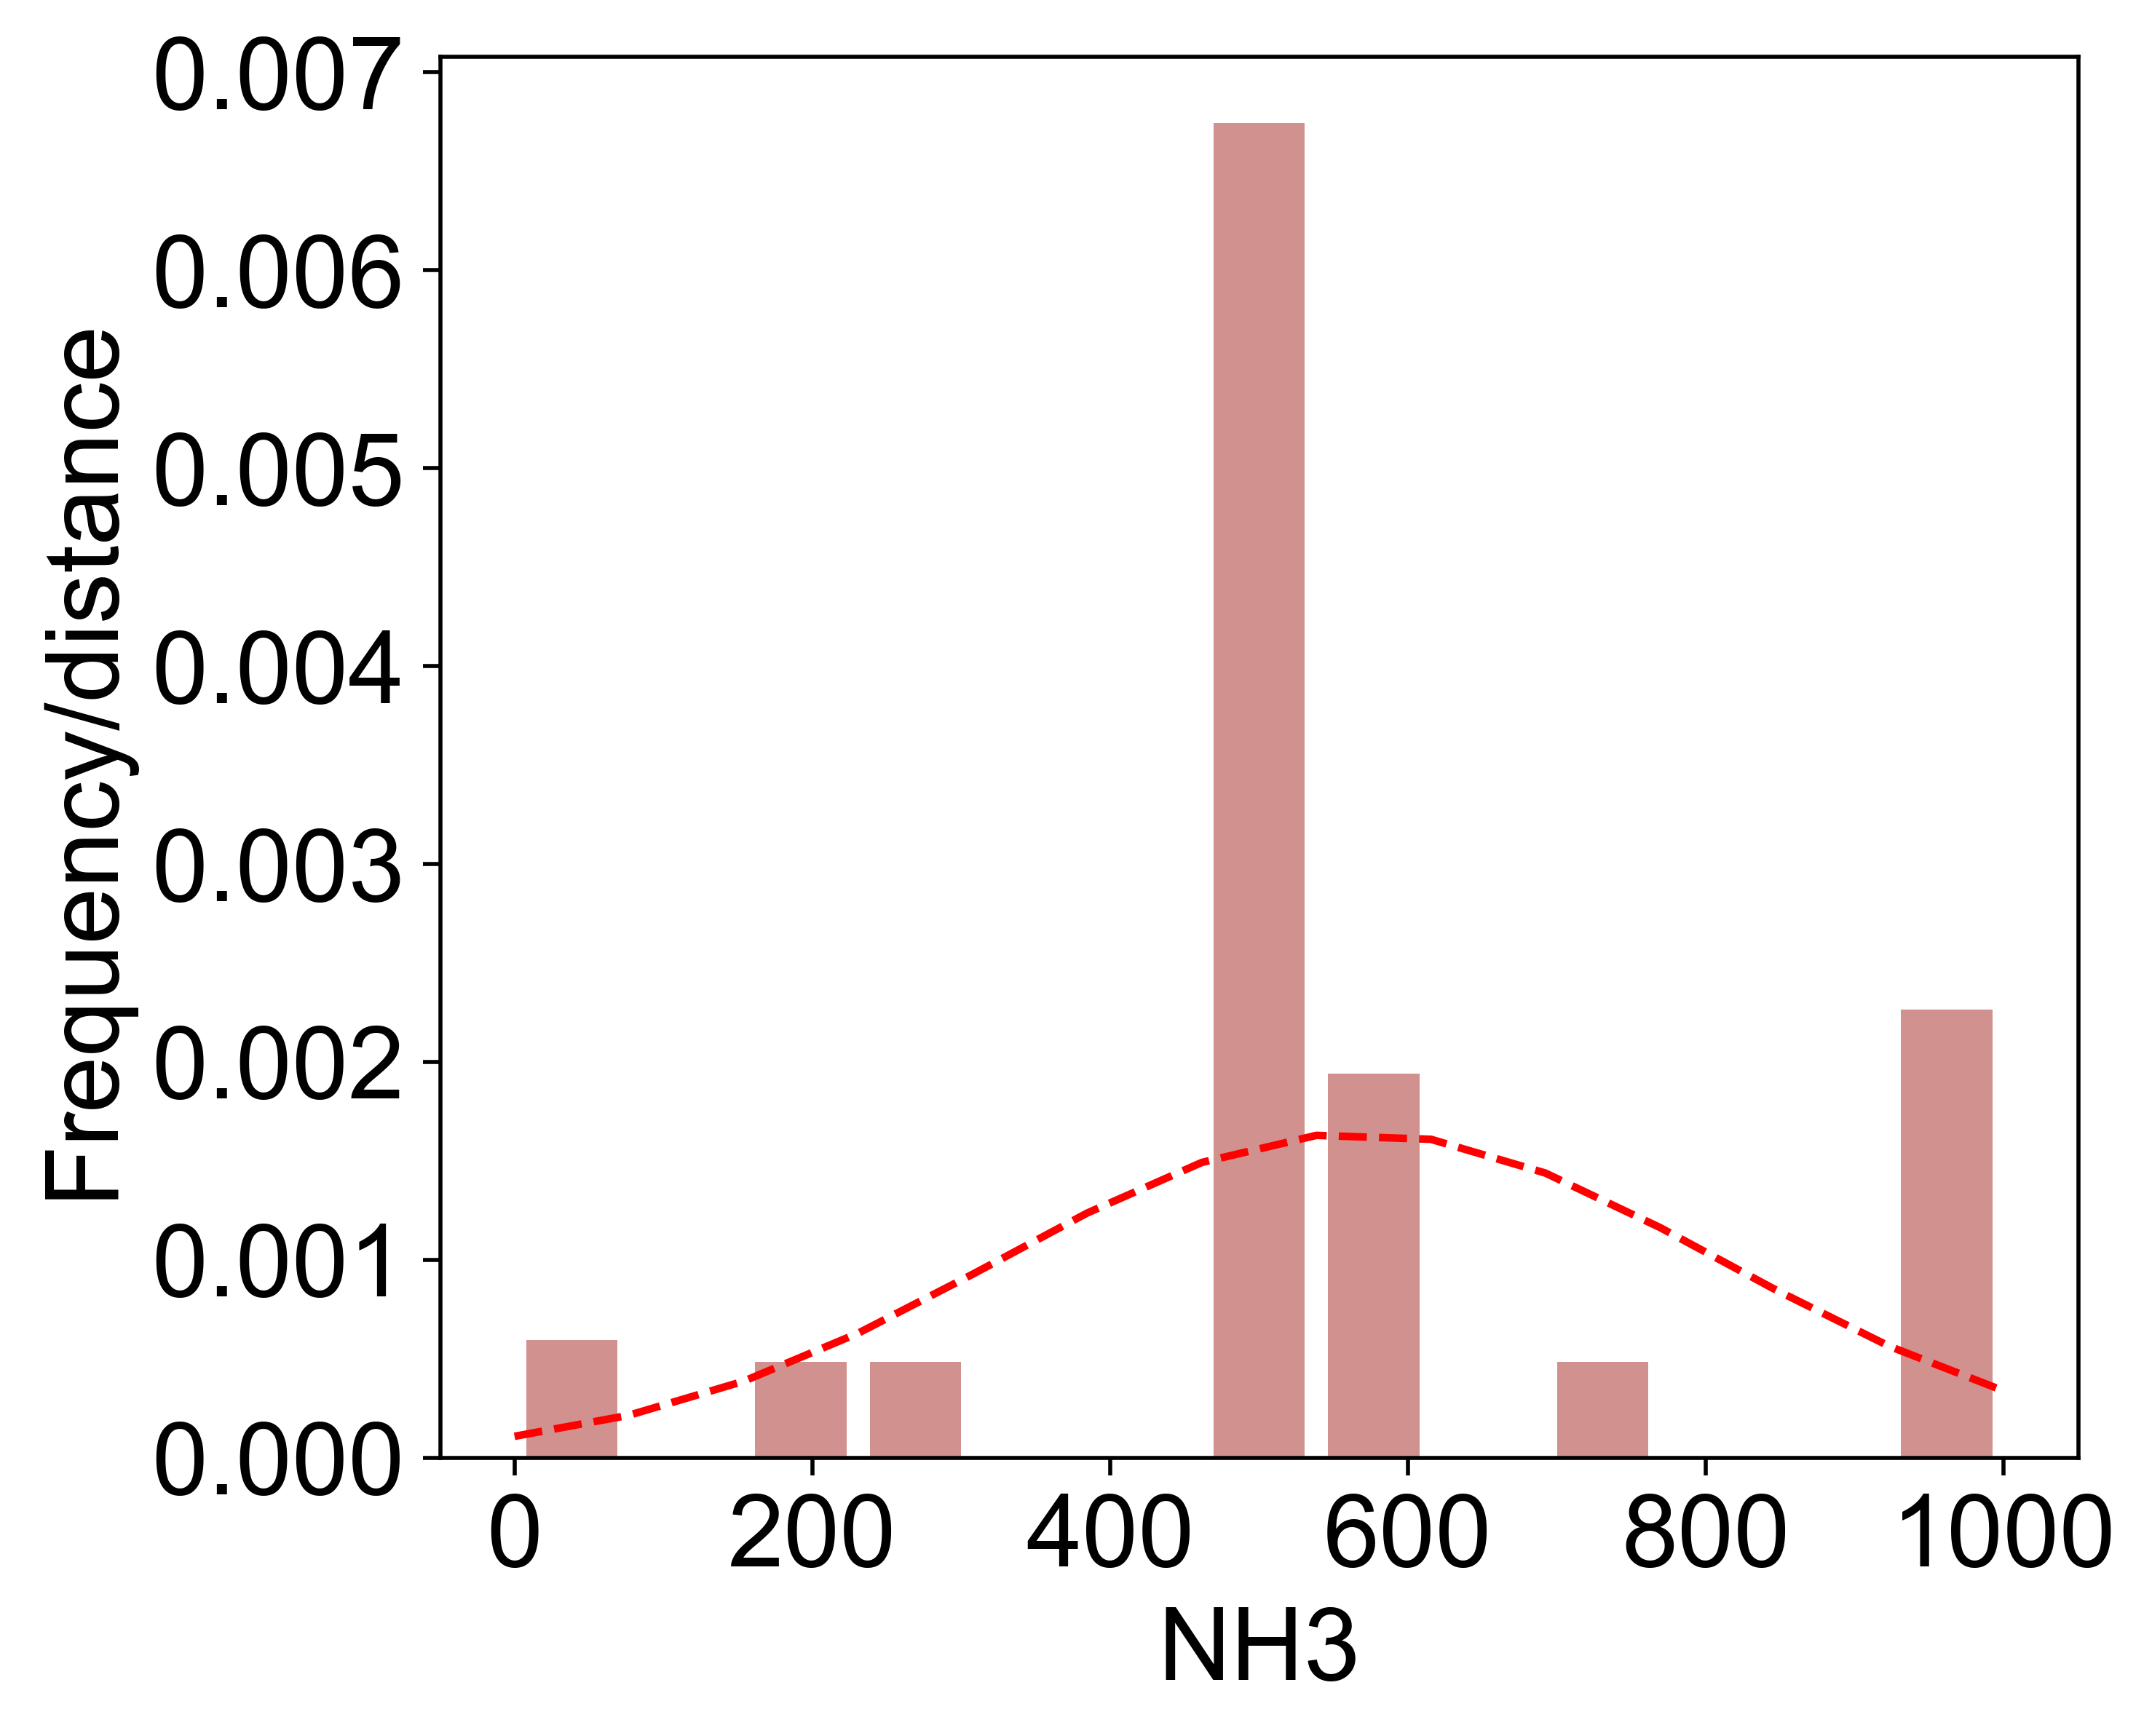

In [48]:
mu = np.mean(df['NH3']) #平均值
sigma = np.std(df['NH3']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['NH3'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("NH3",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "NH3.png",transparent=False,bbox_inches='tight')

plt.show()

571.5767634854772 242.63252639032936


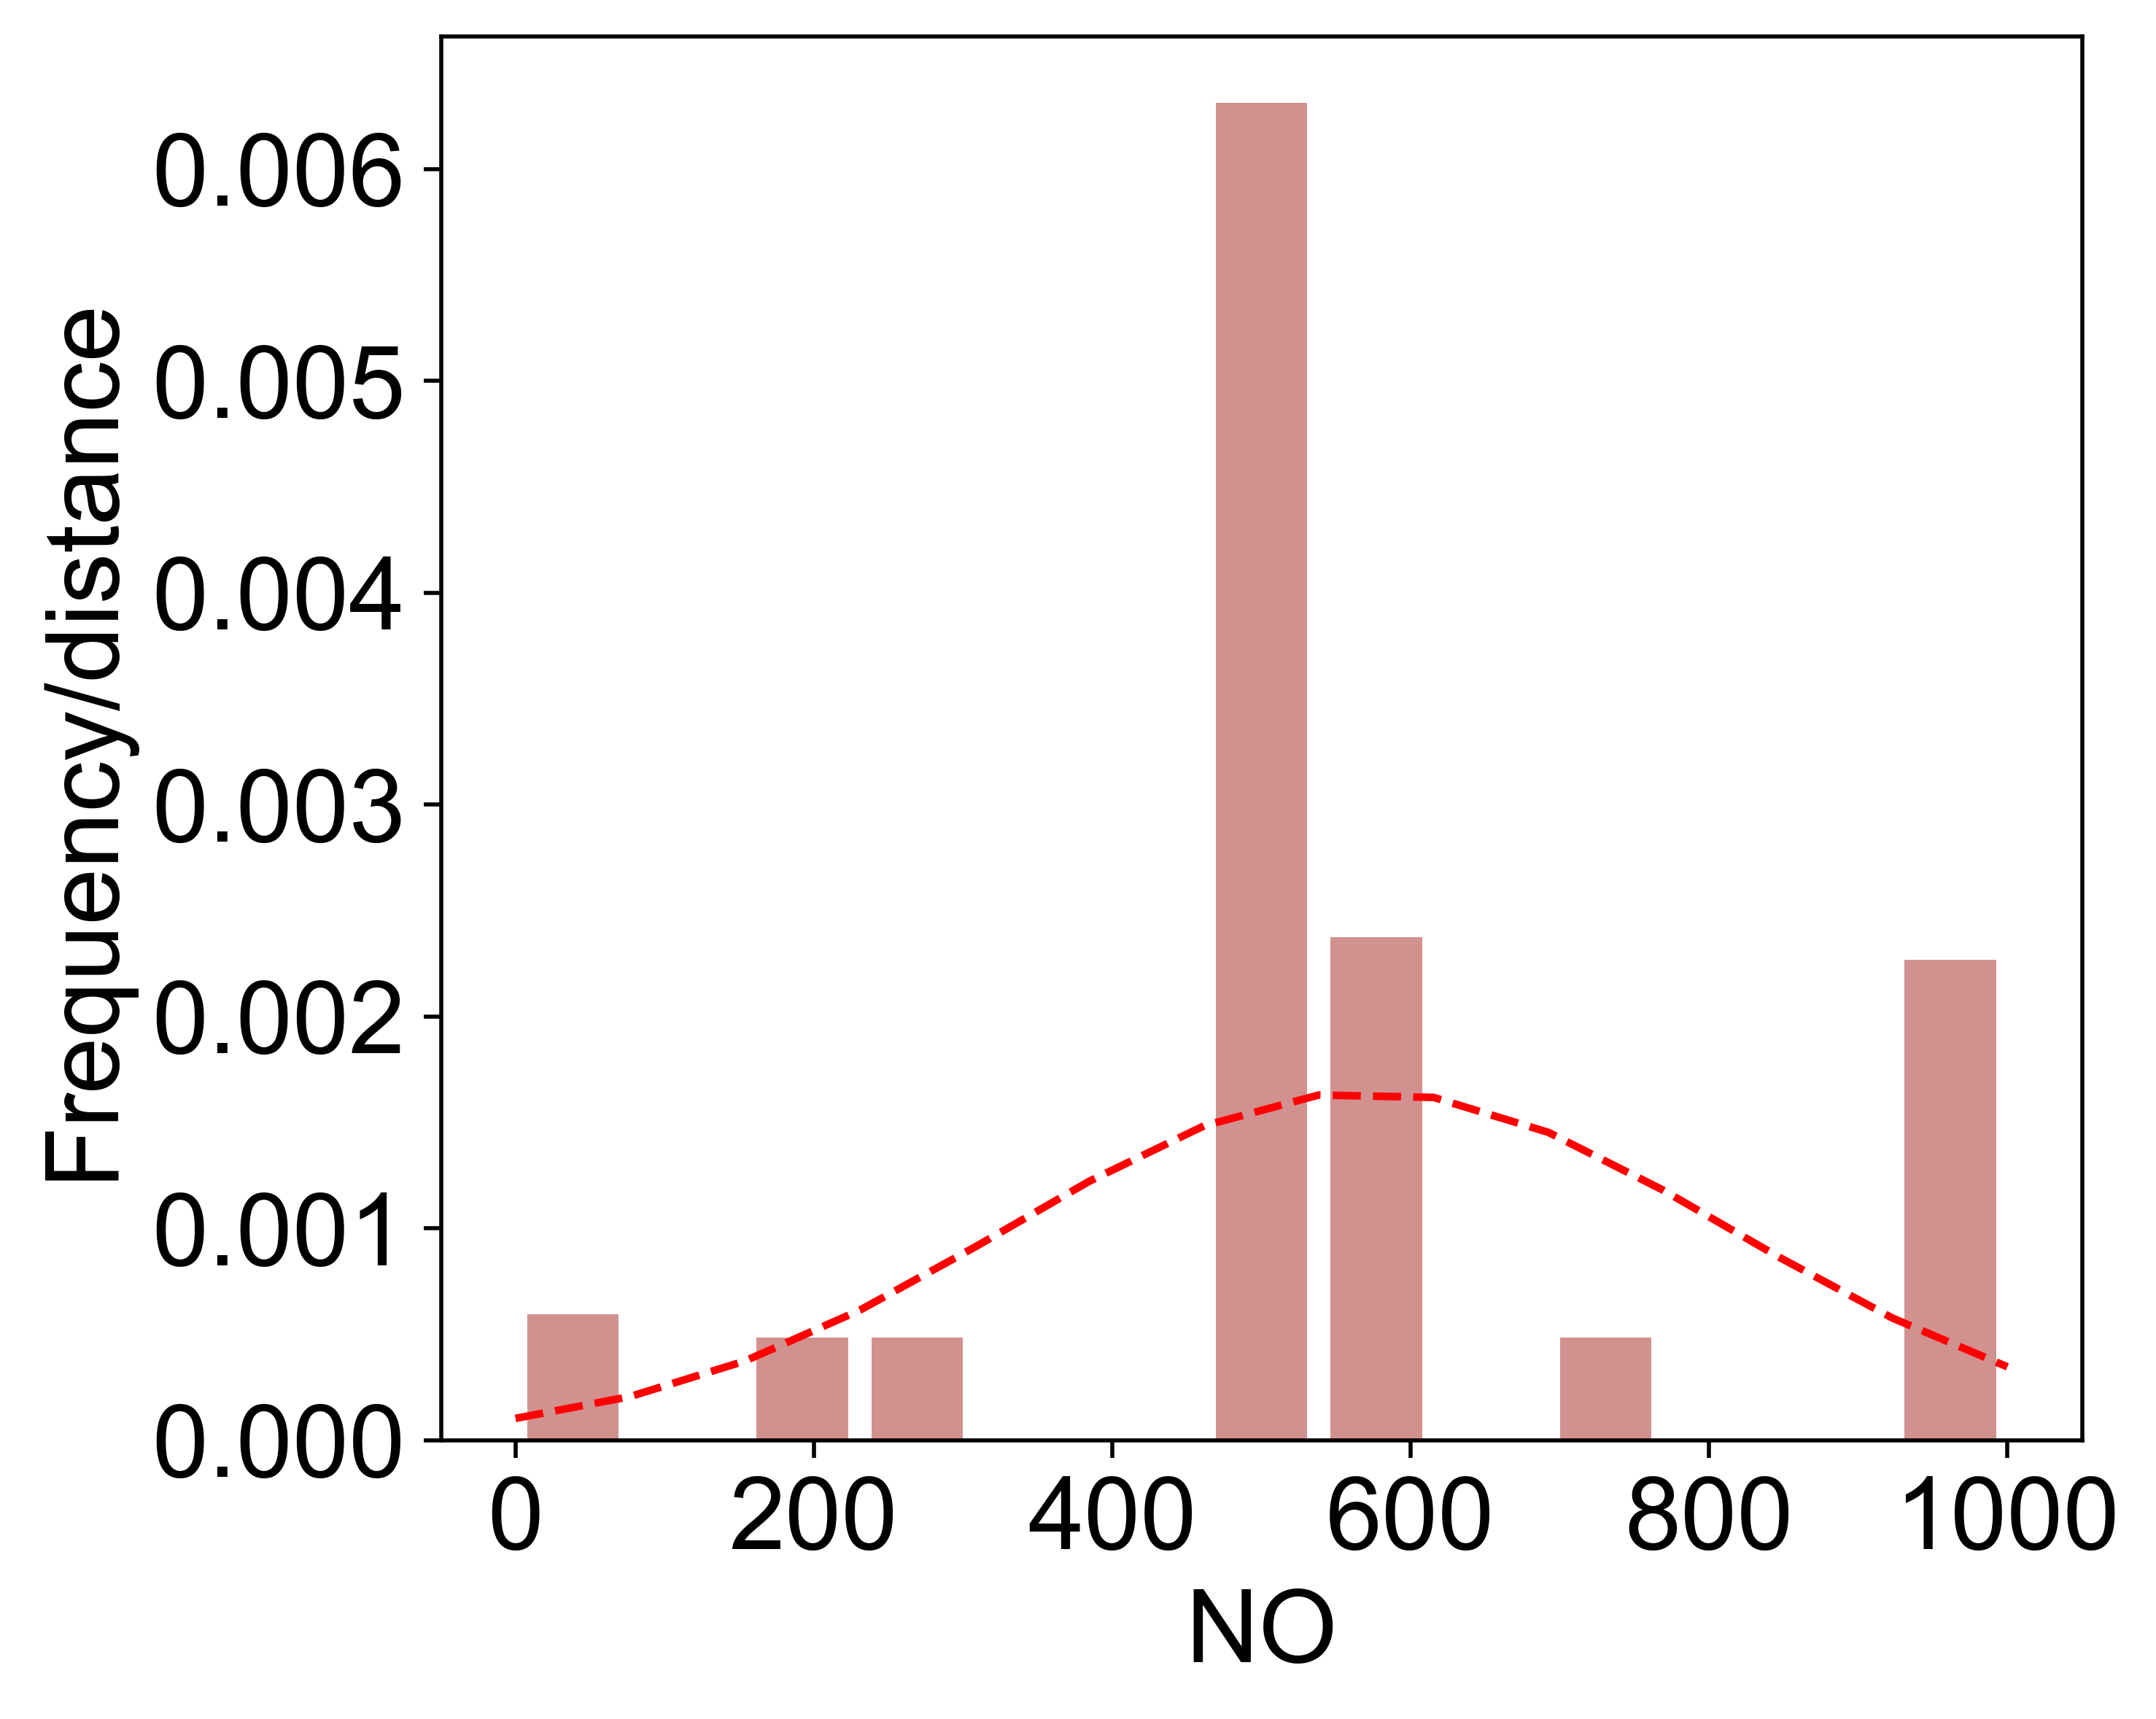

In [49]:
mu = np.mean(df['NO']) #平均值
sigma = np.std(df['NO']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['NO'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("NO",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "NO.png",transparent=False,bbox_inches='tight')

plt.show()

0.0420331950207469 0.021490491426257623


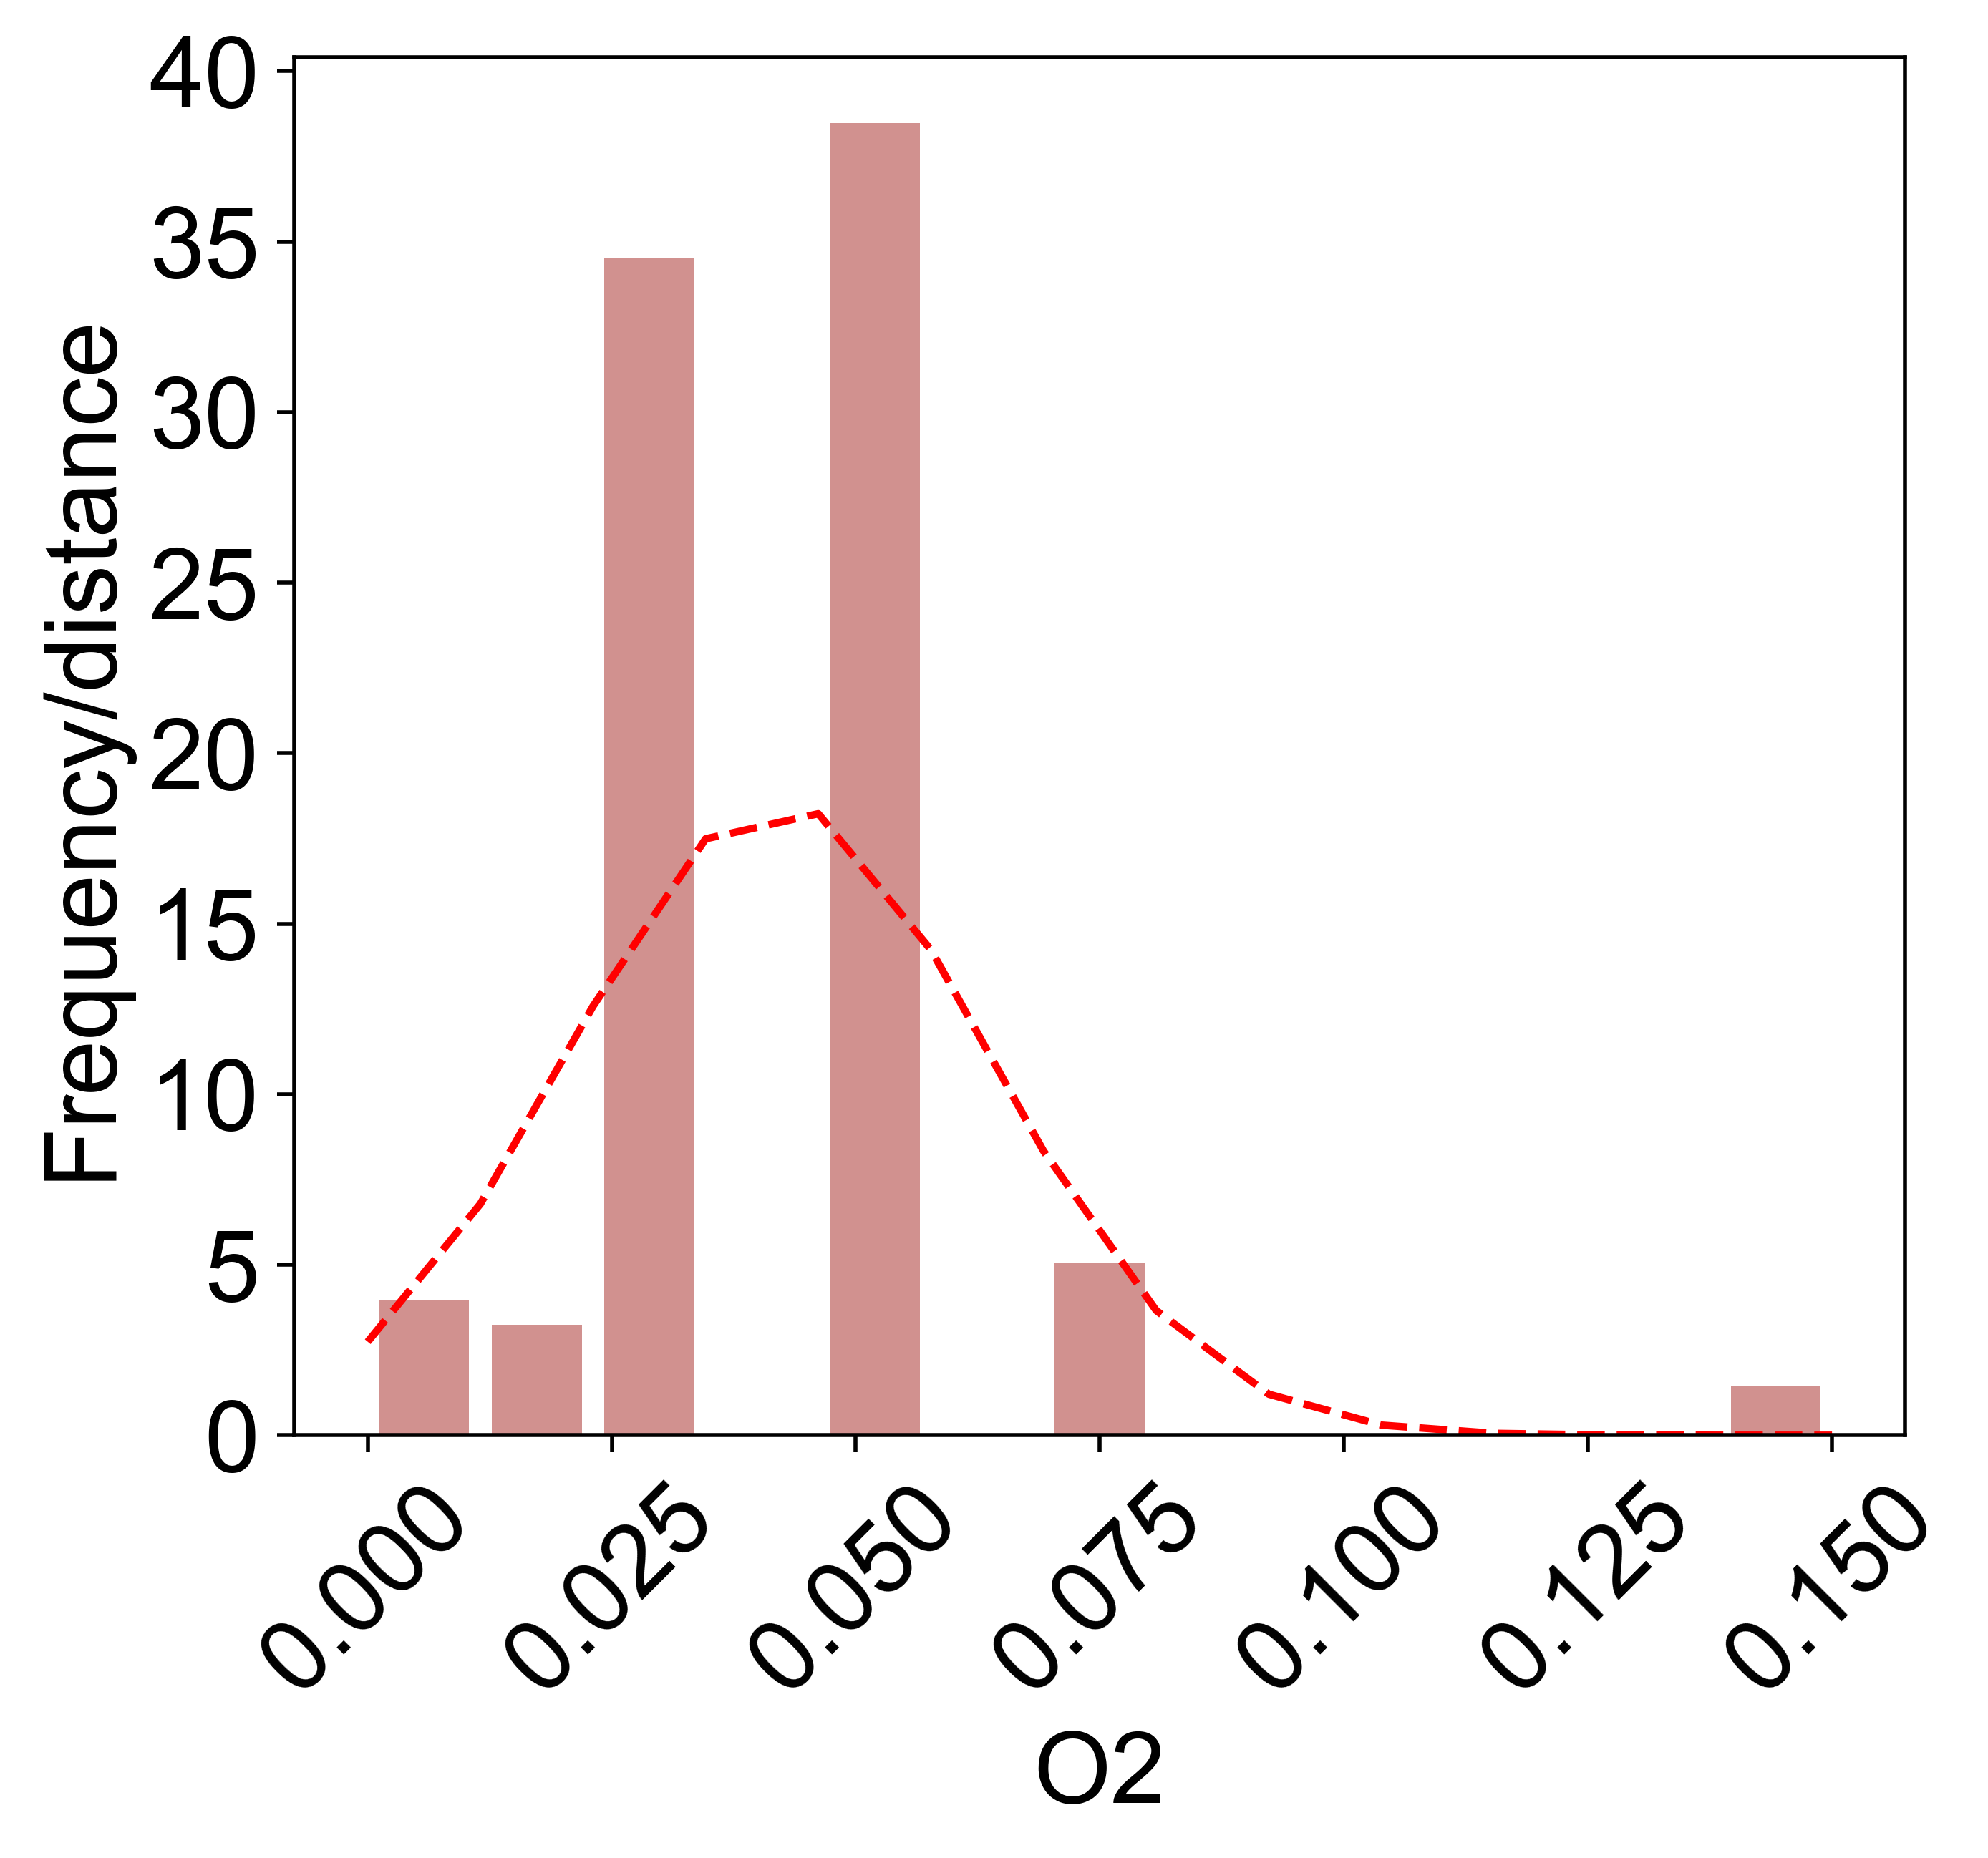

In [53]:
mu = np.mean(df['O2']) #平均值
sigma = np.std(df['O2']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['O2'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("O2",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial', rotation=45)
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "O2.png",transparent=False,bbox_inches='tight')

plt.show()

0.03319502074688797 0.03523718295130825


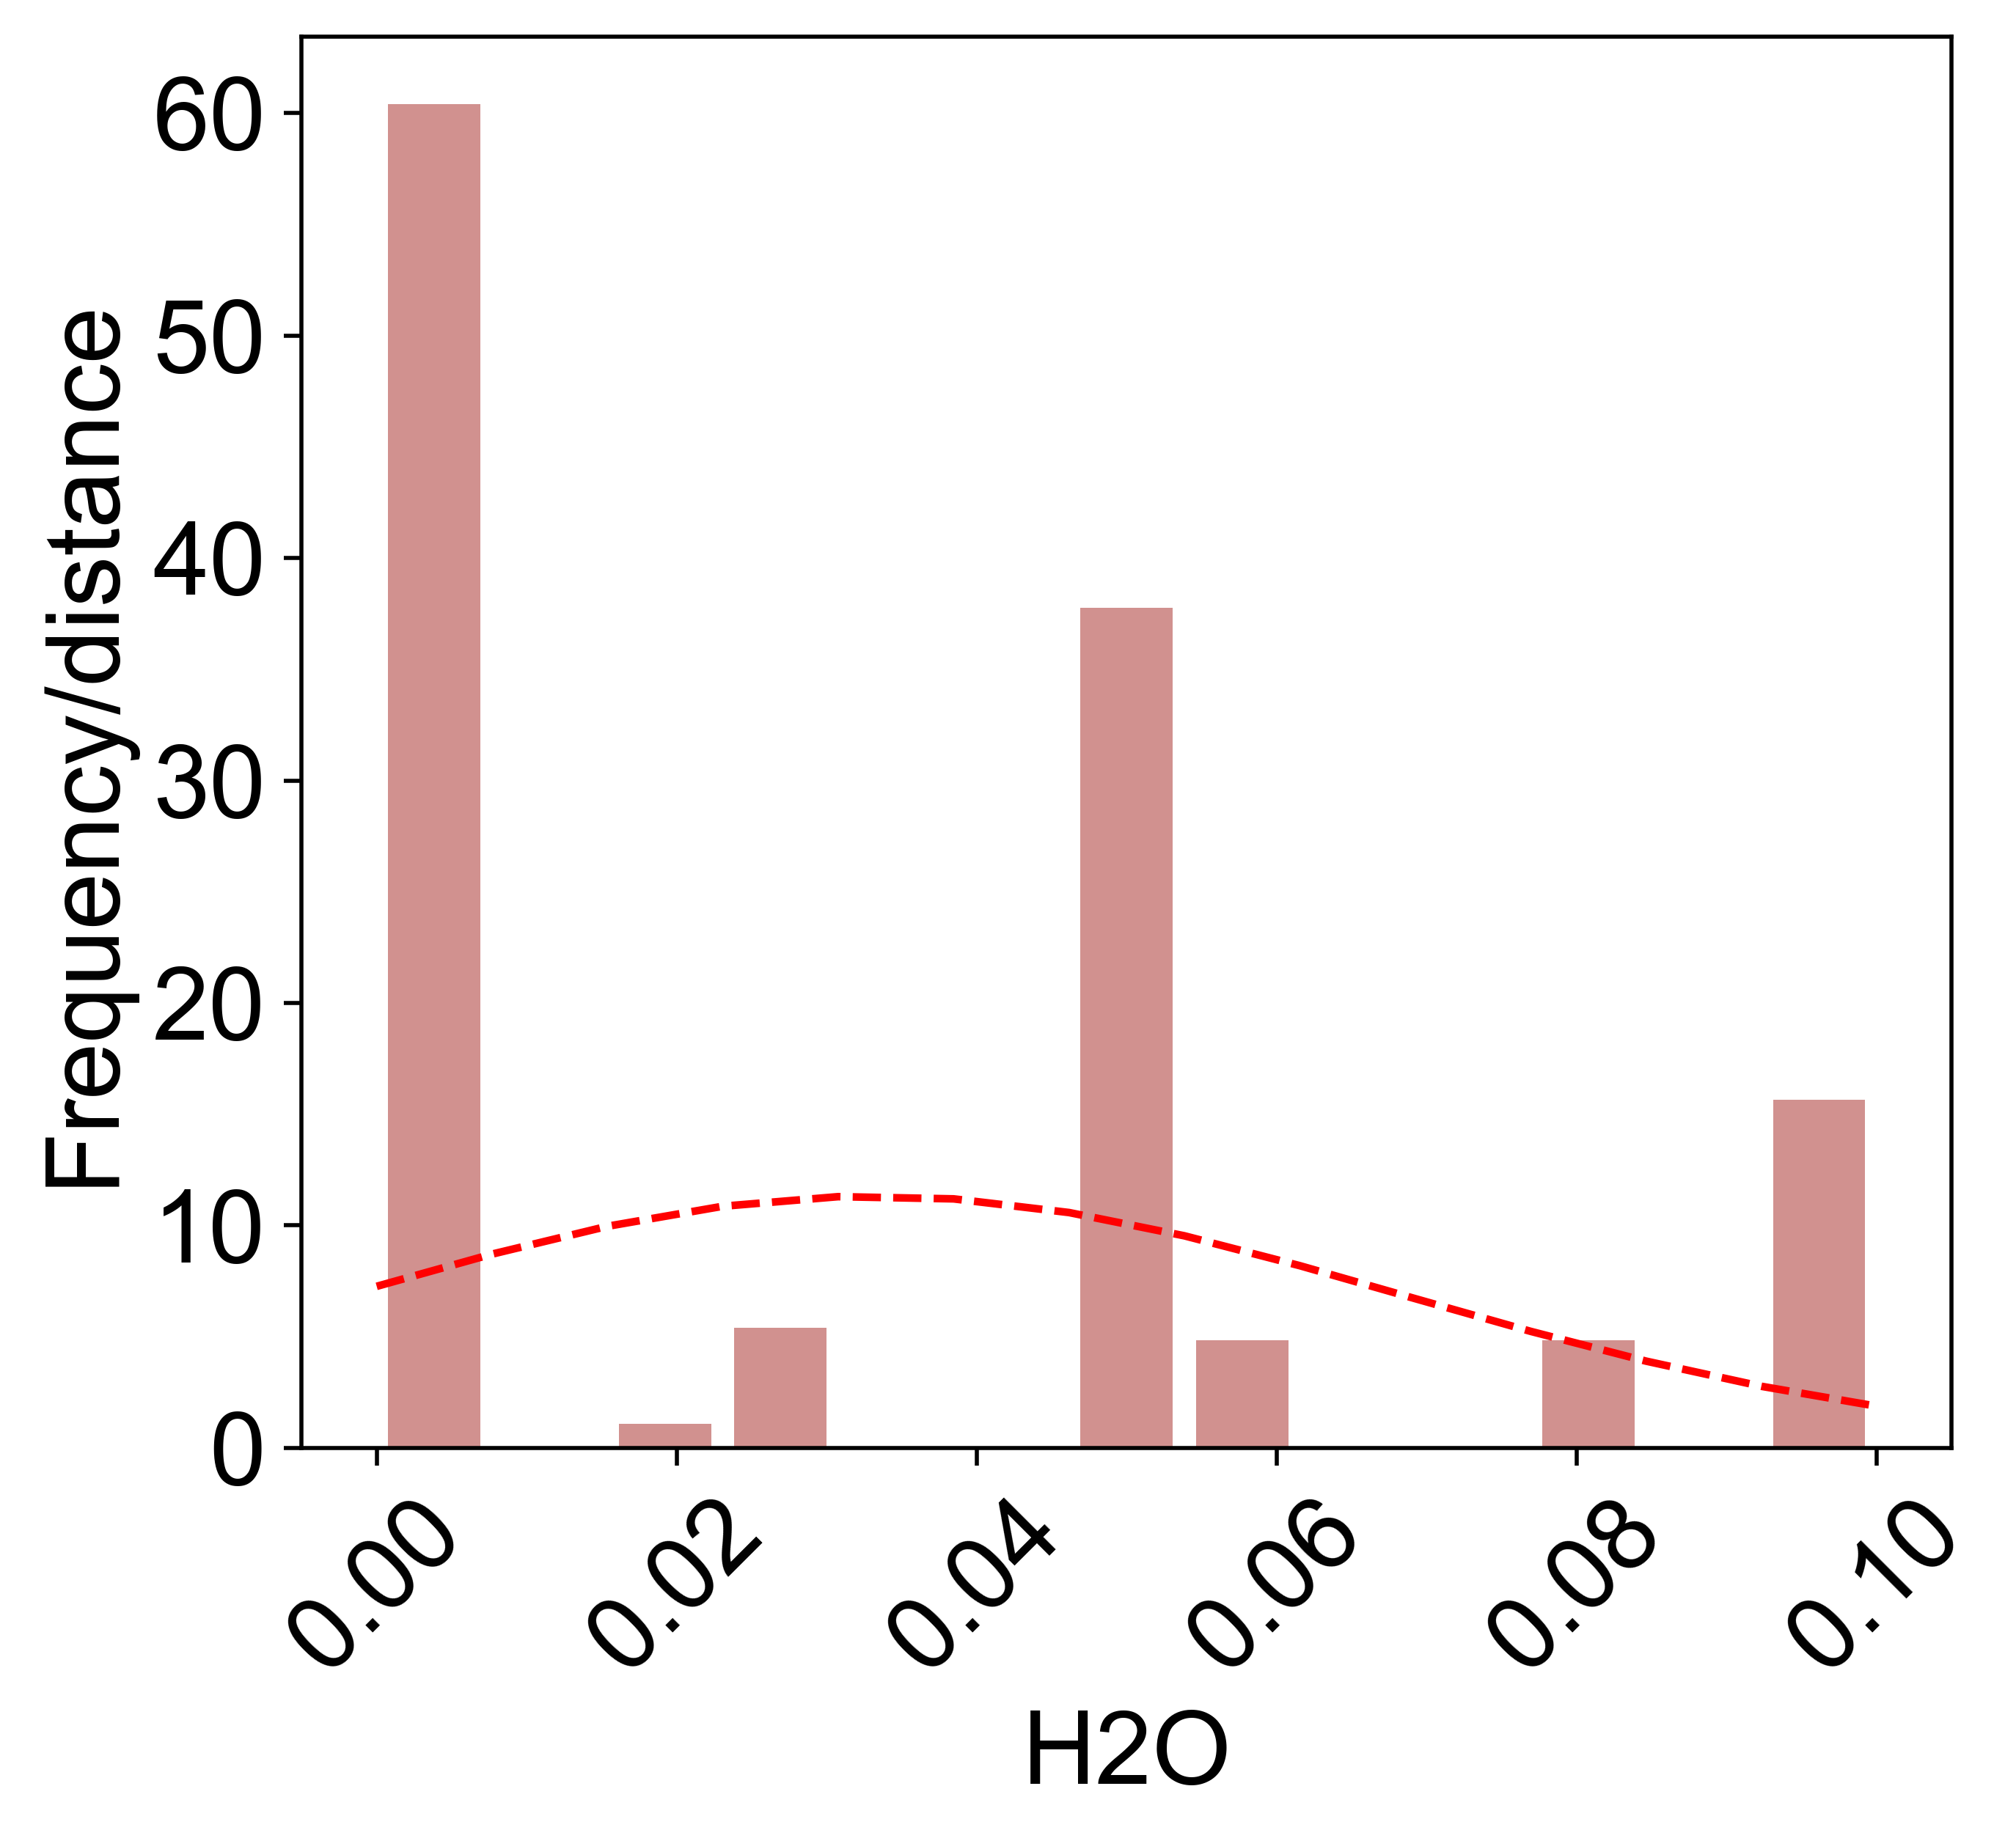

In [54]:
mu = np.mean(df['H2O']) #平均值
sigma = np.std(df['H2O']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['H2O'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("H2O",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial', rotation=45)
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "H2O.png",transparent=False,bbox_inches='tight')

plt.show()

54626.55601659751 50952.82538888238


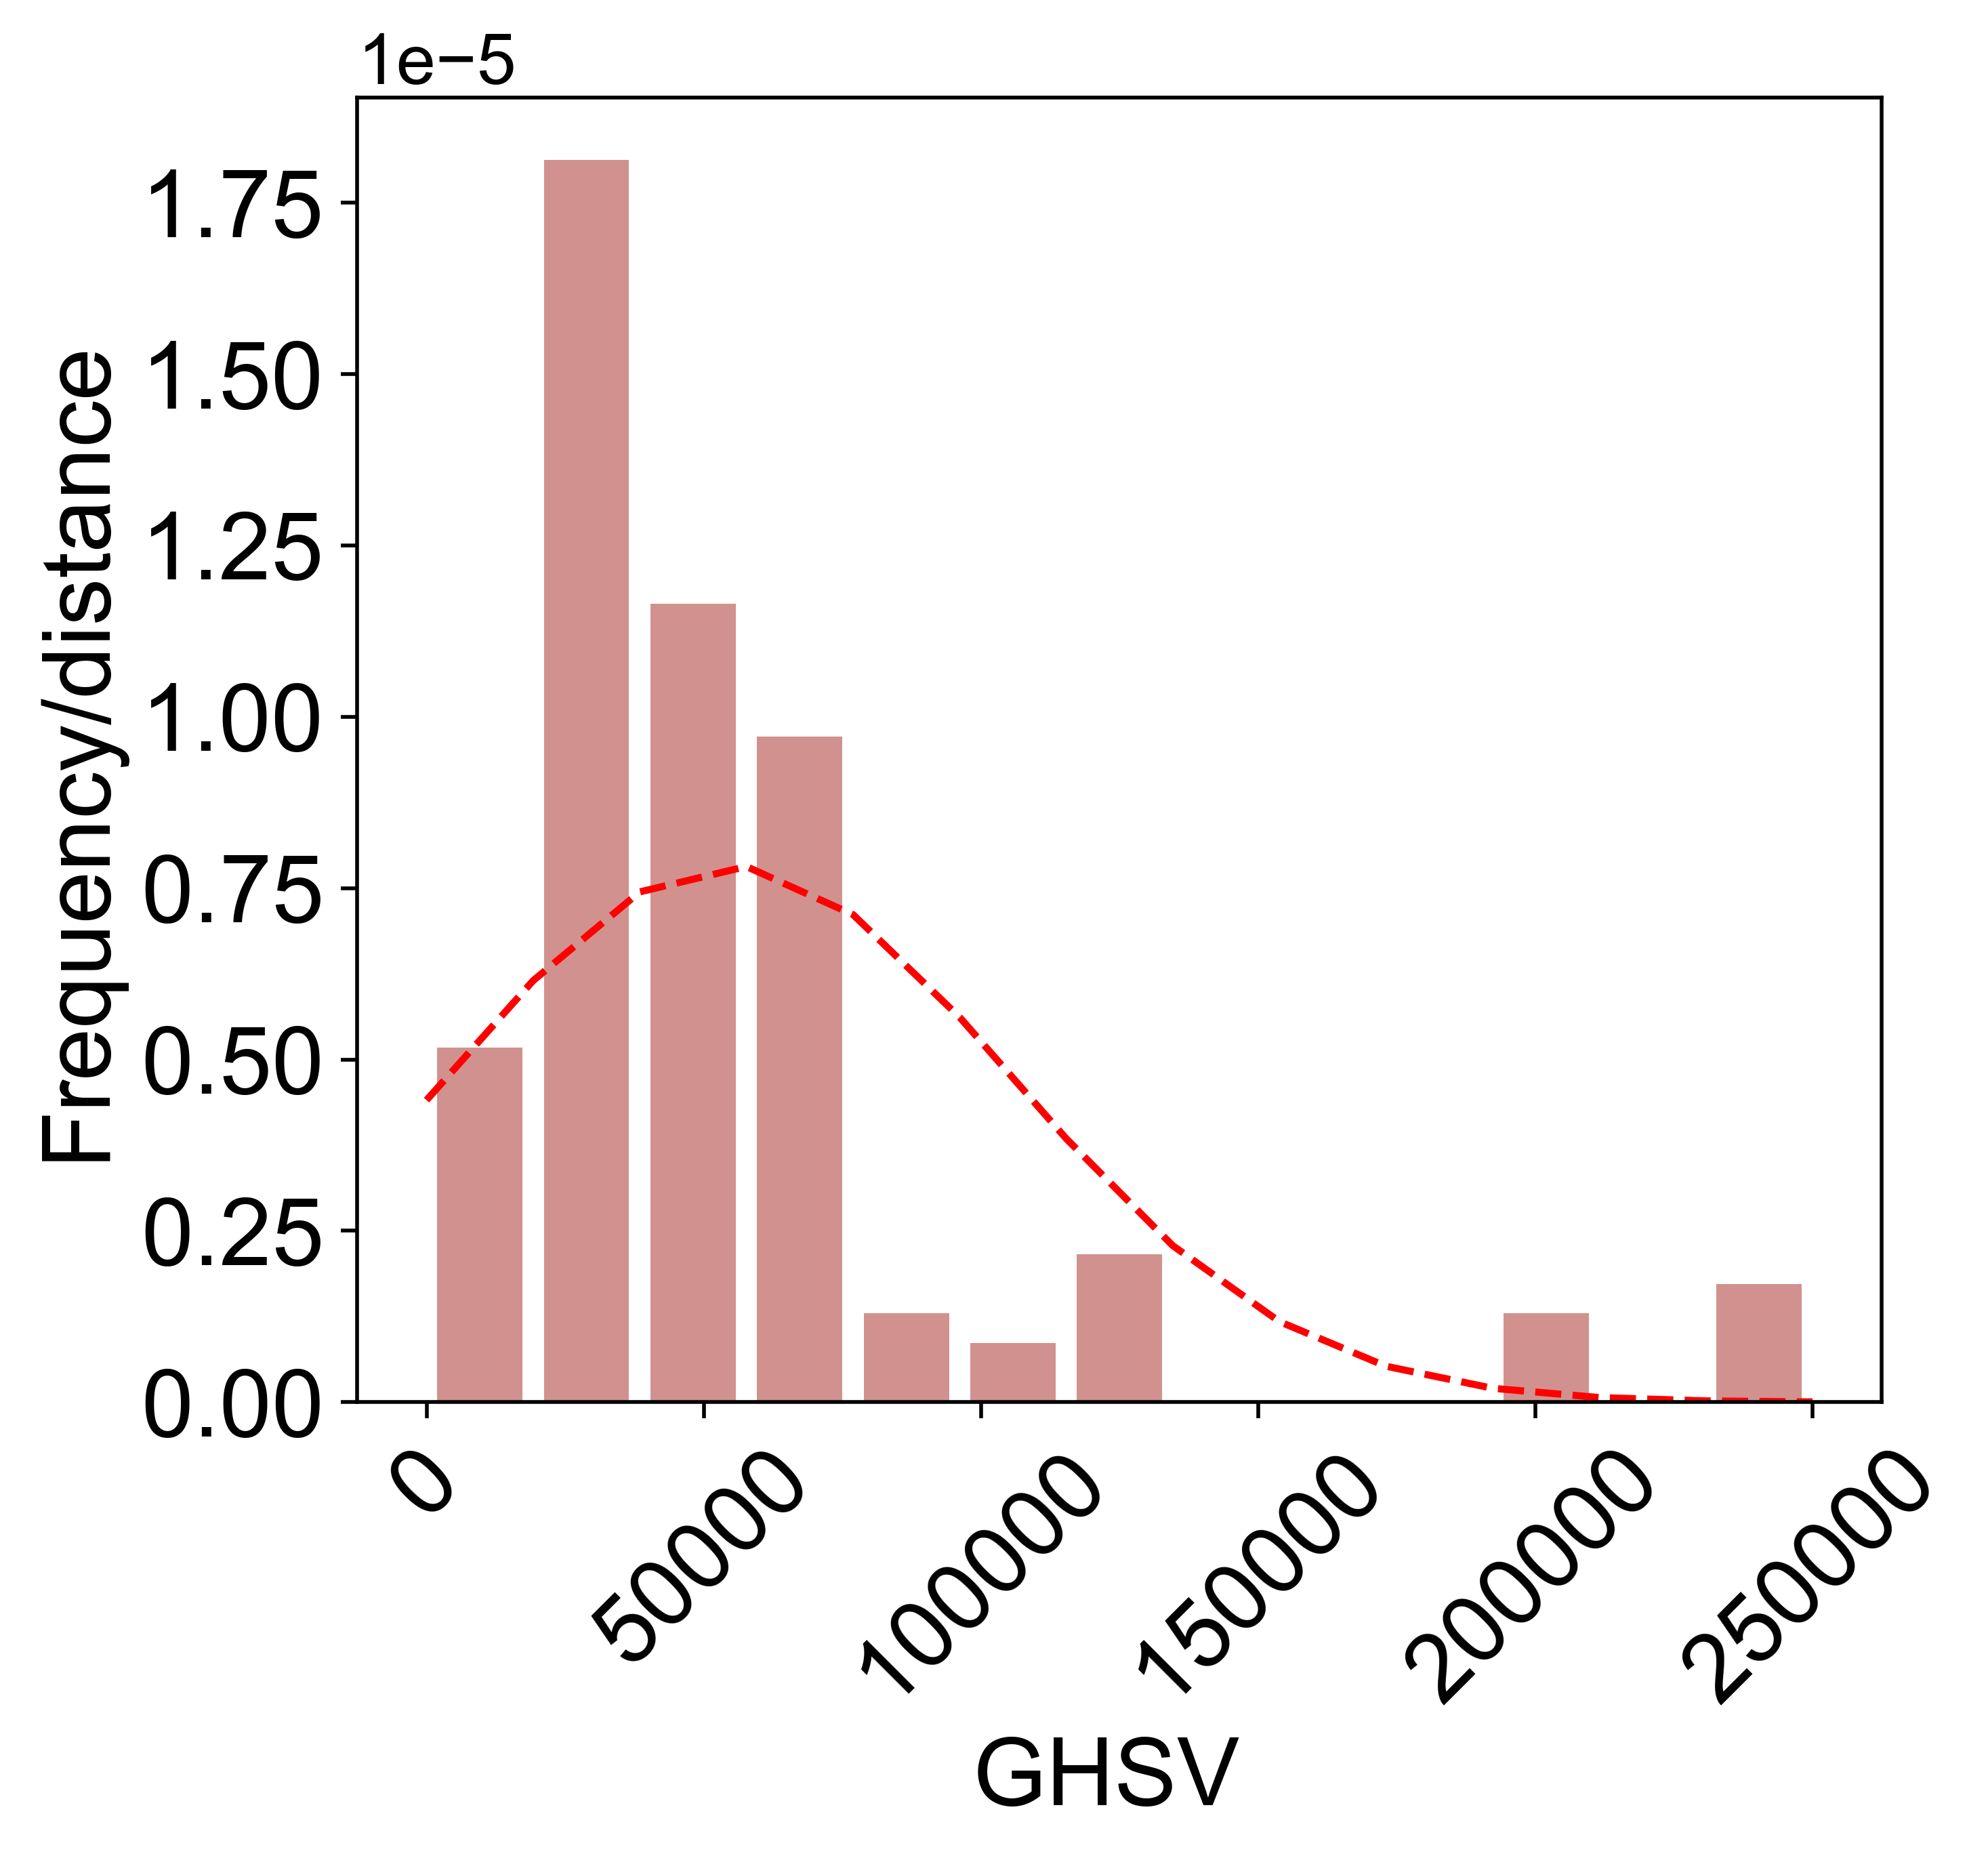

In [55]:
mu = np.mean(df['GHSV ']) #平均值
sigma = np.std(df['GHSV ']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['GHSV '], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("GHSV ",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial', rotation=45)
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "GHSV .png",transparent=False,bbox_inches='tight')

plt.show()

5.4979253112033195 5.4545458458484966


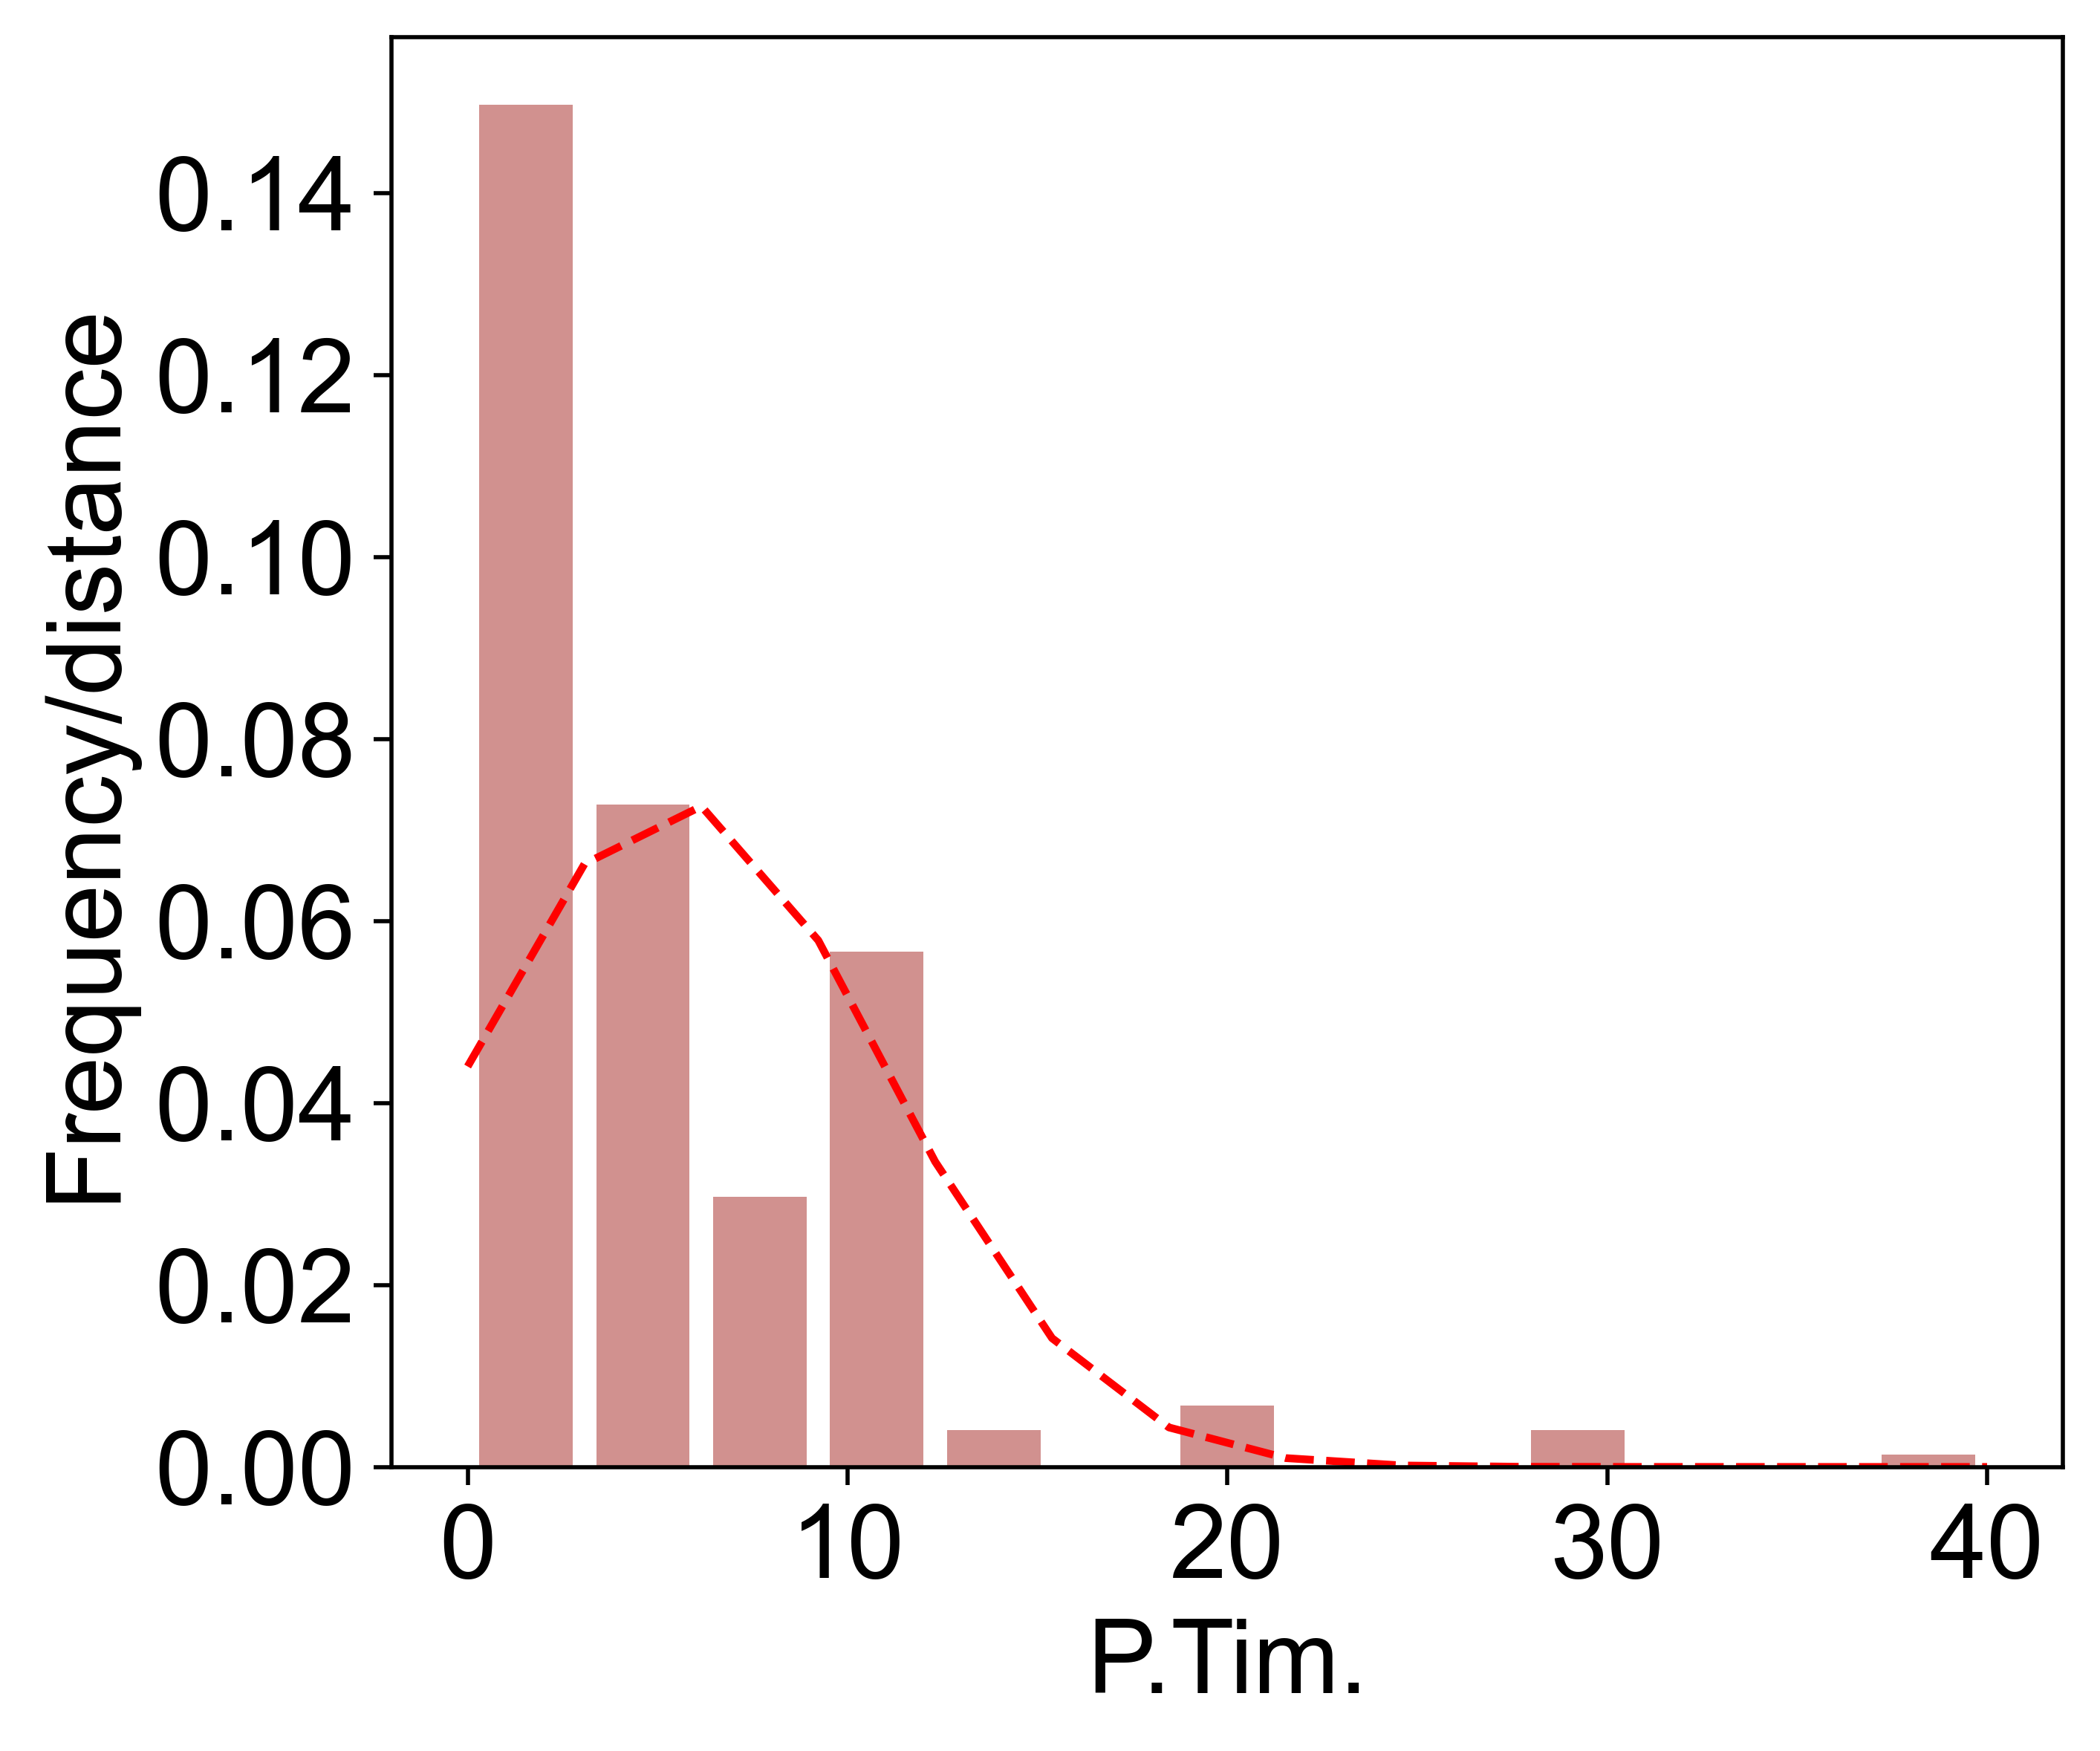

In [57]:
mu = np.mean(df['P.Tim.']) #平均值
sigma = np.std(df['P.Tim.']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['P.Tim.'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("P.Tim.",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "P.Tim..png",transparent=False,bbox_inches='tight')

plt.show()

242.9045643153527 81.32759441924861


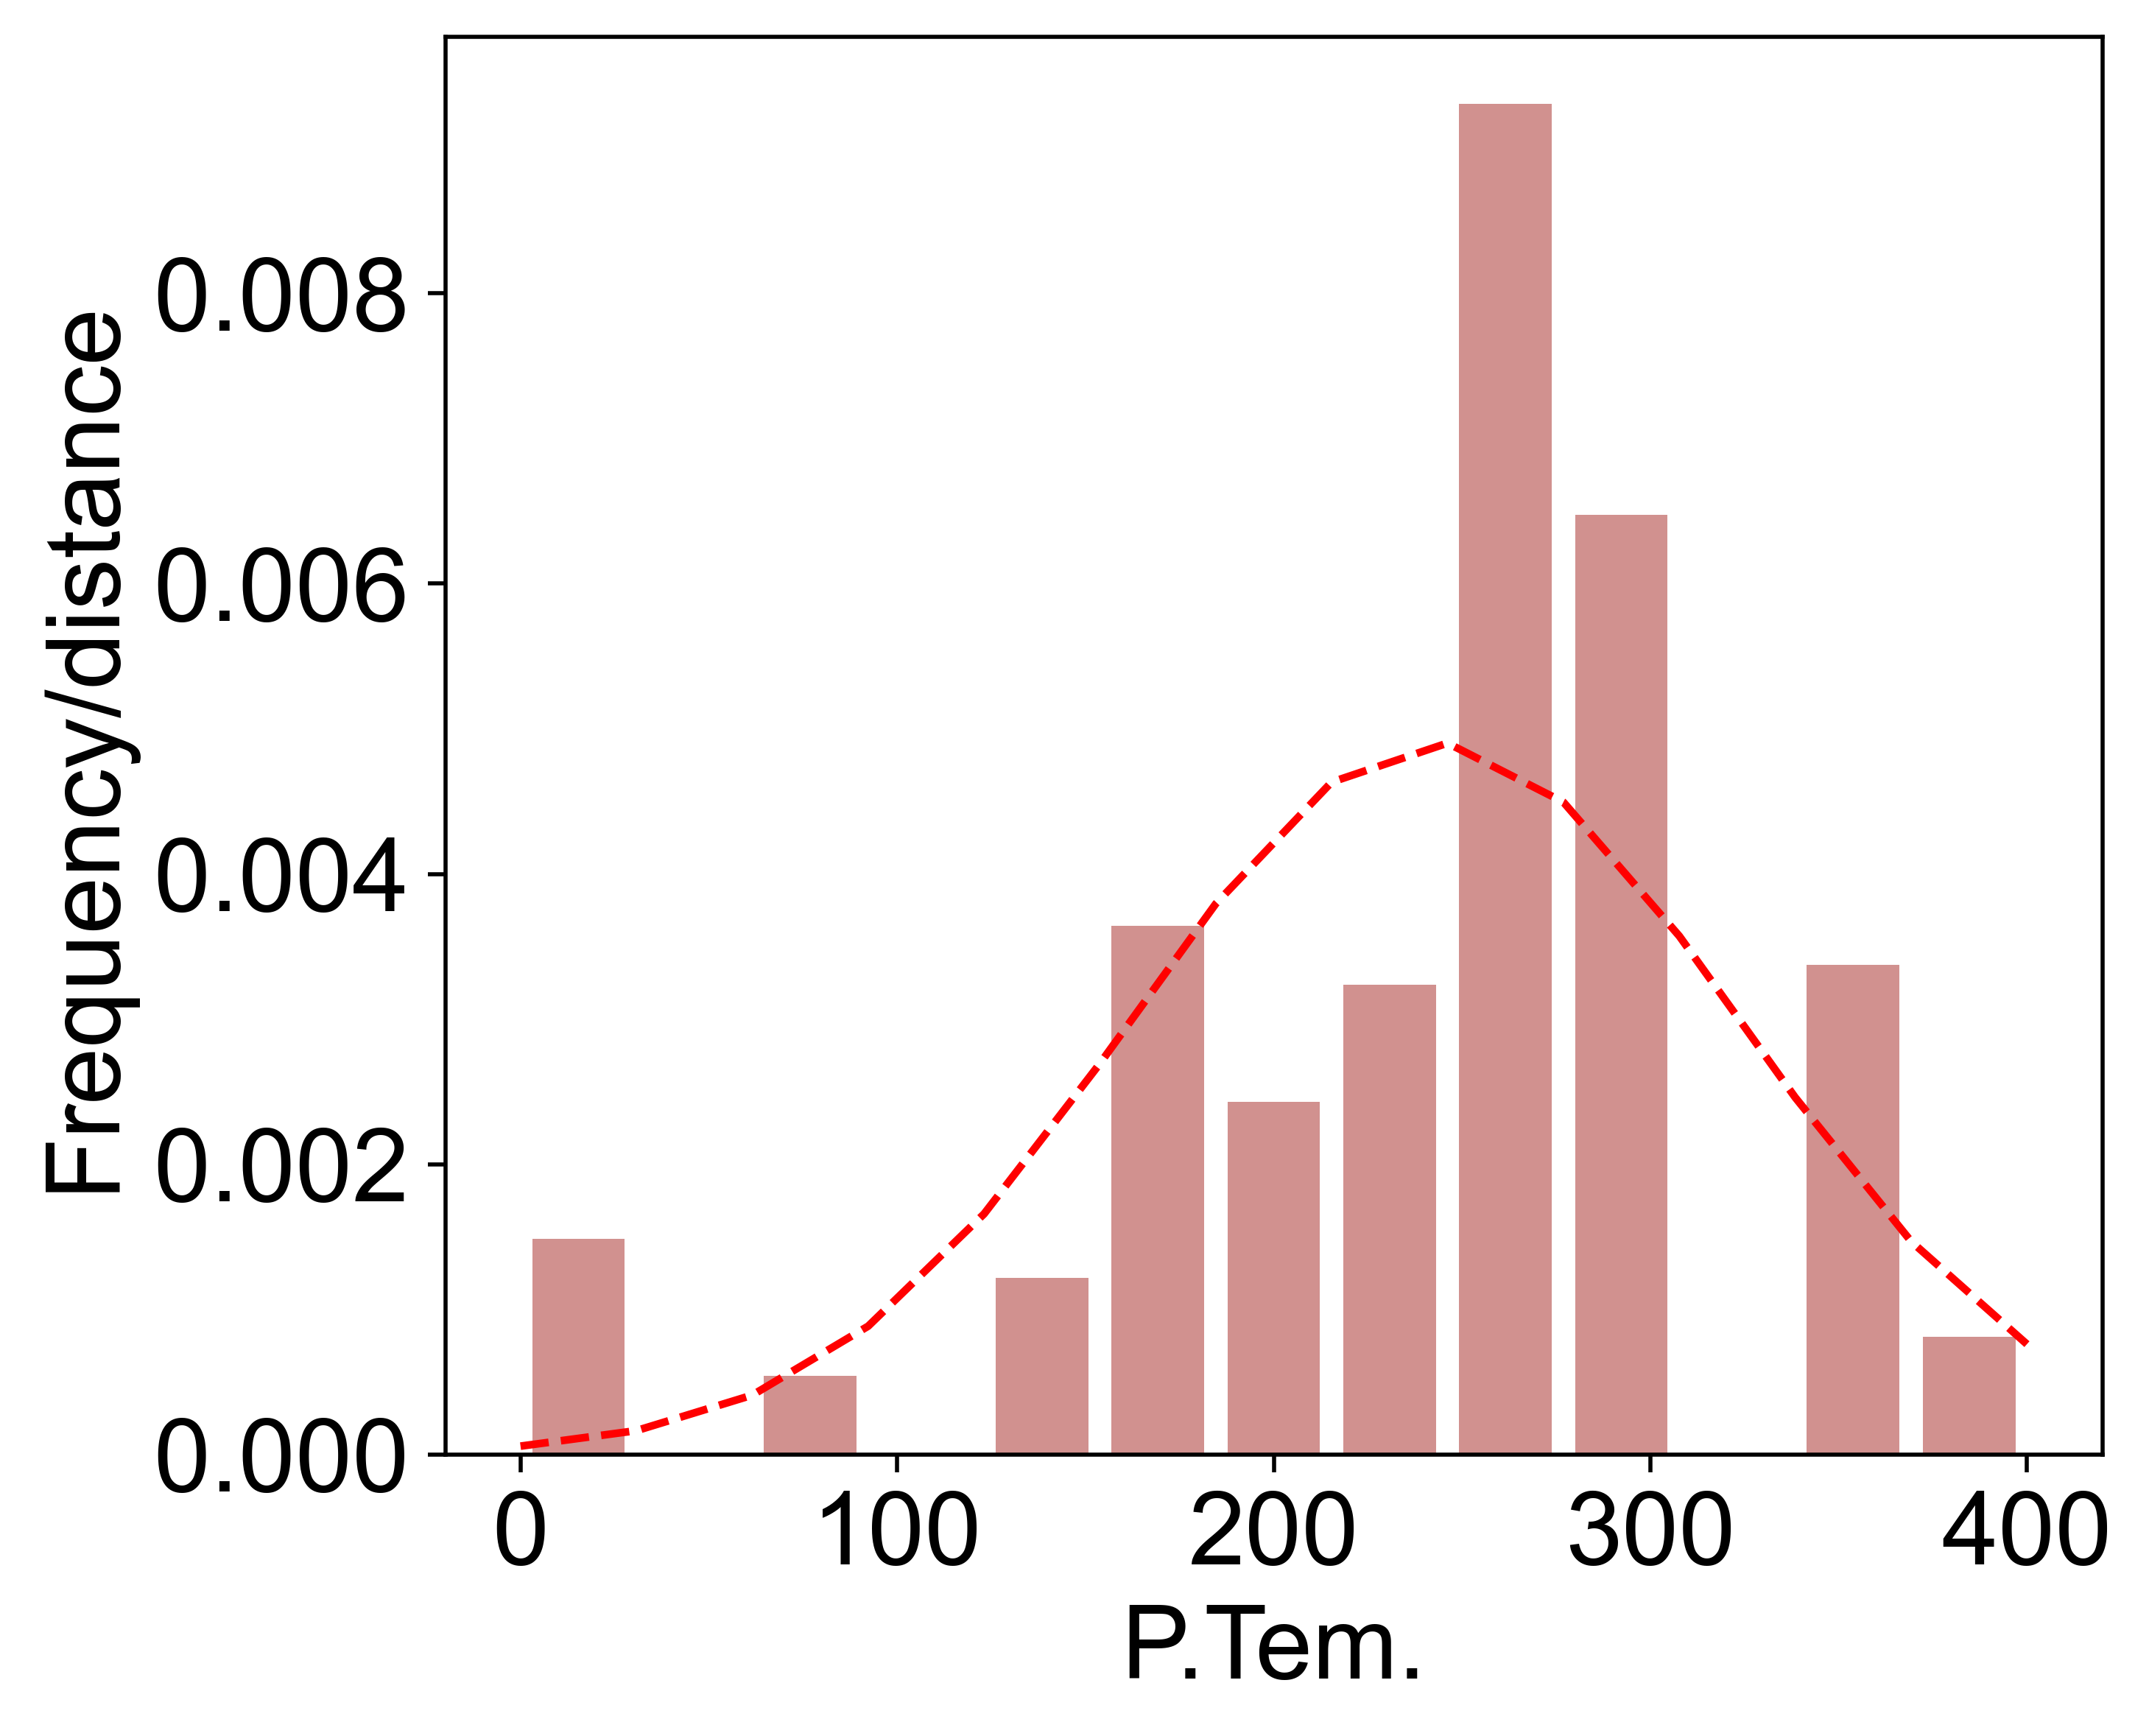

In [58]:
mu = np.mean(df['P.Tem.']) #平均值
sigma = np.std(df['P.Tem.']) #标准差
print(mu, sigma)
plt.figure(dpi=500,figsize=(5,5)) 
num_bins = 13 #直方图柱子的数量
n, bins, pltches = plt.hist(df['P.Tem.'], num_bins,density=1,color='#D1918F',rwidth=0.8,alpha=1)
#直方图函数，x为x轴的值，density=1表示为概率密度，即和为1，绿色放款，色深参数0.5，返回n个概率，直方块左边线的x值，及各个方块对象
y = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel("P.Tem.",fontname='arial',fontsize=20) #绘制x轴
plt.ylabel('Frequency/distance',fontname='arial',fontsize=20) #绘制y轴
#plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$') 中文标题u'xxx'
plt.subplots_adjust(left=0) #左边距
ax = plt.subplot(111) #设置刻度字体大小
plt.xticks(fontsize=20,fontname='arial')
plt.yticks(fontsize=20,fontname='arial') #设置坐标轴标签字体大小
save_path = '机器学习部分'
plt.savefig(save_path + "P.Tem..png",transparent=False,bbox_inches='tight')

plt.show()

In [30]:
#Defining the input features and target variable 

x = df.drop("SO2 tolerance",axis=1)
y = df["SO2 tolerance"]

x

x.shape,y.shape

((230, 19), (230,))

In [31]:
#spliting the dataset into 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)
x_train

electronegativity  ionization energy  ionic radius  melting point  \
27            0.737733           0.947431      0.593172       0.989335   
110           0.939620           0.591143      0.854600       0.823019   
80            0.777100           0.945276      0.670626       0.995074   
127           0.692246           0.943642      0.549806       0.982988   
57            0.750180           0.945163      0.640103       0.991600   
..                 ...                ...           ...            ...   
218           0.980397           0.000000      0.921379       0.736104   
133           0.800028           0.938647      0.687802       0.997091   
105           0.939620           0.591143      0.854600       0.823019   
84            0.789245           0.969523      0.511660       0.970316   
195           0.749591           0.947698      0.588803       0.997046   

     thermal conductivity   density  calcine temperature  calcine time  \
27               0.989775  0.997458             0.666667          0.75   
110              0.987376  0.885211             0.666667          1.00   
80               0.974589  0.996285             0.666667          0.75   
127              0.968733  0.993261             0.666667          0.25   
57               0.970940  0.993261             0.666667          0.75   
..                    ...       ...                  ...           ...   
218              0.999491  0.747558             0.666667          1.00   
133              0.983994  0.999899             0.666667          0.25   
105              0.987376  0.885211             0.666667          1.00   
84               0.990402  0.978794             0.666667          0.50   
195              0.985191  0.998855             0.000000          0.50   

     surface area  pore volume  pore diameter       SO2      NH3      NO  \
27       0.561994     0.755172       0.362712  1.000000  1.00000  1.0000   
110      0.337267     0.120690       0.051150  0.052632  0.50000  0.5000   
80       0.246104     0.448276       0.123625  0.026316  0.05625  0.0625   
127      0.167662     0.344828       0.364848  0.473684  1.00000  1.0000   
57       0.052472     0.172414       0.654698  0.052632  0.37500  0.3750   
..            ...          ...            ...       ...      ...     ...   
218      0.459878     0.586207       0.346051  0.157895  0.37500  0.3750   
133      0.199463     0.448276       0.364848  0.473684  1.00000  1.0000   
105      0.376135     0.120690       0.043236  0.052632  0.50000  0.5000   
84       0.184976     0.155172       0.166944  0.052632  0.37500  0.3750   
195      0.769902     0.293103       0.086138  0.052632  0.37500  0.3750   

           O2  H2O  GHSV h-1  poison time  poison temperature  
27   0.230769  0.0     0.384     0.139241            0.843750  
110  0.076923  0.5     0.160     0.493671            0.531250  
80   1.000000  0.6     0.120     0.746835            0.437500  
127  0.076923  0.0     0.240     0.113924            0.531250  
57   0.230769  0.5     0.240     0.037975            1.000000  
..        ...  ...       ...          ...                 ...  
218  0.230769  0.0     0.120     0.037975            0.296875  
133  0.076923  0.0     0.240     0.113924            0.531250  
105  0.076923  0.5     0.160     0.113924            0.531250  
84   0.076923  0.0     0.240     0.037975            0.687500  
195  0.230769  0.0     0.040     0.164557            0.687500  

[184 rows x 19 columns]

In [32]:
plt.rcParams['font.weight']='bold'
plt.rcParams.keys()


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, mean_squared_error, r2_score)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# ==================== 参数配置 ====================
input_path = "归一化数据.xlsx"  # 输入数据路径
output_dir = "xgboost_model_ncv"     # 输出目录
target_column = "SO2 tolerance"     # 目标变量列名
outer_test_size = 0.2               # 外层测试集比例
inner_test_size=0.2                 # 内层测试集比例   
random_state = 42                   # 随机种子
n_splits = 5                        # 交叉验证折数
model_path = os.path.join(output_dir, "xgboost_model.pkl")  # 模型保存路径

# ==================== 函数定义 ====================
def prepare_data(input_path, target_column):
    """数据加载与预处理"""
    df = pd.read_excel(input_path)
    if target_column not in df.columns:
        raise ValueError(f"目标列 {target_column} 不存在于数据中")
    
    y = df[target_column]
    X = df.drop(columns=[target_column])
    numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
    return X[numeric_cols], y

def determine_problem_type(y):
    """自动判断问题类型"""
    if y.nunique() <= 10:  # 分类问题（类别数≤10）
        return ('binary:logistic' if y.nunique() == 2 else 'multi:softprob', 
                "classification")
    return ('reg:squarederror', "regression")

def get_model_params(objective, random_state):
    """获取模型参数"""
    return {
        'objective': objective,
        'eval_metric': 'logloss' if objective.startswith('binary') else 'rmse',
        'eta': 0.1,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'seed': random_state,
        'n_jobs': -1
    }

def train_and_evaluate(X_train, y_train, X_test, y_test, params, problem_type):
    """训练模型并返回评估结果"""
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=1000,
        evals=[(dtrain, 'train'), (dtest, 'test')],
        early_stopping_rounds=50,
        verbose_eval=False
    )
    
    # 评估模型
    ddata_train = xgb.DMatrix(X_train)
    ddata_test = xgb.DMatrix(X_test)
    
    if problem_type == "classification":
        y_pred_train =np.round(model.predict(ddata_train)) if params['objective'] == 'binary:logistic' else np.argmax(model.predict(ddata_train), axis=1)
        y_pred_test =np.round(model.predict(ddata_test)) if params['objective'] == 'binary:logistic' else np.argmax(model.predict(ddata_test), axis=1)
        metrics = {
            'Train Accuracy': accuracy_score(y_train, y_pred_train),
            'Test Accuracy': accuracy_score(y_test, y_pred_test),
            'Train F1': f1_score(y_train, y_pred_train, average='macro'),
            'Test F1': f1_score(y_test, y_pred_test, average='macro')
        }
    else:
        y_pred_train = model.predict(ddata_train)
        y_pred_test = model.predict(ddata_test)
        metrics = {
            'Train R2': r2_score(y_train, y_pred_train),
            'Test R2': r2_score(y_test, y_pred_test),
            'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
            'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test))
        }
    return model, metrics
def plot_feature_importance(model, output_dir):
    """
    绘制特征重要性图（使用自定义颜色方案）
    
    参数:
        model: 训练好的XGBoost模型
        output_dir: 输出目录
    """
    # 自定义颜色方案（根据用户提供的颜色）
    custom_colors = {
        'EN.': '#82bbf0', 
        'P.Tim. ':'#dff1ff', 
        'S.A.': '#FDB3CC', 
        'GHSV': '#ff78A8', 
        'I.R.': '#82bbf0', 
        'I.E.': '#82bbf0', 
        'P.D.': '#FDB3CC',
        'H2O': '#ff78A8', 
        'P.TEM.': '#dff1ff', 
        'M.P.': '#82bbf0', 
        'T.C.': '#82bbf0', 
        'P.V.': '#FDB3CC', 
        'C.Tem.': '#FDB3CC',
        'Density': '#82bbf0',
        'NH3': '#ff78A8', 
        'SO2': '#dff1ff', 
        'C.Tim.': '#FDB3CC', 
        'O2': '#ff78A8', 
        'NO': '#ff78A8'
    }
    
    # 设置全局字体样式
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.weight'] = 'bold'
    
    # 设置图形大小和边缘距离
    fig, ax = plt.subplots(figsize=(14, 10), facecolor='none')
    plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.1)
    ax.grid(False)
    ax.set_facecolor('white')  
    
    # 获取特征重要性数据
    importance = model.get_score(importance_type='weight')
    importance = sorted(importance.items(), key=lambda x: x[1], reverse=False)
    feature_names = [x[0] for x in importance]
    feature_imp = [x[1] for x in importance]
    
    # 为每个特征分配颜色（如果特征未在自定义颜色中定义，使用默认颜色）
    colors = [custom_colors.get(feature, '#1f77b4') for feature in feature_names]
    
    # 绘制水平条形图
    bars = ax.barh(
        range(len(feature_names)), 
        feature_imp, 
        height=0.8,  # 调整柱形宽度
        color=colors,  # 使用自定义颜色
    )
    
    # 设置y轴刻度
    ax.set_yticks(range(len(feature_names)))
    ax.set_yticklabels(feature_names)
    
    # 设置x轴标签
    plt.xlabel(
        "Importance",
        fontdict={
            'fontname': 'Arial',
            'fontsize': 24,
            'fontweight': 'bold'
        },
        labelpad=10  # 标签与轴的距离
    )
    
    # 设置y轴标签
    plt.ylabel(
        ' ',
        fontdict={
            'fontname': 'Arial',
            'fontsize': 20,
            'fontweight': 'bold'
        },
        labelpad=10  # 标签与轴的距离
    )
    
    # 设置坐标轴刻度字体
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontname('Arial')
        label.set_fontsize(20)
    
    # 保留所有边框并设置样式
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2.5)  # 加粗边框线
        spine.set_color('black')  # 设置边框颜色
    
    # 添加数值标签
    for bar in bars:
        width = bar.get_width()
        ax.text(
            width + max(feature_imp)*0.01,  # 位置微调
            bar.get_y() + bar.get_height()/2,
            f'{width:.1f}',
            ha='left',
            va='center',
            fontname='Arial',
            fontsize=18,
            color='black'  # 确保文字颜色清晰可见
        )
    
    # 保存图像
    plt.savefig(
        os.path.join(output_dir, "feature_importance.png"), 
        dpi=300, 
        bbox_inches='tight',
        transparent=False
    )
    plt.close()
    
def plot_actual_vs_predicted(X_train, y_train, X_test, y_test, model, output_dir):
    """绘制实际值 vs 预测值图（回归问题）"""
    # 设置全局字体样式
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.weight'] = 'bold'
    
    d_train = xgb.DMatrix(X_train)
    pp_tr = model.predict(d_train)
    d_test = xgb.DMatrix(X_test)
    y_predicted = model.predict(d_test)
    
    plt.figure(figsize=(1.96, 1.57))
    g = sns.JointGrid(x=y_test, y=y_predicted, height=1.57, space=0)

   
    g.set_axis_labels("Actual value", "Predicted value", fontsize =10, fontname = 'Arial')
    sns.scatterplot(x=y_train, y=pp_tr, s=100, color='#DB7987', ax=g.ax_joint, label='Training')
    sns.scatterplot(x=y_test, y=y_predicted, s=100, color='#82BBF0', ax=g.ax_joint, label='Testing')
    sns.regplot(x=y_test, y=y_predicted, ax=g.ax_joint, scatter=False, color='gray')
       
    # 调整坐标轴刻度标签样式
    for ax in [g.ax_joint, g.ax_marg_x, g.ax_marg_y]:
        ax.tick_params(
            axis='both', 
            which='major', 
            labelsize=8,      # 刻度标签大小
            colors='black',   # 刻度标签颜色
            width=1,
            length=3
        )
    # 设置图例样式
    g.ax_joint.legend(
        title_fontsize=28,      # 标题字体大小
        fontsize=28,           # 项目字体大小
        frameon=False,          # 显示边框
        framealpha=1,        # 边框透明度
        edgecolor='white',   # 边框颜色
        facecolor='white'      # 背景颜色
        
    )
     # 主图边框（闭合，线宽3）
    for spine in g.ax_joint.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor('#333333')
        spine.set_linewidth(1)
    
    # 计算实际值和预测值的全局范围
    all_values = np.concatenate([y_train, y_test, pp_tr, y_predicted])
    min_val = np.min(all_values)
    max_val = np.max(all_values)
    buffer = (max_val - min_val) * 0.15  # 增加缓冲区，确保边缘数据有足够空间
    
    # 设置主图坐标范围
    g.ax_joint.set_xlim(min_val - buffer, max_val + buffer)
    g.ax_joint.set_ylim(min_val - buffer, max_val + buffer)
    
    # 绘制理想预测线
    g.ax_joint.plot([min_val, max_val], [min_val, max_val], '--', color='gray', alpha=0.5)
    
    # 优化边缘分布的面积图
    # X轴面积图 - 使用更合适的带宽和范围
    sns.kdeplot(
        x=y_train, ax=g.ax_marg_x, color='#DB7987', alpha=0.5,
        fill=True, linewidth=0, label='Training', bw_adjust=1.5,
        clip=(min_val - buffer, max_val + buffer)
    )
    sns.kdeplot(
        x=y_test, ax=g.ax_marg_x, color='#82BBF0', alpha=0.5,
        fill=True, linewidth=0, label='Testing', bw_adjust=1.5,
        clip=(min_val - buffer, max_val + buffer)
    )
    
    # y轴面积图 - 使用更合适的带宽和范围
    sns.kdeplot(
        y=pp_tr, ax=g.ax_marg_y, color='#DB7987', alpha=0.5,
        fill=True, linewidth=0, label='Training', bw_adjust=1.5,
        clip=(min_val - buffer, max_val + buffer)
    )
    sns.kdeplot(
        y=y_predicted, ax=g.ax_marg_y, color='#82BBF0', alpha=0.5,
        fill=True, linewidth=0, label='Testing', bw_adjust=1.5,
        clip=(min_val - buffer, max_val + buffer)
    )
    
    # 隐藏边缘分布的图例
    legend_x = g.ax_marg_x.legend()
    legend_x.set_visible(False)
    legend_y = g.ax_marg_y.legend()
    legend_y.set_visible(False)
    
    # 调整边缘分布坐标轴粗细
    for ax in [g.ax_marg_x, g.ax_marg_y]:
        for spine in ax.spines.values():
            spine.set_linewidth(1)
    
    # 确保边缘分布与主图坐标范围一致
    g.ax_marg_x.set_xlim(g.ax_joint.get_xlim())
    g.ax_marg_y.set_ylim(g.ax_joint.get_ylim())
    
    # 关键修改：在所有绘图操作完成后设置轴标签
    g.ax_joint.set_xlabel("Actual value", fontsize=10, fontname='Arial', fontweight='bold')
    g.ax_joint.set_ylabel("Predicted value", fontsize=10, fontname='Arial', fontweight='bold')
    
    # 调整整体布局，确保有足够空间显示面积图
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.12, right=0.95)
    
    # 保存图像
    plot_path = os.path.join(output_dir, "actual_vs_predicted.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.close()
    return plot_path

# ==================== 主程序 ====================
def main():
    # 创建输出目录
    os.makedirs(output_dir, exist_ok=True)
    
    # 1. 数据准备
    X, y = prepare_data(input_path, target_column)
    objective, problem_type = determine_problem_type(y)
    params = get_model_params(objective, random_state)
    
    # 2. 外层数据划分
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=outer_test_size, random_state=random_state)
    
    # 3. 外层模型训练与评估
    print("外层模型训练与评估...")
    outer_model, outer_metrics = train_and_evaluate(
        X_train, y_train, X_test, y_test, params, problem_type)
    joblib.dump(outer_model, model_path)
    print(f"\n外层模型已保存至：{model_path}")
    
    # 打印外层评估结果
    print("\n外层模型性能：")
    print(pd.DataFrame([outer_metrics], index=['Value']))
    
    # 4. 内层5折交叉验证
    print(f"\n开始内层{n_splits}折交叉验证...")
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    cv_metrics = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
        print(f"\n正在处理第 {fold} 折...")
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model, metrics = train_and_evaluate(X_tr, y_tr, X_val, y_val, params, problem_type)
        cv_metrics.append(metrics)
        print(f"第 {fold} 折完成 - 验证集R2: {metrics.get('Test R2', metrics.get('Test Accuracy')):.4f}")
    
    # 5. 交叉验证结果分析
    cv_results = pd.DataFrame(cv_metrics)
    print("\n交叉验证结果汇总：")
    print(cv_results)
    
    mean_metrics = cv_results.mean().to_dict()
    std_metrics = cv_results.std().to_dict()
    
    print("\n交叉验证平均性能：")
    for metric in mean_metrics:
        print(f"{metric}: {mean_metrics[metric]:.4f} ± {std_metrics[metric]:.4f}")
    
    # 6. 可视化与结果保存
    plot_feature_importance(outer_model, output_dir)
    
    if problem_type == "regression":
        plot_path = plot_actual_vs_predicted(X_train, y_train, X_test, y_test, 
                                           outer_model, output_dir)
        print(f"\n实际值 vs 预测值图已保存至：{plot_path}")
    
    # 7. 保存评估结果
    results = {
        'outer_test_r2': outer_metrics.get('Test R2', outer_metrics.get('Test Accuracy')),
        'cv_mean_r2': mean_metrics.get('Test R2', mean_metrics.get('Test Accuracy')),
        'cv_std_r2': std_metrics.get('Test R2', std_metrics.get('Test Accuracy'))
    }
    
    with open(os.path.join(output_dir, "results_summary.txt"), 'w') as f:
        f.write("模型评估结果汇总:\n")
        f.write(f"外层测试集R2: {results['outer_test_r2']:.4f}\n")
        f.write(f"交叉验证平均R2: {results['cv_mean_r2']:.4f} ± {results['cv_std_r2']:.4f}\n")
    
    print("\n评估结果已保存至 results_summary.txt")
    print("\n嵌套交叉验证完成！所有结果保存在目录：", output_dir)

if __name__ == "__main__":
    main()   


外层模型训练与评估...

外层模型已保存至：xgboost_model_ncv\xgboost_model.pkl

外层模型性能：
       Train R2   Test R2  Train RMSE  Test RMSE
Value  0.999575  0.815853    0.005467   0.139412

开始内层5折交叉验证...

正在处理第 1 折...
第 1 折完成 - 验证集R2: 0.5885

正在处理第 2 折...
第 2 折完成 - 验证集R2: 0.4605

正在处理第 3 折...
第 3 折完成 - 验证集R2: 0.6016

正在处理第 4 折...
第 4 折完成 - 验证集R2: 0.0154

正在处理第 5 折...
第 5 折完成 - 验证集R2: 0.1955

交叉验证结果汇总：
   Train R2   Test R2  Train RMSE  Test RMSE
0  0.999713  0.588486    0.004527   0.164155
1  0.999477  0.460524    0.006047   0.194389
2  0.990910  0.601594    0.027197   0.102636
3  0.995857  0.015357    0.014671   0.368535
4  0.975988  0.195468    0.042829   0.185170

交叉验证平均性能：
Train R2: 0.9924 ± 0.0098
Test R2: 0.3723 ± 0.2578
Train RMSE: 0.0191 ± 0.0161
Test RMSE: 0.2030 ± 0.0992


D:\python\Lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  f.tight_layout()



实际值 vs 预测值图已保存至：xgboost_model_ncv\actual_vs_predicted.png

评估结果已保存至 results_summary.txt

嵌套交叉验证完成！所有结果保存在目录： xgboost_model_ncv


<Figure size 196x157 with 0 Axes>

In [2]:
# -*- coding: utf-8 -*-
import shap
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import os
from matplotlib import rcParams

# ==================== 参数配置 ====================
model_path = "xgboost_model_ncv/xgboost_model.pkl"  # 模型路径
input_path = "归一化数据.xlsx"                      # 输入数据路径
output_dir = "shap_analysis"                       # 输出目录
target_column = "SO2 tolerance"                   # 目标变量列名
random_state = 42                                 # 随机种子


# ==================== 函数定义 ====================
def load_data_and_model():
    """加载数据和模型"""
    model = joblib.load(model_path)
    df = pd.read_excel(input_path)
    X = df.drop(columns=[target_column])
    y = df[target_column]
    numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
    return X[numeric_cols], y, model

def prepare_shap_data(X, y):
    """准备SHAP分析数据"""
    return X.sample(n=min(200, len(X)), random_state=random_state)

def plot_shap_summary(shap_values, X, output_dir):
    """绘制SHAP摘要图"""
    plt.figure(figsize=(14, 10), facecolor='white')
    
    # 计算合理的x轴范围
    max_shap = max(abs(shap_values.min()), abs(shap_values.max()))
    xlim = (-0.5, 0.5)
    
    shap.summary_plot(shap_values, X, show=False, plot_size=None)
    
    ax = plt.gca()
    ax.grid(False)
    ax.set_facecolor('white')
    ax.set_xlim(xlim)  # 设置对称的x轴范围
    
    # 设置标题样式
    plt.title(" ",
              fontsize=26,
              pad=20,
              fontname='Arial',
              fontweight='bold')

    # ===== 坐标轴标签设置 =====
    ax.set_xlabel("SHAP value",
                  fontsize=26,
                  fontname='Arial',
                  fontweight='bold',
                  labelpad=10)

    ax.set_ylabel(" ",
                  fontsize=22,
                  fontname='Arial',
                  fontweight='bold',
                  labelpad=10)

    # ===== 刻度标签设置 =====
    ax.tick_params(axis='x',
                   which='both',
                   labelsize=22,
                   width=3,
                   length=8,
                   direction='out')

    ax.tick_params(axis='y',
                   which='both',
                   labelsize=22,
                   width=3,
                   length=8,
                   direction='out')

    # 设置坐标轴样式
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(2)
    
    # 保存图形
    plot_path = os.path.join(output_dir, "shap_summary.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight', transparent=True)
    plt.close()
    return plot_path

def plot_shap_bar(shap_values, X, output_dir):
    """绘制SHAP条形图"""
    plt.figure(figsize=(12, 8), facecolor='white')
    
    shap.summary_plot(shap_values, X, plot_type="bar", show=False)
    
    ax = plt.gca()
    ax.grid(False)
    ax.set_facecolor('white')
    
    # 调整边距
    plt.subplots_adjust(left=0.3, right=0.95)
    
    # 设置坐标轴样式
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(3)
    
    plot_path = os.path.join(output_dir, "shap_bar.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight', transparent=True)
    plt.close()
    return plot_path

def plot_shap_dependence(shap_values, X, output_dir):
    """绘制SHAP依赖图"""
    os.makedirs(os.path.join(output_dir, "dependence_plots"), exist_ok=True)
    plot_paths = []
    
    for feature in X.columns:
        plt.figure(figsize=(10, 6), facecolor='white')
        shap.dependence_plot(feature, shap_values, X, show=False)
        
        ax = plt.gca()
        ax.grid(False)
        ax.set_facecolor('white')
        # 设置坐标轴样式
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['bottom'].set_color('black')
        ax.spines['bottom'].set_linewidth(3)
        
        plot_path = os.path.join(output_dir, "dependence_plots", f"shap_dependence_{feature}.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight', transparent=True)
        plt.close()
        plot_paths.append(plot_path)
        
    
    return plot_paths

def plot_shap_waterfall(explainer, shap_values, X_sample, sample_index, output_dir):
    """绘制SHAP瀑布图"""
    os.makedirs(os.path.join(output_dir, "waterfall_plots"), exist_ok=True)

    plt.figure(figsize=(12, 10), facecolor='white')
    
    expected_value = explainer.expected_value
    if isinstance(expected_value, list):
        expected_value = expected_value[0]
    
    if isinstance(shap_values, list):
        shap_vals = shap_values[0]
    else:
        shap_vals = shap_values
    
    # 检查样本索引是否有效
    if sample_index >= len(X_sample):
        print(f"Warning: Sample index {sample_index} out of range, using last sample")
        sample_index = len(X_sample) - 1
    
    # 生成瀑布图
    shap.plots.waterfall(
        shap.Explanation(
            values=shap_vals[sample_index],
            base_values=expected_value,
            data=X_sample.iloc[sample_index],
            feature_names=X_sample.columns.tolist()
        ),
        show=False,
        max_display=10  # 限制显示的特征数量
    )

    ax = plt.gca()
    ax.grid(False)
    ax.set_facecolor('white')

    # 设置字体样式
    font_props = {
        'family': 'Arial',  # 字体类型
        'weight': 'bold',   # 字体加粗
        'size': 14          # 字体大小
    }
    
    # 设置坐标轴标签样式
    ax.set_xlabel(ax.get_xlabel(), fontdict=font_props)
    ax.set_ylabel(ax.get_ylabel(), fontdict=font_props)
    
    # 设置刻度标签样式
    ax.tick_params(axis='both', which='major', labelsize=14)
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
        label.set_fontname('Arial')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontname('Arial')
    
    # 设置标题样式（如果有）
    if ax.get_title():
        ax.set_title(ax.get_title(), fontdict={
            'fontsize': 14,
            'fontweight': 'bold',
            'fontname': 'Arial'
        })
    
    # 设置其他文本元素的样式（如特征名称等）
    for text in ax.texts:
        text.set_fontweight('bold')
        text.set_fontname('Arial')
        text.set_fontsize(14)

    # 调整边距
    plt.subplots_adjust(left=0.4, right=0.9)

    # 设置坐标轴样式
    ax.spines['top'].set_visible(False)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_visible(False)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_visible(False)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(3)

    plot_path = os.path.join(output_dir, "waterfall_plots", f"shap_waterfall_{sample_index}.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight', transparent=True)
    plt.close()
    return plot_path


def main():
    os.makedirs(output_dir, exist_ok=True)
    
    print("Loading data and model...")
    X, y, model = load_data_and_model()
    
    print("Preparing data for SHAP analysis...")
    X_shap = prepare_shap_data(X, y)
    
    print("Calculating SHAP values...")
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_shap)
    
    print("Generating SHAP plots...")
    summary_path = plot_shap_summary(shap_values, X_shap, output_dir)
    bar_path = plot_shap_bar(shap_values, X_shap, output_dir)
    dependence_paths = plot_shap_dependence(shap_values, X_shap, output_dir)
    
    print("Generating Waterfall plots...")
    waterfall_paths = []
    for i in [0, 5, 188]:  # 生成三个样本的瀑布图
        try:
            path = plot_shap_waterfall(explainer, shap_values, X_shap, i, output_dir)
            waterfall_paths.append(path)
        except Exception as e:
            print(f"Error generating waterfall plot for sample {i}: {str(e)}")
    
    # 保存SHAP值
    pd.DataFrame(shap_values, columns=X_shap.columns).to_csv(
        os.path.join(output_dir, "shap_values.csv"), index=False)
    
    print("\nSHAP analysis completed!")
    print(f"Results saved to: {output_dir}")

if __name__ == "__main__":
    main()

Loading data and model...
Preparing data for SHAP analysis...
Calculating SHAP values...
Generating SHAP plots...
Generating Waterfall plots...

SHAP analysis completed!
Results saved to: shap_analysis


In [17]:
# -*- coding: utf-8 -*-
import shap
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import os
import numpy as np
from matplotlib import rcParams

# ==================== Parameter Configuration ====================
MODEL_PATH = "xgboost_model_ncv/xgboost_model.pkl"  # Model path
DATA_PATH = "归一化数据 (去除催化剂).xlsx"                  # Data path
OUTPUT_DIR = "shap_force_analysis"                  # Output directory
TARGET_COL = "SO2 tolerance"                       # Target column name
SAMPLE_INDICES = [0, 5, 188]                       # Sample indices to analyze
DPI = 300                                          # Output resolution
CONTRIBUTION_THRESHOLD = 0.1
FONT = {'family': 'Arial', 'weight': 'bold', 'size': 10}  # Font settings

# ==================== Initialization ====================
# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Set global font settings
rcParams['font.family'] = FONT['family']
rcParams['font.weight'] = FONT['weight']
rcParams['font.size'] = FONT['size']
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titleweight'] = 'bold'

# ==================== Load Model and Data ====================
# Load trained model
model = joblib.load(MODEL_PATH)

# Read data
data = pd.read_excel(DATA_PATH)
X = data.drop(columns=[TARGET_COL])  # Feature data
y = data[TARGET_COL]  # Target variable

# ==================== SHAP Analysis ====================
# Create SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X)

# ==================== Generate and Save Force Plots ====================
for idx in SAMPLE_INDICES:
    if idx >= len(X):
        print(f"Warning: Sample index {idx} out of range, skipping...")
        continue
    
    # Create figure with specified size
    plt.figure(figsize=(10, 5))
    
    # Format feature names to display three decimal places
    feature_names = X.columns.tolist()
    formatted_features = []
    for i, feat in enumerate(feature_names):
        val = X.iloc[idx, i]
        formatted_val = f"{val:.3f}"  # Format to three decimal places
        formatted_features.append(f"{feat} = {formatted_val}")
    
    # Generate force plot with formatted feature names
    force_plot = shap.plots.force(
        explainer.expected_value,
        shap_values.values[idx, :],
        features=X.iloc[idx, :],
        feature_names=formatted_features,  # Use formatted feature names
        matplotlib=True,
        show=False
    )
    
    # Customize plot appearance
    plt.title(f"SHAP Force Plot - Sample {idx}", fontweight='bold', pad=20)
    plt.xlabel("Feature value impact on model output", fontweight='bold')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save figure
    output_path = os.path.join(OUTPUT_DIR, f"force_plot_sample_{idx}.png")
    plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
    plt.close()
    
    print(f"Saved force plot for sample {idx} to: {output_path}")

print("All SHAP force plots generated successfully!")    

Saved force plot for sample 0 to: shap_force_analysis\force_plot_sample_0.png
Saved force plot for sample 5 to: shap_force_analysis\force_plot_sample_5.png
Saved force plot for sample 188 to: shap_force_analysis\force_plot_sample_188.png
All SHAP force plots generated successfully!


In [5]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import os
import joblib

# ==================== 参数配置 ====================
model_path = "xgboost_model_ncv/xgboost_model.pkl"
input_path = "归一化数据.xlsx"
output_dir = "ice_analysis_results"
target_column = "SO2 tolerance"

# 图表样式参数
figsize = (17, 14)
title_font = {'family': 'Arial', 'size': 18, 'weight': 'bold'}
label_font = {'family': 'Arial', 'size': 40, 'weight': 'bold'}
tick_font = {'family': 'Arial', 'size': 36, 'weight': 'bold'}
legend_font = {'family': 'Arial', 'size': 36, 'weight': 'bold'}

line_alpha = 0.3
line_color = '#80AAF3'
line_width = 3

avg_line_color = '#d62728'
avg_line_width = 3

border_width = 4
border_color = 'black'

tick_width = 3
tick_length = 8

dpi = 300

# ==================== 函数定义 ====================
def load_data_and_model():
    """加载数据和模型"""
    df = pd.read_excel(input_path)
    if target_column not in df.columns:
        raise ValueError(f"目标列 {target_column} 不存在于数据中")
    
    X = df.drop(columns=[target_column]).select_dtypes(include=['number'])
    model = joblib.load(model_path)
    return X, model

def plot_ice_analysis():
    """执行ICE分析并绘制图表"""
    os.makedirs(output_dir, exist_ok=True)
    X, model = load_data_and_model()
    
    for feature in X.columns:
        fig = plt.figure(figsize=figsize, facecolor='white')
        ax = plt.gca()
        
        # 设置背景为白色（移除透明设置）
        fig.patch.set_facecolor('white')
        ax.set_facecolor('white')
        
        grid_values = np.linspace(X[feature].min(), X[feature].max(), 100)
        ice_lines = []
        
        for _, sample in X.iterrows():
            X_ice = pd.DataFrame([sample.values]*len(grid_values), columns=X.columns)
            X_ice[feature] = grid_values
            
            preds = model.predict(xgb.DMatrix(X_ice))
            ice_lines.append(preds)
            plt.plot(grid_values, preds, color=line_color, alpha=line_alpha, linewidth=line_width)
        
        # 绘制平均线
        plt.plot(grid_values, np.mean(ice_lines, axis=0), 
                color=avg_line_color, linewidth=avg_line_width, label='Average')
        
        # 设置标题和标签
        plt.title(f'ICE Plot for {feature}', fontdict=title_font, pad=20)
        plt.xlabel(feature, fontdict=label_font, labelpad=10)
        plt.ylabel('Predicted value', fontdict=label_font, labelpad=10)
        
        # 设置刻度
        ax.tick_params(axis='both', which='major', 
                      labelsize=tick_font['size'],
                      width=tick_width,
                      length=tick_length)
        
        # 设置刻度标签字体
        for label in ax.get_xticklabels():
            label.set_fontproperties(tick_font)
        for label in ax.get_yticklabels():
            label.set_fontproperties(tick_font)
        
        # 设置图例
        legend = plt.legend(prop=legend_font, frameon=False, loc='upper right')
        for text in legend.get_texts():
            text.set_weight('bold')
        
        # 设置边框
        for spine in ax.spines.values():
            spine.set_linewidth(border_width)
            spine.set_color(border_color)
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"ice_{feature}.png"), 
                   dpi=dpi, bbox_inches='tight')  # 移除transparent=True
        plt.close()

# ==================== 主程序 ====================
if __name__ == "__main__":
    print("开始ICE分析...")
    plot_ice_analysis()
    print(f"分析完成，结果保存在: {output_dir}")

开始ICE分析...
分析完成，结果保存在: ice_analysis_results


In [6]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline  # 新增平滑拟合库
import joblib
import os

# ==================== 参数配置 ====================
model_path = "xgboost_model_ncv/xgboost_model.pkl"
input_path = "归一化数据.xlsx"
output_dir = "ice_smooth_results"
target_column = "SO2 tolerance"
feature_to_plot = "EN."

# 坐标轴范围
xlim_range = (0.5, 0.8)
ylim_range = (0.5, 1.0)

# 图表样式参数
figsize = (16, 12)
title_font = {'family': 'Arial', 'size': 18, 'weight': 'bold'}
label_font = {'family': 'Arial', 'size': 36, 'weight': 'bold'}
tick_font = {'family': 'Arial', 'size': 32, 'weight': 'bold'}
legend_font = {'family': 'Arial', 'size': 30, 'weight': 'bold'}

# 线条样式
raw_line_style = {'color': '#d62728', 'linewidth': 3, 'linestyle': '--', 'alpha': 0.8}
fit_line_style = {'color': '#1f77b4', 'linewidth': 3, 'linestyle': '-', 'alpha': 1.0}

border_width = 3
border_color = 'black'
tick_width = 3
tick_length = 6
dpi = 300

# ==================== 函数定义 ====================
def load_data_and_model():
    """加载数据和模型"""
    df = pd.read_excel(input_path)
    missing_cols = [col for col in [target_column, feature_to_plot] if col not in df.columns]
    if missing_cols:
        raise ValueError(f"缺失列: {', '.join(missing_cols)}")
    X = df.drop(columns=[target_column]).select_dtypes(include=['number'])
    model = joblib.load(model_path)
    return X, model

def calculate_ice_mean():
    """计算ICE平均线数据"""
    X, model = load_data_and_model()
    grid_values = np.linspace(xlim_range[0], xlim_range[1], 100)
    ice_lines = []
    
    for _, sample in X.iterrows():
        X_ice = pd.DataFrame([sample.values]*len(grid_values), columns=X.columns)
        X_ice[feature_to_plot] = grid_values
        preds = model.predict(xgb.DMatrix(X_ice))
        ice_lines.append(preds)
    
    return grid_values, np.mean(ice_lines, axis=0)

def smooth_line(x, y):
    """使用B样条平滑拟合曲线"""
    spline = make_interp_spline(x, y, k=3)  # 3次样条拟合
    x_smooth = np.linspace(x.min(), x.max(), 300)  # 增加数据点使曲线更平滑
    y_smooth = spline(x_smooth)
    return x_smooth, y_smooth

def plot_ice_with_smooth_fit():
    """绘制带平滑拟合的ICE平均线"""
    os.makedirs(output_dir, exist_ok=True)
    x_values, y_mean = calculate_ice_mean()
    x_smooth, y_smooth = smooth_line(x_values, y_mean)
    
    fig = plt.figure(figsize=figsize, facecolor='white')
    ax = plt.gca()
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    # 绘制原始ICE平均线（虚线）
    plt.plot(x_values, y_mean, **raw_line_style, label='Raw ICE Mean')
    
    # 绘制平滑拟合线（实线）
    plt.plot(x_smooth, y_smooth, **fit_line_style, label='Smooth Fit')
    
    # 设置坐标轴范围
    plt.xlim(xlim_range)
    plt.ylim(ylim_range)
    
    # 设置图表标题和标签
    plt.title(f'ICE Analysis: {feature_to_plot} (Smoothed)', fontdict=title_font, pad=20)
    plt.xlabel(feature_to_plot, fontdict=label_font, labelpad=10)
    plt.ylabel('Predicted Value', fontdict=label_font, labelpad=10)
    
    # 设置刻度样式
    ax.tick_params(axis='both', which='major', 
                  labelsize=tick_font['size'],
                  width=tick_width,
                  length=tick_length)
    
    # 设置刻度标签字体
    for label in ax.get_xticklabels():
        label.set_fontproperties(tick_font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(tick_font)
    
    # 设置图例
    legend = plt.legend(prop=legend_font, frameon=False, loc='upper right')
    for text in legend.get_texts():
        text.set_weight('bold')
    
    # 设置边框
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color(border_color)
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"ice_smooth_{feature_to_plot}.png"), 
               dpi=dpi, bbox_inches='tight')
    plt.close()

# ==================== 主程序 ====================
if __name__ == "__main__":
    print(f"开始生成 {feature_to_plot} 的平滑ICE分析图...")
    try:
        plot_ice_with_smooth_fit()
        print(f"结果已保存至: {output_dir}/ice_smooth_{feature_to_plot}.png")
    except Exception as e:
        print(f"错误: {str(e)}")

开始生成 EN. 的平滑ICE分析图...
结果已保存至: ice_smooth_results/ice_smooth_EN..png


开始EN.和I.R.的2D部分依赖分析...
加载数据和模型...
计算2D部分依赖...
绘制2D PDP热力图...
2D PDP热力图已保存至：pdp_analysis\pdp_2d_EN._I.R..png
绘制2D PDP等高线图（标记关键点）...


NameError: name 'feature2_values' is not defined

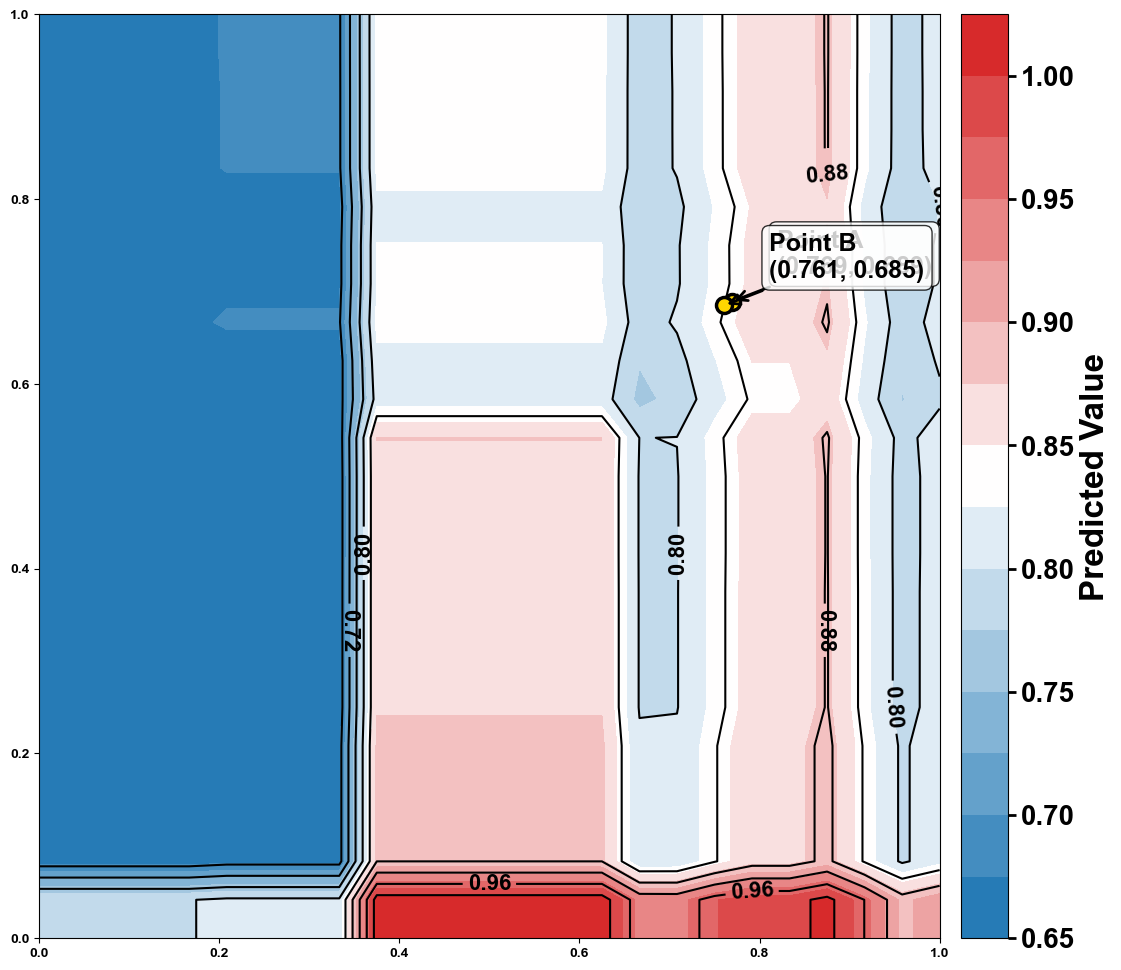

In [9]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

# 参数配置
model_path = "xgboost_model_ncv/xgboost_model.pkl"  # 模型路径
input_path = "归一化数据.xlsx"  # 输入数据路径
output_dir = "pdp_analysis"  # 输出目录
feature1 = "EN."  # 第一个特征
feature2 = "I.R."  # 第二个特征
random_state = 42  # 随机种子

# 关键点坐标
key_points = [
    (0.769, 0.689, "Point A"),  # 第一个关键点 (EN, I.R.) = (0.769, 0.689)
    (0.761, 0.685, "Point B")   # 第二个关键点 (EN, I.R.) = (0.761, 0.685)
]

# 创建输出目录
os.makedirs(output_dir, exist_ok=True)

def prepare_data(input_path):
    """数据加载与预处理"""
    df = pd.read_excel(input_path)
    return df

def load_model(model_path):
    """加载训练好的XGBoost模型"""
    return joblib.load(model_path)

def calculate_pdp_2d(model, df, feature1, feature2, num_points=20):
    """计算两个特征的2D部分依赖"""
    # 确保特征存在
    if feature1 not in df.columns or feature2 not in df.columns:
        raise ValueError(f"特征 {feature1} 或 {feature2} 不存在于数据中")
    
    # 保存原始特征值
    original_features = df[[feature1, feature2]].copy()
    
    # 生成特征网格
    feature1_values = np.linspace(df[feature1].min(), df[feature1].max(), num_points)
    feature2_values = np.linspace(df[feature2].min(), df[feature2].max(), num_points)
    feature1_mesh, feature2_mesh = np.meshgrid(feature1_values, feature2_values)
    
    # 初始化预测结果数组
    pdp_values = np.zeros((num_points, num_points))
    
    # 对每个特征组合计算预测值
    for i, f1_val in enumerate(feature1_values):
        for j, f2_val in enumerate(feature2_values):
            # 创建临时数据副本
            temp_df = df.copy()
            temp_df[feature1] = f1_val
            temp_df[feature2] = f2_val
            
            # 准备特征矩阵
            X = temp_df.drop(columns=[col for col in temp_df.columns 
                                     if col not in model.feature_names])
            
            # 进行预测
            dmatrix = xgb.DMatrix(X)
            predictions = model.predict(dmatrix)
            
            # 计算平均预测值作为PDP值
            pdp_values[j, i] = np.mean(predictions)
    
    return feature1_mesh, feature2_mesh, pdp_values

def plot_pdp_2d(feature1, feature2, feature1_mesh, feature2_mesh, pdp_values, output_dir):
    """绘制2D部分依赖图"""
    # 设置全局字体样式
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.weight'] = 'bold'
    
    # 创建自定义颜色映射
    custom_cmap = LinearSegmentedColormap.from_list(
        'blue_to_red', ['#1f77b4', '#ffffff', '#d62728'], N=256)
    
    # 创建图形
    fig, ax = plt.subplots(figsize=(14, 12), facecolor='white')
    
    # 绘制热力图
    im = ax.pcolormesh(
        feature1_mesh, feature2_mesh, pdp_values,
        cmap=custom_cmap, shading='auto',
        vmin=pdp_values.min(), vmax=pdp_values.max()
    )
    
    # 添加颜色条
    cbar = fig.colorbar(im, ax=ax, pad=0.02)
    cbar.set_label('Predicted Value', fontsize=24, fontname='Arial', fontweight='bold')
    cbar.ax.tick_params(labelsize=20, direction='out', length=6, width=2)
    
    # 设置坐标轴标签和标题
    ax.set_xlabel(feature1, fontsize=28, fontname='Arial', fontweight='bold', labelpad=10)
    ax.set_ylabel(feature2, fontsize=28, fontname='Arial', fontweight='bold', labelpad=10)
    ax.set_title(f'2D Partial Dependence Plot for {feature1} and {feature2}',
                fontsize=32, fontname='Arial', fontweight='bold', pad=20)
    
    # 设置坐标轴刻度
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6, integer=False))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6, integer=False))
    
    # 设置刻度标签样式
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontname('Arial')
        tick.set_fontsize(20)
        tick.set_weight('bold')
    
    # 设置边框样式
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)
        spine.set_color('black')
    
    # 添加网格线
    ax.grid(True, linestyle='--', alpha=0.7, linewidth=1.5)
    
    # 调整布局
    plt.tight_layout()
    
    # 保存图形
    plot_path = os.path.join(output_dir, f"pdp_2d_{feature1}_{feature2}.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    return plot_path

def plot_contour_pdp_2d(feature1, feature2, feature1_mesh, feature2_mesh, pdp_values, output_dir):
    """绘制2D部分依赖的等高线图（优化标签堆叠，并标记关键点）"""
    # 设置全局字体样式
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.weight'] = 'bold'
    
    # 创建自定义颜色映射
    custom_cmap = LinearSegmentedColormap.from_list(
        'blue_to_red', ['#1f77b4', '#ffffff', '#d62728'], N=256)
    
    # 创建图形
    fig, ax = plt.subplots(figsize=(14, 12), facecolor='white')
    
    # 绘制等高线图
    contour = ax.contourf(
        feature1_mesh, feature2_mesh, pdp_values,
        cmap=custom_cmap, levels=15,
        vmin=pdp_values.min(), vmax=pdp_values.max()
    )
    
    # 添加颜色条
    cbar = fig.colorbar(contour, ax=ax, pad=0.02)
    cbar.set_label('Predicted Value', fontsize=24, fontname='Arial', fontweight='bold')
    cbar.ax.tick_params(labelsize=20, direction='out', length=6, width=2)
    
    # 添加等高线（仅绘制关键等高线，减少密集标注）
    contour_lines = ax.contour(
        feature1_mesh, feature2_mesh, pdp_values,
        colors='black', linewidths=1.5, levels=8  # 减少 levels 数量，控制标注密度
    )
    
    # 优化：仅在稀疏区域标注，避免堆叠
    ax.clabel(contour_lines, inline=True, fontsize=16, levels=contour_lines.levels[::2])
    
    # ------------------------ 新增：标记关键点 ------------------------
    for x, y, label in key_points:
        # 绘制关键点
        ax.plot(x, y, 'o', color='black', markersize=12, markeredgewidth=2)
        ax.plot(x, y, 'o', color='#FFD700', markersize=8)  # 黄色填充
        
        # 添加标签和连接线
        ax.annotate(
            f'{label}\n({x:.3f}, {y:.3f})',
            xy=(x, y),
            xytext=(x+0.05, y+0.03),  # 标签位置（微调以避免重叠）
            arrowprops=dict(
                arrowstyle='->',
                color='black',
                linewidth=2
            ),
            fontsize=18,
            fontweight='bold',
            bbox=dict(
                boxstyle='round,pad=0.3',
                fc='white',
                ec='black',
                alpha=0.8
            )
        )
    
    # 高亮显示关键点所在的等高线
    for x, y, _ in key_points:
        # 找到最接近的等高线值
        levels = contour_lines.levels
        idx = np.abs(levels - pdp_values[int(y*(len(feature2_values)-1)), int(x*(len(feature1_values)-1))]).argmin()
        closest_level = levels[idx]
        
        # 重新绘制该等高线，使其更明显
        ax.contour(
            feature1_mesh, feature2_mesh, pdp_values,
            colors='#FF4500',  # 橙红色
            linewidths=3,
            levels=[closest_level]
        )
    # ------------------------ 关键点标记结束 ------------------------
    
    # 设置坐标轴标签和标题
    ax.set_xlabel(feature1, fontsize=28, fontname='Arial', fontweight='bold', labelpad=10)
    ax.set_ylabel(feature2, fontsize=28, fontname='Arial', fontweight='bold', labelpad=10)
    ax.set_title(f'Contour Plot of 2D Partial Dependence for {feature1} and {feature2}\n(Marked Key Points)',
                fontsize=32, fontname='Arial', fontweight='bold', pad=20)
    
    # 设置坐标轴刻度
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6, integer=False))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6, integer=False))
    
    # 设置刻度标签样式
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontname('Arial')
        tick.set_fontsize(20)
        tick.set_weight('bold')
    
    # 设置边框样式
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)
        spine.set_color('black')
    
    # 添加网格线
    ax.grid(True, linestyle='--', alpha=0.7, linewidth=1.5)
    
    # 调整布局
    plt.tight_layout()
    
    # 保存图形
    plot_path = os.path.join(output_dir, f"contour_pdp_2d_{feature1}_{feature2}_with_points.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    return plot_path

def main():
    print(f"开始{feature1}和{feature2}的2D部分依赖分析...")
    
    # 1. 加载数据和模型
    print("加载数据和模型...")
    df = prepare_data(input_path)
    model = load_model(model_path)
    
    # 2. 计算2D部分依赖
    print("计算2D部分依赖...")
    feature1_mesh, feature2_mesh, pdp_values = calculate_pdp_2d(
        model, df, feature1, feature2, num_points=25)
    
    # 3. 绘制2D PDP热力图
    print("绘制2D PDP热力图...")
    heatmap_path = plot_pdp_2d(
        feature1, feature2, feature1_mesh, feature2_mesh, pdp_values, output_dir)
    print(f"2D PDP热力图已保存至：{heatmap_path}")
    
    # 4. 绘制2D PDP等高线图（优化标签堆叠并标记关键点）
    print("绘制2D PDP等高线图（标记关键点）...")
    contour_path = plot_contour_pdp_2d(
        feature1, feature2, feature1_mesh, feature2_mesh, pdp_values, output_dir)
    print(f"2D PDP等高线图已保存至：{contour_path}")
    
    # 5. 保存PDP数据
    print("保存PDP分析数据...")
    pdp_data = {
        'feature1_values': feature1_mesh.flatten(),
        'feature2_values': feature2_mesh.flatten(),
        'pdp_values': pdp_values.flatten()
    }
    pdp_df = pd.DataFrame(pdp_data)
    pdp_df.to_csv(os.path.join(output_dir, f"pdp_2d_{feature1}_{feature2}.csv"), index=False)
    print(f"PDP数据已保存至：{os.path.join(output_dir, f'pdp_2d_{feature1}_{feature2}.csv')}")
    
    # 6. 输出关键点预测值
    print("\n关键点预测值：")
    for x, y, label in key_points:
        # 找到最接近的网格点
        i = int(np.round(x * (len(feature1_mesh[0]) - 1)))
        j = int(np.round(y * (len(feature2_mesh) - 1)))
        # 防止越界
        i = max(0, min(i, len(feature1_mesh[0]) - 1))
        j = max(0, min(j, len(feature2_mesh) - 1))
        pred_value = pdp_values[j, i]
        print(f"{label}: ({x:.3f}, {y:.3f}) → 预测值 = {pred_value:.4f}")
    
    print(f"\n{feature1}和{feature2}的2D部分依赖分析完成！所有结果保存在目录：{output_dir}")

if __name__ == "__main__":
    main()